In [78]:
import pandas as pd
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
# Set seed for reproducability
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [80]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
sampleSub=pd.read_csv('SampleSubmission.csv')

In [81]:
testID = test.ID_LAT_LON_YEAR_WEEK

In [82]:
print(f'train cols: {len(train.columns)}')
print(f'test cols: {len(test.columns)}')

train cols: 76
test cols: 75


In [83]:
train.head(1)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-23.73_28.77_2019_1,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,24.93944,...,5566.222019,54826.032616,4606.209995,19.115282,0.353778,24.951948,49.053953,-89.638032,17.988874,86.0517


In [84]:
test.head(1)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-23.53_27.47_2019_1,-23.53,27.47,2019,1,0.000077,0.454468,0.000034,0.114291,-80.286309,...,74897.052,2180.266538,81287.074479,1562.031017,10.734123,0.28066,-31.230174,33.337966,-93.217261,23.358251


In [85]:
# Train statistical summary
train.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,74005,74005.000000,74005.000000,74005.000000,74005.000000,72075.000000,72075.000000,72075.000000,72075.000000,72075.000000,...,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,71281.000000,7.400500e+04
unique,74005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.73_28.77_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.829723,27.782742,2020.478049,26.156098,0.000263,0.515875,0.000091,0.105690,4.487627,...,3652.349722,74390.624457,2871.262815,15.825386,0.225441,-14.277119,49.567836,-50.513220,40.558959,7.891061e+03
std,NaN,2.760589,2.746672,1.111261,14.843840,0.000599,0.196766,0.000199,0.069555,52.246537,...,1807.385280,12859.067332,1645.827671,19.696645,0.063131,47.277321,12.097417,20.623907,12.201179,5.257160e+04
min,NaN,-33.930000,21.070000,2019.000000,1.000000,-0.000989,0.133738,-0.000828,0.000000,-110.027657,...,128.299794,14541.977986,10.300364,1.151138,0.000000,-125.298058,0.100882,-97.570906,10.906227,4.806346e-02
25%,NaN,-29.630000,26.670000,2019.000000,13.000000,-0.000066,0.371745,-0.000034,0.052482,-18.178128,...,2260.917450,65920.340500,1602.615232,5.071849,0.183490,-31.952090,41.329129,-67.987723,29.786592,1.545472e+02
50%,NaN,-28.130000,28.770000,2020.000000,26.000000,0.000147,0.488695,0.000073,0.099513,-10.987544,...,3437.878915,75994.802018,2563.926290,8.609041,0.223503,-13.738030,53.233031,-45.413921,40.117572,7.231359e+02
75%,NaN,-25.730000,29.470000,2021.000000,39.000000,0.000441,0.623530,0.000191,0.152480,59.119988,...,4745.607936,84409.691135,3819.671389,17.478625,0.267716,3.790391,59.478133,-33.124961,51.445698,2.773029e+03


In [86]:
# Test statistical summary
test.describe(include = 'all')

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
count,28085,28085.000000,28085.000000,28085.000000,28085.000000,27168.000000,27168.000000,27168.000000,27168.000000,27168.000000,...,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000,26952.000000
unique,28085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_-23.53_27.47_2019_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-27.659927,27.679489,2020.478049,26.156098,0.000408,0.479412,0.000147,0.109034,3.593182,...,67146.897767,3732.987021,73290.409306,2975.243395,14.553957,0.222251,-16.226959,49.973287,-51.061556,40.363462
std,NaN,3.147071,3.953095,1.111273,14.844004,0.000694,0.185203,0.000235,0.070031,50.977486,...,13114.552110,1791.381622,12523.723569,1609.802656,17.396373,0.055726,46.873647,12.076966,20.378958,12.425623
min,NaN,-34.030000,18.370000,2019.000000,1.000000,-0.000997,0.136354,-0.000827,0.000000,-106.342976,...,13468.169925,41.779261,15849.837802,0.301802,1.000000,0.000000,-118.005679,0.113536,-97.145958,11.084878
25%,NaN,-28.130000,27.670000,2019.000000,13.000000,0.000004,0.334740,0.000002,0.054825,-18.052725,...,58141.778481,2366.468502,65100.436334,1805.892248,5.044690,0.182856,-32.190337,42.230868,-68.564190,29.771236
50%,NaN,-27.730000,29.770000,2020.000000,26.000000,0.000256,0.456401,0.000117,0.103155,-11.306408,...,67662.244391,3533.683514,74883.044228,2673.371149,8.624943,0.214512,-13.677169,53.700167,-45.805551,39.853395
75%,NaN,-24.030000,30.070000,2021.000000,39.000000,0.000632,0.579827,0.000253,0.158492,56.920923,...,76997.720804,4835.174050,82189.400173,3907.250928,16.190492,0.259952,-0.642704,59.503624,-33.299592,51.452037


In [87]:
# drop non numeric cols
num = []
non = []
for col in train.select_dtypes(include=['int64', 'float64']):
    num.append(col)

for col in train:
    if col not in num:
        non.append(col)
        
non

train.drop(non,inplace=True,axis=1)
test.drop(non,inplace=True,axis=1)

In [88]:
# identify target
target_cols = []
for i in train.columns.values:
    if i not in test.columns.values:
        target_cols.append(i)
        
target = train[target_cols]
train[target_cols].head()

,emission
0,86.051700
1,88.875670
2,91.723114
3,92.883870
4,94.878330


In [89]:
# get the correlation of each feature with respect to the target (emmission)
train_corr = train.corr()['emission'].abs().sort_values(ascending=False)
train_corr

emission                                                  1.000000
NitrogenDioxide_NO2_column_number_density                 0.288403
NitrogenDioxide_tropospheric_NO2_column_number_density    0.284160
NitrogenDioxide_NO2_slant_column_number_density           0.244449
SulphurDioxide_SO2_column_number_density_15km             0.072520
                                                            ...   
Cloud_cloud_fraction                                      0.003715
Cloud_sensor_azimuth_angle                                0.003708
week_no                                                   0.003154
Ozone_O3_effective_temperature                            0.001594
year                                                      0.000353
Name: emission, Length: 75, dtype: float64

In [90]:
# get all the features that has at least 0.6 in correlation to the 
# target

features = train_corr[train_corr > 0].index.to_list()[1:]

print(len(features))# without the target column
# features

74


In [91]:
[col for col in train.columns if not train[col].isnull().any()]

['latitude', 'longitude', 'year', 'week_no', 'emission']

### target variable distribution

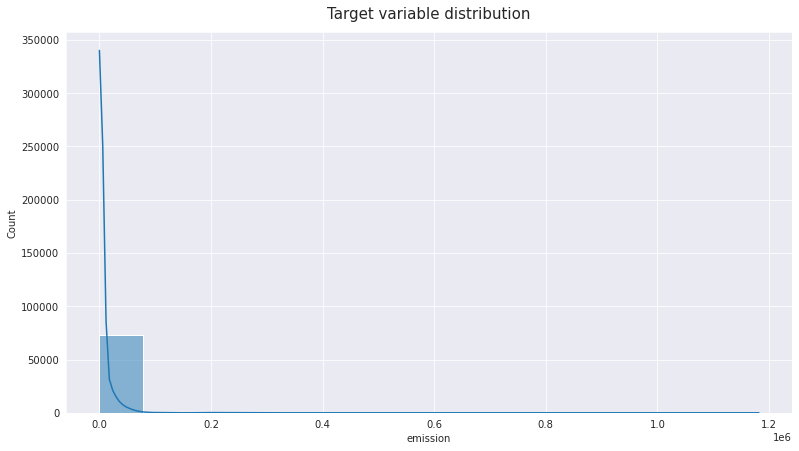

None

17.038027449698163

In [92]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

In [93]:
train.emission = np.log(train.emission)
train.emission.skew()

-0.4685478820791871

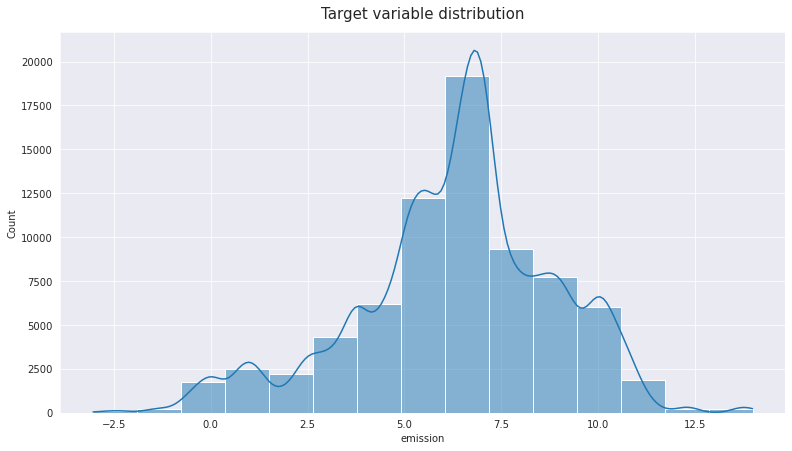

None

-0.4685478820791871

In [94]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.emission.skew())

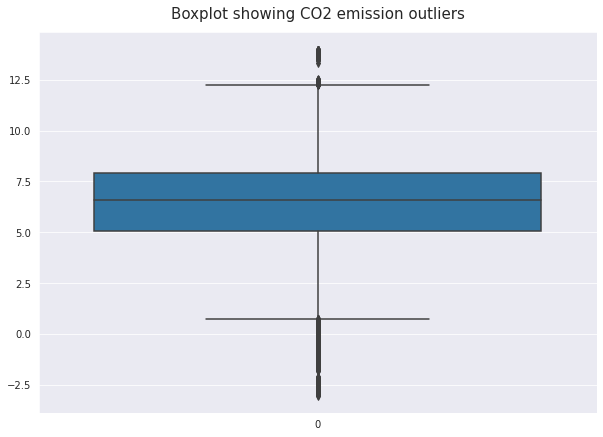

In [95]:
# Plotting boxplot for the CO2 emissions
sns.set_style('darkgrid')
plt.figure(figsize = (10, 7))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)  
plt.show()

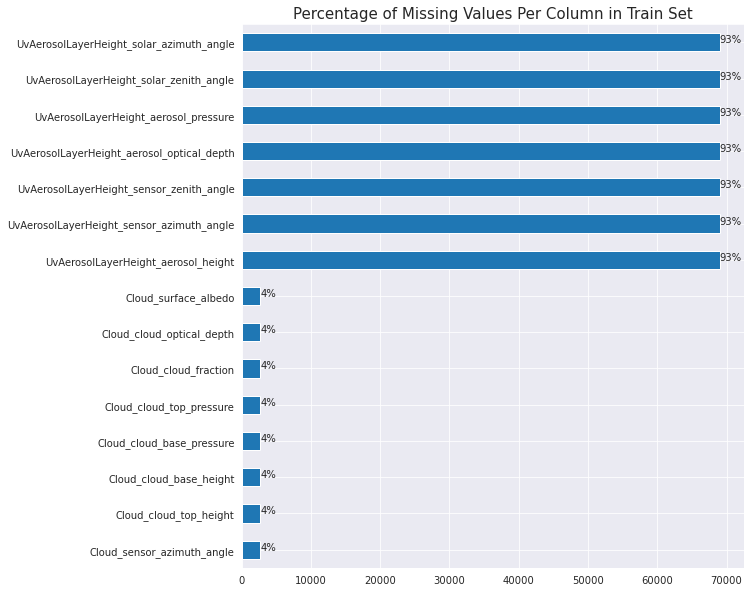

In [96]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [97]:
null_df = train.isna().sum().sort_values(ascending=False)
null_features = null_df[null_df > 30000].index.to_list()

print(len(null_features))
print(null_features)

7
['UvAerosolLayerHeight_solar_azimuth_angle', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_aerosol_height']


In [98]:
# drop colls with large # of null values
train.drop(null_features,inplace=True,axis=1)
test.drop(null_features,inplace=True,axis=1)

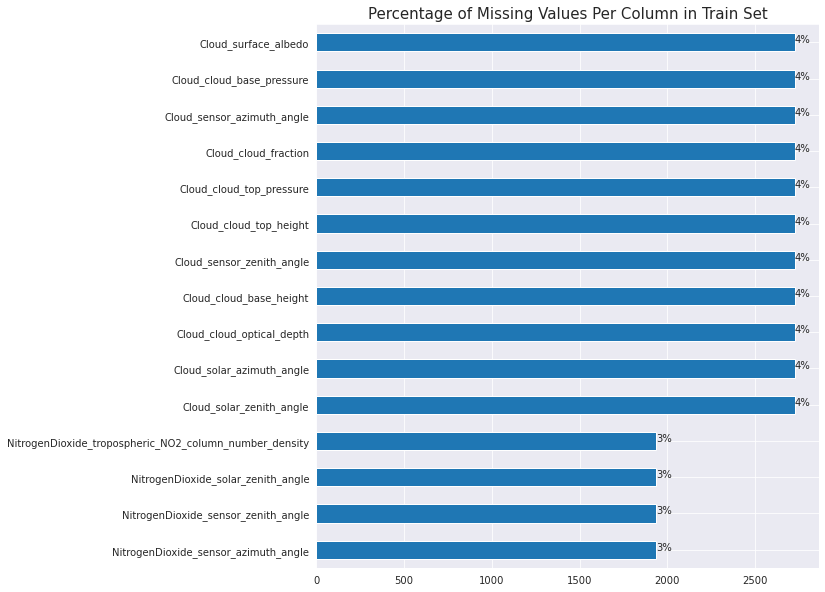

In [99]:
# Plot missing values in train set
ax = train.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [100]:
# Drop target from test column
p=[]
l=list(test.columns)
l.append('target')
for c in list(train.columns):
  if c not in l:
    p.append(c)
    train.drop(c,inplace=True,axis=1)

In [101]:
train.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

In [102]:
test=test.drop(columns=[
    'SulphurDioxide_sensor_azimuth_angle',
    'SulphurDioxide_sensor_zenith_angle',
    'SulphurDioxide_solar_azimuth_angle',
    'SulphurDioxide_solar_zenith_angle'
])
train=train.drop(columns=[
    'SulphurDioxide_sensor_azimuth_angle',
    'SulphurDioxide_sensor_zenith_angle',
    'SulphurDioxide_solar_azimuth_angle',
    'SulphurDioxide_solar_zenith_angle'
 ])


test=test.drop(columns=[
    'CarbonMonoxide_sensor_azimuth_angle',
    'CarbonMonoxide_sensor_zenith_angle',
    'CarbonMonoxide_solar_azimuth_angle',
    'CarbonMonoxide_solar_zenith_angle'
])
train=train.drop(columns=[
    'CarbonMonoxide_sensor_azimuth_angle',
    'CarbonMonoxide_sensor_zenith_angle',
    'CarbonMonoxide_solar_azimuth_angle',
    'CarbonMonoxide_solar_zenith_angle'
 ])

test=test.drop(columns=[
    'NitrogenDioxide_sensor_azimuth_angle',
    'NitrogenDioxide_sensor_zenith_angle',
    'NitrogenDioxide_solar_azimuth_angle',
    'NitrogenDioxide_solar_zenith_angle',
])
train=train.drop(columns=[
    'NitrogenDioxide_sensor_azimuth_angle',
    'NitrogenDioxide_sensor_zenith_angle',
    'NitrogenDioxide_solar_azimuth_angle',
    'NitrogenDioxide_solar_zenith_angle',
 ])

test=test.drop(columns=[
'Formaldehyde_solar_zenith_angle',
       'Formaldehyde_solar_azimuth_angle', 'Formaldehyde_sensor_zenith_angle',
       'Formaldehyde_sensor_azimuth_angle'
])
train=train.drop(columns=[
'Formaldehyde_solar_zenith_angle',
       'Formaldehyde_solar_azimuth_angle', 'Formaldehyde_sensor_zenith_angle',
       'Formaldehyde_sensor_azimuth_angle'
 ])

test=test.drop(columns=[
'UvAerosolIndex_sensor_azimuth_angle',
       'UvAerosolIndex_sensor_zenith_angle',
       'UvAerosolIndex_solar_azimuth_angle',
       'UvAerosolIndex_solar_zenith_angle'
])
train=train.drop(columns=[
'UvAerosolIndex_sensor_azimuth_angle',
       'UvAerosolIndex_sensor_zenith_angle',
       'UvAerosolIndex_solar_azimuth_angle',
       'UvAerosolIndex_solar_zenith_angle'
 ])

test=test.drop(columns=[
'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle'
])
train=train.drop(columns=[
'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle'
 ])


test=test.drop(columns=[
'Cloud_sensor_azimuth_angle',
       'Cloud_sensor_zenith_angle', 'Cloud_solar_azimuth_angle',
       'Cloud_solar_zenith_angle'
])
train=train.drop(columns=[
'Cloud_sensor_azimuth_angle',
       'Cloud_sensor_zenith_angle', 'Cloud_solar_azimuth_angle',
       'Cloud_solar_zenith_angle'
 ])

In [103]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [104]:
result_train=missing_zero_values_table(train)

Your selected dataframe has 39 columns and 74005 Rows.
There are 35 columns that have missing values.


In [105]:
# drop non numeric cols
num = []
non = []
for col in train.select_dtypes(include=['int64', 'float64']):
    num.append(col)

for col in train:
    if col not in num:
        non.append(col)
        
non

train.drop(non,inplace=True,axis=1)
test.drop(non,inplace=True,axis=1)

In [106]:
for i in train.columns.values:
    train[i].fillna((train[i].mean()), inplace=True)
    
for i in test.columns.values:
    test[i].fillna((test[i].mean()), inplace=True)

In [107]:
result_train=missing_zero_values_table(train)

Your selected dataframe has 39 columns and 74005 Rows.
There are 0 columns that have missing values.


## Simple PCA

In [108]:
from sklearn.preprocessing import StandardScaler

# performing standardization
sc = StandardScaler()
train_scaled = sc.fit_transform(train)

# apply PCA to the features using the PCA class in the sklearn.decomposition module

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)

# perform PCA on the scaled data
pca.fit(train_scaled)

PCA()

In [109]:
# print the explained variances

'''
So how do you interpret the output? You can interpret it as follows:

The first component alone captures about 44% variability in the data
The second one captures about 19% variability in the data and so on.
The 30 components altogether capture 100% variability in the data.

'''

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# A much easier way to understand the above result is to print the cumulative variances
'''
You can now interpret the cumulative variances as follows:

The first component alone captures about 44% variability in the data
The first two components capture about 63% variability in the data and so on.
The first 8 components together capture about 92.6% variability in the data.
'''

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Variances (Percentage):
[1.65054602e+01 1.20048502e+01 1.04105252e+01 7.72364862e+00
 6.74299609e+00 6.37248640e+00 5.34869698e+00 4.66535303e+00
 4.59889298e+00 3.75360108e+00 2.78206690e+00 2.05136513e+00
 1.94669059e+00 1.77455553e+00 1.62322802e+00 1.42704133e+00
 1.36166111e+00 1.22215512e+00 1.13223595e+00 1.01073916e+00
 9.28153861e-01 8.59537754e-01 7.19005629e-01 5.77613555e-01
 5.28091987e-01 4.36460063e-01 4.14523494e-01 2.94476717e-01
 2.28332748e-01 1.32473946e-01 1.17763395e-01 9.41189673e-02
 8.52220327e-02 7.29468602e-02 2.92287910e-02 1.73917362e-02
 2.77216993e-03 2.52647311e-03 1.11019918e-03]

Cumulative Variances (Percentage):
[ 16.50546023  28.51031044  38.9208356   46.64448422  53.38748031
  59.75996671  65.10866369  69.77401672  74.37290969  78.12651077
  80.90857768  82.9599428   84.90663339  86.68118893  88.30441695
  89.73145828  91.09311939  92.31527451  93.44751046  94.45824962
  95.38640348  96.24594124  96.96494687  97.54256042  98.07065241
  98.50711247 

In [110]:
from matplotlib import pyplot as plt
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

Cumulative Variances (Percentage):
[16.50546023 28.51031044 38.9208356  46.64448422 53.38748031 59.75996671
 65.10866369 69.77401672 74.37290969 78.12651077 80.90857768 82.9599428
 84.90663339 86.68118893 88.30441695 89.73145828 91.09311939 92.31527451
 93.44751046 94.45824962 95.38640348]
Number of components: 21


Text(0, 0.5, 'Explained variance (%)')

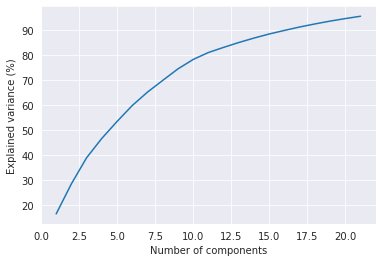

In [111]:
pca = PCA(n_components = 0.95)
pca.fit(train_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [112]:
# You can also find out the importance of each feature that contributes 
# to each of the components using the components_ attribute of the pca object
# The importance of each feature is reflected by the magnitude of the corresponding
# values in the output — the higher magnitude, the higher the importance

pca_components = abs(pca.components_)
print(pca_components)

[[1.44401919e-01 2.63052644e-03 2.01488617e-02 1.90810145e-02
  1.79548832e-01 2.70777930e-01 1.43736866e-01 4.10435816e-02
  1.12876143e-01 1.98793268e-02 2.43555719e-01 2.44694266e-01
  1.41001835e-01 7.52409848e-02 9.84190547e-02 1.94343790e-01
  1.39554405e-01 1.49034418e-01 1.22549437e-01 1.51720107e-01
  1.35180059e-01 1.06935106e-02 1.64928822e-01 2.47274140e-02
  5.49107650e-02 1.03844286e-01 1.41996713e-01 2.56021717e-03
  2.85410583e-01 2.77106807e-01 1.20539854e-01 2.10484408e-01
  1.80967687e-01 2.22078096e-01 2.14440836e-01 2.19058619e-01
  2.11251888e-01 1.50547263e-01 1.57583601e-01]
 [3.79196592e-01 1.56089673e-02 3.50974823e-02 2.44778683e-03
  1.46363381e-01 3.41874000e-02 1.55995692e-01 2.13467847e-02
  1.52303963e-01 6.53629144e-02 1.40306749e-01 1.44136815e-03
  3.60374882e-01 2.37096767e-01 2.51044290e-01 1.44494485e-01
  2.14773243e-01 1.57698332e-01 4.13211347e-02 3.91207885e-02
  3.74459175e-01 6.92375545e-02 7.02985772e-02 5.45154172e-02
  2.62242298e-02 6.827

In [113]:
# For curiosity, let’s print out the top 4 features that contributes the most to each of the 6 components
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {train.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['Ozone_O3_column_number_density_amf', 'Ozone_O3_slant_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'CarbonMonoxide_cloud_height']
Component 1: ['UvAerosolIndex_sensor_altitude', 'latitude', 'NitrogenDioxide_sensor_altitude', 'CarbonMonoxide_sensor_altitude']
Component 2: ['Cloud_cloud_top_height', 'Cloud_cloud_top_pressure', 'Cloud_cloud_base_height', 'Cloud_cloud_base_pressure']
Component 3: ['NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'Formaldehyde_cloud_fraction']
Component 4: ['CarbonMonoxide_CO_column_number_density', 'Ozone_O3_column_number_density', 'week_no', 'NitrogenDioxide_stratospheric_NO2_column_number_density']
Component 5: ['Formaldehyde_cloud_fraction', 'SulphurDioxide_cloud_fraction', 'NitrogenDioxide_absorbing_aerosol_index', 'Formaldehyde_tropospheric_HCHO_column_number_d

In [114]:
X_pca = pca.transform(train_scaled)
print(X_pca.shape)
print(X_pca)

(74005, 21)
[[-4.61261026  1.90532798 -0.53589689 ... -0.24080042  0.1544835
   0.95900896]
 [-3.78738114  1.67087492 -2.03343595 ...  0.02827193  1.44423708
   0.55560164]
 [-3.05859578  1.55008477 -3.70405666 ...  0.1970767   0.7567586
   1.21411349]
 ...
 [ 3.74710161 -4.30592004  1.00304453 ...  0.30574119  0.71780739
  -0.75766419]
 [ 3.80754197 -4.12059781  1.44779191 ...  0.8423092  -0.19639139
  -1.64739817]
 [ 3.52208131 -3.33247191  2.86155236 ...  0.94403855  0.38343716
  -1.03436236]]


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## simple catboost

In [116]:
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = cb.CatBoostRegressor(loss_function='RMSE')
cb_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])
random_state = 12
# perform a split
X_train, X_test, y_train, y_test = train_test_split(train, target,
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)

# train the model using the PCA components
cb_regress_model.fit(X_train,y_train)

Learning rate set to 0.076392
0:	learn: 51855.6877608	total: 8.55ms	remaining: 8.54s
1:	learn: 51602.7750356	total: 20.8ms	remaining: 10.4s
2:	learn: 51417.6365873	total: 28.3ms	remaining: 9.39s
3:	learn: 51253.5272769	total: 40.8ms	remaining: 10.2s
4:	learn: 51026.7138484	total: 54ms	remaining: 10.7s
5:	learn: 50837.2308964	total: 64.1ms	remaining: 10.6s
6:	learn: 50669.1376407	total: 75ms	remaining: 10.6s
7:	learn: 50540.3952600	total: 86.3ms	remaining: 10.7s
8:	learn: 50385.6082318	total: 98.9ms	remaining: 10.9s
9:	learn: 50244.9584525	total: 110ms	remaining: 10.9s
10:	learn: 50092.0943788	total: 122ms	remaining: 11s
11:	learn: 49946.2809506	total: 136ms	remaining: 11.2s
12:	learn: 49823.0800311	total: 145ms	remaining: 11s
13:	learn: 49711.0754386	total: 156ms	remaining: 11s
14:	learn: 49607.1603233	total: 169ms	remaining: 11.1s
15:	learn: 49507.2535092	total: 179ms	remaining: 11s
16:	learn: 49399.2209511	total: 194ms	remaining: 11.2s
17:	learn: 49314.0841620	total: 204ms	remaining:

162:	learn: 43389.0666881	total: 1.41s	remaining: 7.26s
163:	learn: 43357.8396061	total: 1.42s	remaining: 7.26s
164:	learn: 43316.0966198	total: 1.43s	remaining: 7.26s
165:	learn: 43286.2366835	total: 1.44s	remaining: 7.25s
166:	learn: 43262.2705267	total: 1.45s	remaining: 7.23s
167:	learn: 43222.4440367	total: 1.46s	remaining: 7.21s
168:	learn: 43187.1561809	total: 1.46s	remaining: 7.2s
169:	learn: 43175.2047294	total: 1.47s	remaining: 7.18s
170:	learn: 43142.2437678	total: 1.48s	remaining: 7.17s
171:	learn: 43092.6447952	total: 1.49s	remaining: 7.16s
172:	learn: 43073.7155332	total: 1.49s	remaining: 7.14s
173:	learn: 43045.8798299	total: 1.5s	remaining: 7.13s
174:	learn: 43011.2392605	total: 1.51s	remaining: 7.11s
175:	learn: 42983.2960501	total: 1.52s	remaining: 7.1s
176:	learn: 42929.9111082	total: 1.52s	remaining: 7.08s
177:	learn: 42907.8370042	total: 1.53s	remaining: 7.07s
178:	learn: 42892.0397968	total: 1.54s	remaining: 7.05s
179:	learn: 42875.4862138	total: 1.54s	remaining: 7

329:	learn: 39419.3714559	total: 2.85s	remaining: 5.79s
330:	learn: 39349.4712389	total: 2.86s	remaining: 5.78s
331:	learn: 39327.1942126	total: 2.87s	remaining: 5.77s
332:	learn: 39311.4033554	total: 2.88s	remaining: 5.76s
333:	learn: 39296.0521955	total: 2.88s	remaining: 5.75s
334:	learn: 39276.8667226	total: 2.89s	remaining: 5.74s
335:	learn: 39248.9285622	total: 2.9s	remaining: 5.73s
336:	learn: 39212.2900976	total: 2.91s	remaining: 5.72s
337:	learn: 39198.7482774	total: 2.91s	remaining: 5.71s
338:	learn: 39185.8483008	total: 2.92s	remaining: 5.7s
339:	learn: 39164.9846101	total: 2.93s	remaining: 5.69s
340:	learn: 39145.0493287	total: 2.94s	remaining: 5.68s
341:	learn: 39130.6346976	total: 2.94s	remaining: 5.66s
342:	learn: 39104.2537348	total: 2.95s	remaining: 5.65s
343:	learn: 39087.3689447	total: 2.96s	remaining: 5.64s
344:	learn: 39047.7514715	total: 2.97s	remaining: 5.63s
345:	learn: 39022.5771907	total: 2.97s	remaining: 5.62s
346:	learn: 38994.0263317	total: 2.98s	remaining: 

486:	learn: 36564.2857565	total: 4.07s	remaining: 4.28s
487:	learn: 36541.6717585	total: 4.08s	remaining: 4.28s
488:	learn: 36526.3307863	total: 4.08s	remaining: 4.27s
489:	learn: 36519.1115427	total: 4.09s	remaining: 4.26s
490:	learn: 36507.0071622	total: 4.1s	remaining: 4.25s
491:	learn: 36479.8888413	total: 4.11s	remaining: 4.24s
492:	learn: 36467.1154373	total: 4.12s	remaining: 4.23s
493:	learn: 36457.2879032	total: 4.12s	remaining: 4.22s
494:	learn: 36441.7180272	total: 4.13s	remaining: 4.21s
495:	learn: 36429.8413297	total: 4.14s	remaining: 4.2s
496:	learn: 36398.6052909	total: 4.14s	remaining: 4.19s
497:	learn: 36384.3849025	total: 4.15s	remaining: 4.18s
498:	learn: 36350.0983079	total: 4.16s	remaining: 4.17s
499:	learn: 36326.2954517	total: 4.17s	remaining: 4.17s
500:	learn: 36315.4272269	total: 4.17s	remaining: 4.16s
501:	learn: 36287.0783200	total: 4.18s	remaining: 4.15s
502:	learn: 36281.0427984	total: 4.19s	remaining: 4.14s
503:	learn: 36256.1115003	total: 4.2s	remaining: 4

655:	learn: 33934.9586380	total: 5.47s	remaining: 2.87s
656:	learn: 33924.4134978	total: 5.48s	remaining: 2.86s
657:	learn: 33905.1541291	total: 5.49s	remaining: 2.85s
658:	learn: 33893.0756868	total: 5.5s	remaining: 2.84s
659:	learn: 33887.7086641	total: 5.5s	remaining: 2.83s
660:	learn: 33854.9804969	total: 5.51s	remaining: 2.83s
661:	learn: 33833.9245635	total: 5.52s	remaining: 2.82s
662:	learn: 33821.5624072	total: 5.52s	remaining: 2.81s
663:	learn: 33800.9271157	total: 5.53s	remaining: 2.8s
664:	learn: 33795.5350656	total: 5.54s	remaining: 2.79s
665:	learn: 33789.0061967	total: 5.55s	remaining: 2.78s
666:	learn: 33783.5408611	total: 5.55s	remaining: 2.77s
667:	learn: 33757.9488045	total: 5.56s	remaining: 2.76s
668:	learn: 33748.4315978	total: 5.57s	remaining: 2.75s
669:	learn: 33727.9384483	total: 5.58s	remaining: 2.75s
670:	learn: 33722.4605255	total: 5.58s	remaining: 2.74s
671:	learn: 33705.2293350	total: 5.59s	remaining: 2.73s
672:	learn: 33693.1708530	total: 5.6s	remaining: 2.

813:	learn: 32083.8475867	total: 6.69s	remaining: 1.53s
814:	learn: 32056.9524552	total: 6.7s	remaining: 1.52s
815:	learn: 32050.2814595	total: 6.71s	remaining: 1.51s
816:	learn: 32040.3367096	total: 6.72s	remaining: 1.5s
817:	learn: 31986.9211208	total: 6.72s	remaining: 1.5s
818:	learn: 31982.0316953	total: 6.73s	remaining: 1.49s
819:	learn: 31960.2226023	total: 6.74s	remaining: 1.48s
820:	learn: 31933.2307130	total: 6.75s	remaining: 1.47s
821:	learn: 31907.7974318	total: 6.76s	remaining: 1.46s
822:	learn: 31883.8246957	total: 6.76s	remaining: 1.45s
823:	learn: 31861.2214041	total: 6.77s	remaining: 1.45s
824:	learn: 31839.9028380	total: 6.78s	remaining: 1.44s
825:	learn: 31819.7901375	total: 6.78s	remaining: 1.43s
826:	learn: 31800.8098292	total: 6.79s	remaining: 1.42s
827:	learn: 31794.0529799	total: 6.8s	remaining: 1.41s
828:	learn: 31787.5401166	total: 6.8s	remaining: 1.4s
829:	learn: 31781.4364024	total: 6.81s	remaining: 1.4s
830:	learn: 31763.0590580	total: 6.82s	remaining: 1.39s

969:	learn: 30383.3764889	total: 7.9s	remaining: 244ms
970:	learn: 30355.7585988	total: 7.91s	remaining: 236ms
971:	learn: 30353.8221628	total: 7.92s	remaining: 228ms
972:	learn: 30320.3140271	total: 7.93s	remaining: 220ms
973:	learn: 30300.3580851	total: 7.93s	remaining: 212ms
974:	learn: 30295.8497455	total: 7.94s	remaining: 204ms
975:	learn: 30290.6621857	total: 7.95s	remaining: 195ms
976:	learn: 30288.7049736	total: 7.96s	remaining: 187ms
977:	learn: 30281.0525307	total: 7.96s	remaining: 179ms
978:	learn: 30271.9677767	total: 7.97s	remaining: 171ms
979:	learn: 30265.5011136	total: 7.98s	remaining: 163ms
980:	learn: 30238.0265060	total: 7.99s	remaining: 155ms
981:	learn: 30229.9811465	total: 7.99s	remaining: 147ms
982:	learn: 30210.6327924	total: 8s	remaining: 138ms
983:	learn: 30208.6469815	total: 8.01s	remaining: 130ms
984:	learn: 30206.8473883	total: 8.02s	remaining: 122ms
985:	learn: 30200.1899005	total: 8.02s	remaining: 114ms
986:	learn: 30198.4739844	total: 8.03s	remaining: 10

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=21)),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x7f6c73381300>)])

In [117]:
pred = cb_regress_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 53103.16
R2: 0.02


## grid catboost

In [118]:
import catboost as cb
from sklearn.model_selection import train_test_split

#---perform a split---
random_state = 12
# X_train, X_test, y_train, y_test = train_test_split(train, target,
#                      test_size = 0.3,
#                      shuffle = True,
#                      random_state=random_state)

train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 51257.3442544	test: 57352.4164581	best: 57352.4164581 (0)	total: 4.84ms	remaining: 479ms
1:	learn: 51084.6082687	test: 57182.2301854	best: 57182.2301854 (1)	total: 10.2ms	remaining: 499ms
2:	learn: 50944.6664929	test: 57018.9782685	best: 57018.9782685 (2)	total: 15.7ms	remaining: 509ms
3:	learn: 50798.6560958	test: 56865.4132682	best: 56865.4132682 (3)	total: 25.7ms	remaining: 618ms
4:	learn: 50685.3754613	test: 56732.5326256	best: 56732.5326256 (4)	total: 35.3ms	remaining: 670ms
5:	learn: 50549.2602228	test: 56590.0478081	best: 56590.0478081 (5)	total: 40.7ms	remaining: 637ms
6:	learn: 50432.7178282	test: 56463.6271007	best: 56463.6271007 (6)	total: 48.6ms	remaining: 645ms
7:	learn: 50313.0381835	test: 56337.3376528	best: 56337.3376528 (7)	total: 54.6ms	remaining: 628ms
8:	learn: 50219.6603304	test: 56235.0609766	best: 56235.0609766 (8)	total: 59.8ms	remaining: 604ms
9:	learn: 50130.6487883	test: 56127.2666677	best: 56127.2666677 (9)	total: 65.5ms	remaining: 590ms
10:	learn:

93:	learn: 46332.2634060	test: 51829.7409278	best: 51829.7409278 (93)	total: 417ms	remaining: 26.6ms
94:	learn: 46280.0502831	test: 51761.5811416	best: 51761.5811416 (94)	total: 423ms	remaining: 22.3ms
95:	learn: 46230.8686362	test: 51696.7142228	best: 51696.7142228 (95)	total: 429ms	remaining: 17.9ms
96:	learn: 46206.9363099	test: 51674.8994446	best: 51674.8994446 (96)	total: 433ms	remaining: 13.4ms
97:	learn: 46189.1711568	test: 51674.1620983	best: 51674.1620983 (97)	total: 437ms	remaining: 8.92ms
98:	learn: 46146.2031021	test: 51620.1484640	best: 51620.1484640 (98)	total: 451ms	remaining: 4.56ms
99:	learn: 46122.6450663	test: 51589.3280235	best: 51589.3280235 (99)	total: 457ms	remaining: 0us

bestTest = 51589.32802
bestIteration = 99

0:	loss: 51589.3280235	best: 51589.3280235 (0)	total: 636ms	remaining: 1m
0:	learn: 50849.7875721	test: 56950.9849237	best: 56950.9849237 (0)	total: 4.98ms	remaining: 493ms
1:	learn: 50435.3469987	test: 56467.1932602	best: 56467.1932602 (1)	total: 9.82

0:	learn: 51257.4385394	test: 57352.5102739	best: 57352.5102739 (0)	total: 6.13ms	remaining: 606ms
1:	learn: 51084.7863015	test: 57182.4071859	best: 57182.4071859 (1)	total: 9.64ms	remaining: 472ms
2:	learn: 50944.8749286	test: 57019.1936202	best: 57019.1936202 (2)	total: 13.1ms	remaining: 425ms
3:	learn: 50798.9239701	test: 56865.6925010	best: 56865.6925010 (3)	total: 16.8ms	remaining: 403ms
4:	learn: 50685.6580908	test: 56732.8313528	best: 56732.8313528 (4)	total: 21.3ms	remaining: 405ms
5:	learn: 50549.5850178	test: 56590.3917709	best: 56590.3917709 (5)	total: 24.9ms	remaining: 390ms
6:	learn: 50433.0656285	test: 56463.9975471	best: 56463.9975471 (6)	total: 28.5ms	remaining: 378ms
7:	learn: 50313.4257431	test: 56337.7510587	best: 56337.7510587 (7)	total: 32.9ms	remaining: 378ms
8:	learn: 50220.0470293	test: 56235.4738863	best: 56235.4738863 (8)	total: 36.3ms	remaining: 367ms
9:	learn: 50131.0432088	test: 56127.6911850	best: 56127.6911850 (9)	total: 39.7ms	remaining: 358ms
10:	learn:

2:	learn: 50090.0697235	test: 56051.5745934	best: 56051.5745934 (2)	total: 11.9ms	remaining: 384ms
3:	learn: 49753.7154433	test: 55694.1119351	best: 55694.1119351 (3)	total: 16.9ms	remaining: 405ms
4:	learn: 49509.2519858	test: 55419.6954312	best: 55419.6954312 (4)	total: 21.7ms	remaining: 412ms
5:	learn: 49248.9962262	test: 55142.6662441	best: 55142.6662441 (5)	total: 26.5ms	remaining: 416ms
6:	learn: 49067.6162494	test: 54922.3642678	best: 54922.3642678 (6)	total: 32.8ms	remaining: 435ms
7:	learn: 48818.9039605	test: 54665.9860797	best: 54665.9860797 (7)	total: 37.9ms	remaining: 435ms
8:	learn: 48662.2471530	test: 54480.9079344	best: 54480.9079344 (8)	total: 42.2ms	remaining: 427ms
9:	learn: 48470.8776949	test: 54261.1624484	best: 54261.1624484 (9)	total: 45.9ms	remaining: 413ms
10:	learn: 48345.3178170	test: 54117.2986629	best: 54117.2986629 (10)	total: 50.9ms	remaining: 412ms
11:	learn: 48166.7275502	test: 53868.5520828	best: 53868.5520828 (11)	total: 55.2ms	remaining: 405ms
12:	le

17:	learn: 49455.5563112	test: 55377.1500682	best: 55377.1500682 (17)	total: 68.9ms	remaining: 314ms
18:	learn: 49362.4412700	test: 55281.1993994	best: 55281.1993994 (18)	total: 75ms	remaining: 320ms
19:	learn: 49299.4665482	test: 55212.0241968	best: 55212.0241968 (19)	total: 83.1ms	remaining: 332ms
20:	learn: 49219.7955518	test: 55129.1299224	best: 55129.1299224 (20)	total: 88.1ms	remaining: 331ms
21:	learn: 49133.9189620	test: 55034.2202948	best: 55034.2202948 (21)	total: 91.6ms	remaining: 325ms
22:	learn: 49077.2102057	test: 54971.2419206	best: 54971.2419206 (22)	total: 95.1ms	remaining: 318ms
23:	learn: 48996.4669039	test: 54888.1020780	best: 54888.1020780 (23)	total: 98.7ms	remaining: 313ms
24:	learn: 48946.5554400	test: 54831.1905369	best: 54831.1905369 (24)	total: 102ms	remaining: 306ms
25:	learn: 48901.1241814	test: 54779.4305606	best: 54779.4305606 (25)	total: 106ms	remaining: 302ms
26:	learn: 48854.4105962	test: 54724.5410095	best: 54724.5410095 (26)	total: 110ms	remaining: 2

18:	learn: 47437.7020231	test: 53141.2838942	best: 53141.2838942 (18)	total: 75.3ms	remaining: 321ms
19:	learn: 47325.4309804	test: 53016.3830192	best: 53016.3830192 (19)	total: 81ms	remaining: 324ms
20:	learn: 47282.2382810	test: 52966.5890681	best: 52966.5890681 (20)	total: 88.2ms	remaining: 332ms
21:	learn: 47183.6671165	test: 52953.5992769	best: 52953.5992769 (21)	total: 92.5ms	remaining: 328ms
22:	learn: 47073.6502089	test: 52827.7135517	best: 52827.7135517 (22)	total: 96.3ms	remaining: 322ms
23:	learn: 46825.2321443	test: 52519.6633088	best: 52519.6633088 (23)	total: 100ms	remaining: 317ms
24:	learn: 46793.2017638	test: 52474.9126903	best: 52474.9126903 (24)	total: 105ms	remaining: 316ms
25:	learn: 46726.2843983	test: 52330.0497857	best: 52330.0497857 (25)	total: 109ms	remaining: 311ms
26:	learn: 46527.5061353	test: 52074.7829341	best: 52074.7829341 (26)	total: 113ms	remaining: 306ms
27:	learn: 46416.2302278	test: 51932.7726114	best: 51932.7726114 (27)	total: 117ms	remaining: 301

15:	learn: 49598.8699877	test: 55551.3872762	best: 55551.3872762 (15)	total: 63.1ms	remaining: 331ms
16:	learn: 49523.7016929	test: 55455.5339483	best: 55455.5339483 (16)	total: 68.6ms	remaining: 335ms
17:	learn: 49458.7979391	test: 55380.7082097	best: 55380.7082097 (17)	total: 76.9ms	remaining: 351ms
18:	learn: 49365.8921601	test: 55284.9771075	best: 55284.9771075 (18)	total: 80.4ms	remaining: 343ms
19:	learn: 49302.8881100	test: 55215.7730126	best: 55215.7730126 (19)	total: 84ms	remaining: 336ms
20:	learn: 49223.3647163	test: 55133.0412111	best: 55133.0412111 (20)	total: 87.5ms	remaining: 329ms
21:	learn: 49137.7971362	test: 55038.4920223	best: 55038.4920223 (21)	total: 91.4ms	remaining: 324ms
22:	learn: 49081.0543329	test: 54975.4798000	best: 54975.4798000 (22)	total: 95.2ms	remaining: 319ms
23:	learn: 49000.5381749	test: 54892.5803018	best: 54892.5803018 (23)	total: 98.8ms	remaining: 313ms
24:	learn: 48950.6271101	test: 54835.6817527	best: 54835.6817527 (24)	total: 103ms	remaining:

14:	learn: 47846.0930061	test: 53485.2549779	best: 53485.2549779 (14)	total: 55.8ms	remaining: 316ms
15:	learn: 47717.5051658	test: 53478.2913009	best: 53478.2913009 (15)	total: 62ms	remaining: 325ms
16:	learn: 47639.1488156	test: 53388.7550545	best: 53388.7550545 (16)	total: 67.1ms	remaining: 328ms
17:	learn: 47571.5904864	test: 53309.8174849	best: 53309.8174849 (17)	total: 72.4ms	remaining: 330ms
18:	learn: 47449.5420849	test: 53150.8785820	best: 53150.8785820 (18)	total: 76.8ms	remaining: 327ms
19:	learn: 47337.0382518	test: 53025.7393676	best: 53025.7393676 (19)	total: 80.8ms	remaining: 323ms
20:	learn: 47293.7777289	test: 52975.8690944	best: 52975.8690944 (20)	total: 84.5ms	remaining: 318ms
21:	learn: 47219.3512414	test: 52958.6126353	best: 52958.6126353 (21)	total: 88ms	remaining: 312ms
22:	learn: 47109.0025868	test: 52832.3231936	best: 52832.3231936 (22)	total: 91.8ms	remaining: 307ms
23:	learn: 46860.4112408	test: 52524.0096861	best: 52524.0096861 (23)	total: 95.7ms	remaining: 

13:	learn: 49771.0787844	test: 55730.2512259	best: 55730.2512259 (13)	total: 56.8ms	remaining: 552ms
14:	learn: 49698.8784319	test: 55653.8094819	best: 55653.8094819 (14)	total: 61.8ms	remaining: 557ms
15:	learn: 49594.3390627	test: 55546.4553370	best: 55546.4553370 (15)	total: 67.6ms	remaining: 566ms
16:	learn: 49519.1443533	test: 55450.5359613	best: 55450.5359613 (16)	total: 71.4ms	remaining: 559ms
17:	learn: 49454.2553562	test: 55375.7222066	best: 55375.7222066 (17)	total: 75.9ms	remaining: 557ms
18:	learn: 49361.0563269	test: 55279.6834097	best: 55279.6834097 (18)	total: 79.7ms	remaining: 549ms
19:	learn: 49298.0934056	test: 55210.5198386	best: 55210.5198386 (19)	total: 83.2ms	remaining: 541ms
20:	learn: 49218.3631980	test: 55127.5603738	best: 55127.5603738 (20)	total: 86.7ms	remaining: 532ms
21:	learn: 49132.3622030	test: 55032.5056052	best: 55032.5056052 (21)	total: 90.1ms	remaining: 524ms
22:	learn: 49075.6671397	test: 54969.5408507	best: 54969.5408507 (22)	total: 94ms	remaining

116:	learn: 45687.3618130	test: 51052.1916837	best: 51052.1916837 (116)	total: 468ms	remaining: 132ms
117:	learn: 45674.7257019	test: 51039.0675520	best: 51039.0675520 (117)	total: 472ms	remaining: 128ms
118:	learn: 45661.9774811	test: 51025.3502825	best: 51025.3502825 (118)	total: 476ms	remaining: 124ms
119:	learn: 45632.7695633	test: 50987.2097806	best: 50987.2097806 (119)	total: 484ms	remaining: 121ms
120:	learn: 45605.2704287	test: 50951.0620697	best: 50951.0620697 (120)	total: 488ms	remaining: 117ms
121:	learn: 45579.3810386	test: 50916.7989252	best: 50916.7989252 (121)	total: 492ms	remaining: 113ms
122:	learn: 45545.4011881	test: 50869.1341151	best: 50869.1341151 (122)	total: 496ms	remaining: 109ms
123:	learn: 45532.0904897	test: 50850.4920791	best: 50850.4920791 (123)	total: 500ms	remaining: 105ms
124:	learn: 45500.0867219	test: 50805.0801685	best: 50805.0801685 (124)	total: 504ms	remaining: 101ms
125:	learn: 45489.7695655	test: 50793.4746685	best: 50793.4746685 (125)	total: 508

68:	learn: 44464.3019733	test: 49652.0315722	best: 49652.0315722 (68)	total: 278ms	remaining: 326ms
69:	learn: 44449.7867871	test: 49637.1790305	best: 49637.1790305 (69)	total: 282ms	remaining: 323ms
70:	learn: 44410.4629490	test: 49577.9825307	best: 49577.9825307 (70)	total: 288ms	remaining: 320ms
71:	learn: 44406.4706455	test: 49573.6842304	best: 49573.6842304 (71)	total: 293ms	remaining: 318ms
72:	learn: 44383.4300369	test: 49576.0164603	best: 49573.6842304 (71)	total: 297ms	remaining: 313ms
73:	learn: 44378.2514015	test: 49576.8967750	best: 49573.6842304 (71)	total: 301ms	remaining: 309ms
74:	learn: 44372.3756490	test: 49561.0611314	best: 49561.0611314 (74)	total: 305ms	remaining: 305ms
75:	learn: 44369.1956990	test: 49558.2328977	best: 49558.2328977 (75)	total: 308ms	remaining: 300ms
76:	learn: 44295.6785831	test: 49481.9813656	best: 49481.9813656 (76)	total: 313ms	remaining: 296ms
77:	learn: 44279.6053461	test: 49461.2944980	best: 49461.2944980 (77)	total: 317ms	remaining: 292ms


18:	learn: 49361.5759887	test: 55280.2522355	best: 55280.2522355 (18)	total: 72.7ms	remaining: 501ms
19:	learn: 49298.6086376	test: 55211.0842975	best: 55211.0842975 (19)	total: 77.5ms	remaining: 504ms
20:	learn: 49218.9006456	test: 55128.1492926	best: 55128.1492926 (20)	total: 84.2ms	remaining: 518ms
21:	learn: 49132.9463565	test: 55033.1490169	best: 55033.1490169 (21)	total: 88.9ms	remaining: 517ms
22:	learn: 49076.2461534	test: 54970.1791496	best: 54970.1791496 (22)	total: 93.8ms	remaining: 518ms
23:	learn: 48995.4458307	test: 54886.9789641	best: 54886.9789641 (23)	total: 97.8ms	remaining: 514ms
24:	learn: 48945.5343230	test: 54830.0642264	best: 54830.0642264 (24)	total: 102ms	remaining: 509ms
25:	learn: 48900.1169831	test: 54778.3184598	best: 54778.3184598 (25)	total: 106ms	remaining: 504ms
26:	learn: 48853.4112166	test: 54723.4367482	best: 54723.4367482 (26)	total: 109ms	remaining: 498ms
27:	learn: 48784.3897090	test: 54651.4112259	best: 54651.4112259 (27)	total: 113ms	remaining: 

118:	learn: 45663.2496986	test: 51004.6129695	best: 51004.6129695 (118)	total: 474ms	remaining: 123ms
119:	learn: 45634.1743217	test: 50966.6392693	best: 50966.6392693 (119)	total: 479ms	remaining: 120ms
120:	learn: 45606.7995675	test: 50930.6494250	best: 50930.6494250 (120)	total: 484ms	remaining: 116ms
121:	learn: 45581.0268901	test: 50896.5357103	best: 50896.5357103 (121)	total: 488ms	remaining: 112ms
122:	learn: 45547.0439541	test: 50848.8672422	best: 50848.8672422 (122)	total: 493ms	remaining: 108ms
123:	learn: 45533.8119602	test: 50830.3223384	best: 50830.3223384 (123)	total: 497ms	remaining: 104ms
124:	learn: 45501.8049967	test: 50784.9069525	best: 50784.9069525 (124)	total: 500ms	remaining: 100ms
125:	learn: 45491.5854844	test: 50773.3665898	best: 50773.3665898 (125)	total: 504ms	remaining: 96ms
126:	learn: 45468.4062990	test: 50742.3433379	best: 50742.3433379 (126)	total: 508ms	remaining: 91.9ms
127:	learn: 45458.4454505	test: 50735.3628781	best: 50735.3628781 (127)	total: 512

66:	learn: 44528.1048285	test: 49557.3177894	best: 49557.3177894 (66)	total: 268ms	remaining: 332ms
67:	learn: 44486.0487149	test: 49554.8202523	best: 49554.8202523 (67)	total: 273ms	remaining: 329ms
68:	learn: 44475.6176665	test: 49552.7587117	best: 49552.7587117 (68)	total: 278ms	remaining: 326ms
69:	learn: 44469.2681824	test: 49558.8606988	best: 49552.7587117 (68)	total: 283ms	remaining: 324ms
70:	learn: 44455.7595229	test: 49545.3946316	best: 49545.3946316 (70)	total: 289ms	remaining: 322ms
71:	learn: 44442.4907498	test: 49522.5849460	best: 49522.5849460 (71)	total: 293ms	remaining: 318ms
72:	learn: 44423.3853641	test: 49504.5764858	best: 49504.5764858 (72)	total: 298ms	remaining: 314ms
73:	learn: 44419.5724543	test: 49503.8450342	best: 49503.8450342 (73)	total: 301ms	remaining: 309ms
74:	learn: 44412.5196015	test: 49486.1797466	best: 49486.1797466 (74)	total: 305ms	remaining: 305ms
75:	learn: 44409.0705211	test: 49482.6790937	best: 49482.6790937 (75)	total: 309ms	remaining: 301ms


12:	learn: 49871.5510303	test: 55836.5803898	best: 55836.5803898 (12)	total: 53.2ms	remaining: 561ms
13:	learn: 49772.2757173	test: 55731.5577073	best: 55731.5577073 (13)	total: 59.7ms	remaining: 580ms
14:	learn: 49700.0696227	test: 55655.1107863	best: 55655.1107863 (14)	total: 65.3ms	remaining: 588ms
15:	learn: 49595.6367999	test: 55547.8678700	best: 55547.8678700 (15)	total: 68.7ms	remaining: 576ms
16:	learn: 49520.4495359	test: 55451.9672617	best: 55451.9672617 (16)	total: 73ms	remaining: 571ms
17:	learn: 49455.5563112	test: 55377.1500682	best: 55377.1500682 (17)	total: 76.5ms	remaining: 561ms
18:	learn: 49362.4412700	test: 55281.1993994	best: 55281.1993994 (18)	total: 81.3ms	remaining: 561ms
19:	learn: 49299.4665482	test: 55212.0241968	best: 55212.0241968 (19)	total: 84.8ms	remaining: 551ms
20:	learn: 49219.7955518	test: 55129.1299224	best: 55129.1299224 (20)	total: 88.3ms	remaining: 542ms
21:	learn: 49133.9189620	test: 55034.2202948	best: 55034.2202948 (21)	total: 92.1ms	remaining

118:	learn: 45653.3806450	test: 50990.7270009	best: 50990.7270009 (118)	total: 474ms	remaining: 123ms
119:	learn: 45625.7355566	test: 50954.4549987	best: 50954.4549987 (119)	total: 479ms	remaining: 120ms
120:	learn: 45599.7074623	test: 50920.0738479	best: 50920.0738479 (120)	total: 484ms	remaining: 116ms
121:	learn: 45575.2026178	test: 50887.4809550	best: 50887.4809550 (121)	total: 489ms	remaining: 112ms
122:	learn: 45541.2906475	test: 50839.8593431	best: 50839.8593431 (122)	total: 492ms	remaining: 108ms
123:	learn: 45528.8455715	test: 50822.2786007	best: 50822.2786007 (123)	total: 496ms	remaining: 104ms
124:	learn: 45496.9004629	test: 50776.9011935	best: 50776.9011935 (124)	total: 500ms	remaining: 100ms
125:	learn: 45486.4478703	test: 50765.1458958	best: 50765.1458958 (125)	total: 504ms	remaining: 95.9ms
126:	learn: 45464.4053181	test: 50735.4970913	best: 50735.4970913 (126)	total: 507ms	remaining: 91.9ms
127:	learn: 45447.7227608	test: 50714.1409385	best: 50714.1409385 (127)	total: 5

67:	learn: 44496.5137182	test: 49554.1031281	best: 49554.1031281 (67)	total: 274ms	remaining: 331ms
68:	learn: 44486.1119440	test: 49552.0473964	best: 49552.0473964 (68)	total: 279ms	remaining: 328ms
69:	learn: 44479.7991240	test: 49558.0864523	best: 49552.0473964 (68)	total: 285ms	remaining: 326ms
70:	learn: 44466.2868927	test: 49544.6113823	best: 49544.6113823 (70)	total: 289ms	remaining: 321ms
71:	learn: 44453.0624425	test: 49521.8618460	best: 49521.8618460 (71)	total: 293ms	remaining: 317ms
72:	learn: 44433.8652042	test: 49503.7622318	best: 49503.7622318 (72)	total: 297ms	remaining: 313ms
73:	learn: 44430.0413413	test: 49503.0114751	best: 49503.0114751 (73)	total: 302ms	remaining: 310ms
74:	learn: 44422.9023163	test: 49485.1899567	best: 49485.1899567 (74)	total: 306ms	remaining: 306ms
75:	learn: 44419.4531946	test: 49481.6877253	best: 49481.6877253 (75)	total: 310ms	remaining: 302ms
76:	learn: 44351.8230329	test: 49410.9840098	best: 49410.9840098 (76)	total: 314ms	remaining: 298ms


15:	learn: 49598.8699877	test: 55551.3872762	best: 55551.3872762 (15)	total: 66.9ms	remaining: 560ms
16:	learn: 49523.7016929	test: 55455.5339483	best: 55455.5339483 (16)	total: 72.2ms	remaining: 565ms
17:	learn: 49458.7979391	test: 55380.7082097	best: 55380.7082097 (17)	total: 76.7ms	remaining: 562ms
18:	learn: 49365.8921601	test: 55284.9771075	best: 55284.9771075 (18)	total: 80.3ms	remaining: 553ms
19:	learn: 49302.8881100	test: 55215.7730126	best: 55215.7730126 (19)	total: 83.9ms	remaining: 546ms
20:	learn: 49223.3647163	test: 55133.0412111	best: 55133.0412111 (20)	total: 88ms	remaining: 540ms
21:	learn: 49137.7971362	test: 55038.4920223	best: 55038.4920223 (21)	total: 91.8ms	remaining: 534ms
22:	learn: 49081.0543329	test: 54975.4798000	best: 54975.4798000 (22)	total: 95.3ms	remaining: 526ms
23:	learn: 49000.5381749	test: 54892.5803018	best: 54892.5803018 (23)	total: 99ms	remaining: 520ms
24:	learn: 48950.6271101	test: 54835.6817527	best: 54835.6817527 (24)	total: 103ms	remaining: 5

121:	learn: 45627.9645761	test: 50986.7802725	best: 50986.7802725 (121)	total: 483ms	remaining: 111ms
122:	learn: 45592.0953733	test: 50936.8096062	best: 50936.8096062 (122)	total: 488ms	remaining: 107ms
123:	learn: 45578.8158910	test: 50918.1434369	best: 50918.1434369 (123)	total: 497ms	remaining: 104ms
124:	learn: 45545.0302163	test: 50870.5369140	best: 50870.5369140 (124)	total: 501ms	remaining: 100ms
125:	learn: 45534.9520178	test: 50859.0986939	best: 50859.0986939 (125)	total: 505ms	remaining: 96.1ms
126:	learn: 45511.6767632	test: 50827.8777090	best: 50827.8777090 (126)	total: 508ms	remaining: 92.1ms
127:	learn: 45501.7860665	test: 50820.8899593	best: 50820.8899593 (127)	total: 512ms	remaining: 88.1ms
128:	learn: 45489.1115723	test: 50813.9635767	best: 50813.9635767 (128)	total: 516ms	remaining: 84ms
129:	learn: 45486.9111548	test: 50811.0129989	best: 50811.0129989 (129)	total: 520ms	remaining: 79.9ms
130:	learn: 45481.1397787	test: 50801.4988328	best: 50801.4988328 (130)	total: 

71:	learn: 44474.5398363	test: 49593.9119654	best: 49593.9119654 (71)	total: 286ms	remaining: 310ms
72:	learn: 44453.0933032	test: 49595.8032501	best: 49593.9119654 (71)	total: 291ms	remaining: 307ms
73:	learn: 44449.2629420	test: 49595.0175108	best: 49593.9119654 (71)	total: 297ms	remaining: 305ms
74:	learn: 44443.1332159	test: 49579.0679152	best: 49579.0679152 (74)	total: 302ms	remaining: 302ms
75:	learn: 44426.2975898	test: 49571.0648747	best: 49571.0648747 (75)	total: 306ms	remaining: 298ms
76:	learn: 44351.6304602	test: 49493.5138279	best: 49493.5138279 (76)	total: 311ms	remaining: 295ms
77:	learn: 44341.0740422	test: 49496.2802579	best: 49493.5138279 (76)	total: 315ms	remaining: 291ms
78:	learn: 44331.8865016	test: 49499.4955112	best: 49493.5138279 (76)	total: 318ms	remaining: 286ms
79:	learn: 44286.1105829	test: 49443.7543802	best: 49443.7543802 (79)	total: 322ms	remaining: 282ms
80:	learn: 44263.3567254	test: 49418.3176396	best: 49418.3176396 (80)	total: 326ms	remaining: 278ms


19:	learn: 49298.0934056	test: 55210.5198386	best: 55210.5198386 (19)	total: 75.5ms	remaining: 680ms
20:	learn: 49218.3631980	test: 55127.5603738	best: 55127.5603738 (20)	total: 80.1ms	remaining: 683ms
21:	learn: 49132.3622030	test: 55032.5056052	best: 55032.5056052 (21)	total: 85.1ms	remaining: 689ms
22:	learn: 49075.6671397	test: 54969.5408507	best: 54969.5408507 (22)	total: 90.5ms	remaining: 697ms
23:	learn: 48994.8325592	test: 54886.3044098	best: 54886.3044098 (23)	total: 96.2ms	remaining: 706ms
24:	learn: 48944.9210360	test: 54829.3877640	best: 54829.3877640 (24)	total: 100ms	remaining: 702ms
25:	learn: 48899.5120591	test: 54777.6505361	best: 54777.6505361 (25)	total: 104ms	remaining: 698ms
26:	learn: 48852.8109907	test: 54722.7735362	best: 54722.7735362 (26)	total: 109ms	remaining: 696ms
27:	learn: 48783.7761690	test: 54650.7333513	best: 54650.7333513 (27)	total: 112ms	remaining: 690ms
28:	learn: 48736.1739330	test: 54597.6297735	best: 54597.6297735 (28)	total: 116ms	remaining: 6

123:	learn: 45532.0904897	test: 50850.4920791	best: 50850.4920791 (123)	total: 484ms	remaining: 297ms
124:	learn: 45500.0867219	test: 50805.0801685	best: 50805.0801685 (124)	total: 489ms	remaining: 294ms
125:	learn: 45489.7695655	test: 50793.4746685	best: 50793.4746685 (125)	total: 495ms	remaining: 291ms
126:	learn: 45466.4864064	test: 50762.3162794	best: 50762.3162794 (126)	total: 500ms	remaining: 288ms
127:	learn: 45456.5355334	test: 50755.3452955	best: 50755.3452955 (127)	total: 504ms	remaining: 284ms
128:	learn: 45443.8169562	test: 50748.4557914	best: 50748.4557914 (128)	total: 508ms	remaining: 280ms
129:	learn: 45436.7647076	test: 50739.2532046	best: 50739.2532046 (129)	total: 512ms	remaining: 275ms
130:	learn: 45431.1014108	test: 50729.8284556	best: 50729.8284556 (130)	total: 516ms	remaining: 272ms
131:	learn: 45421.8935639	test: 50719.5077323	best: 50719.5077323 (131)	total: 520ms	remaining: 268ms
132:	learn: 45414.3033905	test: 50706.6869690	best: 50706.6869690 (132)	total: 524

22:	learn: 47053.2732482	test: 52827.5433057	best: 52827.5433057 (22)	total: 84.5ms	remaining: 650ms
23:	learn: 46805.0060191	test: 52519.7289725	best: 52519.7289725 (23)	total: 89.5ms	remaining: 656ms
24:	learn: 46773.0410880	test: 52475.0634680	best: 52475.0634680 (24)	total: 94.5ms	remaining: 661ms
25:	learn: 46705.7790747	test: 52328.8013490	best: 52328.8013490 (25)	total: 99.1ms	remaining: 663ms
26:	learn: 46507.1567882	test: 52073.7654878	best: 52073.7654878 (26)	total: 104ms	remaining: 668ms
27:	learn: 46396.1719726	test: 51932.0284672	best: 51932.0284672 (27)	total: 109ms	remaining: 667ms
28:	learn: 46238.1739373	test: 51732.8069305	best: 51732.8069305 (28)	total: 112ms	remaining: 663ms
29:	learn: 46202.7582449	test: 51688.5221467	best: 51688.5221467 (29)	total: 116ms	remaining: 658ms
30:	learn: 46135.3105386	test: 51596.6789961	best: 51596.6789961 (30)	total: 120ms	remaining: 657ms
31:	learn: 46104.2871976	test: 51561.0263580	best: 51561.0263580 (31)	total: 124ms	remaining: 65

122:	learn: 42930.7037852	test: 48008.5173497	best: 48008.5173497 (122)	total: 486ms	remaining: 305ms
123:	learn: 42905.9894919	test: 47975.2955655	best: 47975.2955655 (123)	total: 492ms	remaining: 301ms
124:	learn: 42885.9601520	test: 47947.3811357	best: 47947.3811357 (124)	total: 497ms	remaining: 298ms
125:	learn: 42838.5904753	test: 47896.2263575	best: 47896.2263575 (125)	total: 502ms	remaining: 295ms
126:	learn: 42816.7544420	test: 47866.3437476	best: 47866.3437476 (126)	total: 507ms	remaining: 291ms
127:	learn: 42772.7259884	test: 47818.4799718	best: 47818.4799718 (127)	total: 513ms	remaining: 289ms
128:	learn: 42749.4090924	test: 47787.0095971	best: 47787.0095971 (128)	total: 517ms	remaining: 285ms
129:	learn: 42738.0313770	test: 47776.1866009	best: 47776.1866009 (129)	total: 521ms	remaining: 281ms
130:	learn: 42718.5143316	test: 47751.5489773	best: 47751.5489773 (130)	total: 525ms	remaining: 276ms
131:	learn: 42675.7550291	test: 47704.8772554	best: 47704.8772554 (131)	total: 529

15:	learn: 49594.8260140	test: 55546.9853574	best: 55546.9853574 (15)	total: 60.6ms	remaining: 697ms
16:	learn: 49519.6340870	test: 55451.0730097	best: 55451.0730097 (16)	total: 65.8ms	remaining: 708ms
17:	learn: 49454.7435035	test: 55376.2579640	best: 55376.2579640 (17)	total: 71ms	remaining: 718ms
18:	learn: 49361.5759887	test: 55280.2522355	best: 55280.2522355 (18)	total: 75.7ms	remaining: 721ms
19:	learn: 49298.6086376	test: 55211.0842975	best: 55211.0842975 (19)	total: 79.6ms	remaining: 716ms
20:	learn: 49218.9006456	test: 55128.1492926	best: 55128.1492926 (20)	total: 83.1ms	remaining: 708ms
21:	learn: 49132.9463565	test: 55033.1490169	best: 55033.1490169 (21)	total: 87.4ms	remaining: 707ms
22:	learn: 49076.2461534	test: 54970.1791496	best: 54970.1791496 (22)	total: 92ms	remaining: 708ms
23:	learn: 48995.4458307	test: 54886.9789641	best: 54886.9789641 (23)	total: 95.8ms	remaining: 703ms
24:	learn: 48945.5343230	test: 54830.0642264	best: 54830.0642264 (24)	total: 99.3ms	remaining: 

117:	learn: 45675.9206059	test: 51018.2970951	best: 51018.2970951 (117)	total: 462ms	remaining: 321ms
118:	learn: 45663.2496986	test: 51004.6129695	best: 51004.6129695 (118)	total: 469ms	remaining: 320ms
119:	learn: 45634.1743217	test: 50966.6392693	best: 50966.6392693 (119)	total: 475ms	remaining: 316ms
120:	learn: 45606.7995675	test: 50930.6494250	best: 50930.6494250 (120)	total: 480ms	remaining: 314ms
121:	learn: 45581.0268901	test: 50896.5357103	best: 50896.5357103 (121)	total: 484ms	remaining: 309ms
122:	learn: 45547.0439541	test: 50848.8672422	best: 50848.8672422 (122)	total: 488ms	remaining: 305ms
123:	learn: 45533.8119602	test: 50830.3223384	best: 50830.3223384 (123)	total: 491ms	remaining: 301ms
124:	learn: 45501.8049967	test: 50784.9069525	best: 50784.9069525 (124)	total: 497ms	remaining: 298ms
125:	learn: 45491.5854844	test: 50773.3665898	best: 50773.3665898 (125)	total: 501ms	remaining: 294ms
126:	learn: 45468.4062990	test: 50742.3433379	best: 50742.3433379 (126)	total: 504

13:	learn: 47985.6749564	test: 53642.7234122	best: 53642.7234122 (13)	total: 49.6ms	remaining: 659ms
14:	learn: 47837.0257766	test: 53473.6595964	best: 53473.6595964 (14)	total: 55.1ms	remaining: 680ms
15:	learn: 47703.2964673	test: 53467.5022026	best: 53467.5022026 (15)	total: 59.5ms	remaining: 685ms
16:	learn: 47625.0530893	test: 53378.0933561	best: 53378.0933561 (16)	total: 66.1ms	remaining: 711ms
17:	learn: 47557.5962892	test: 53299.2710216	best: 53299.2710216 (17)	total: 71.3ms	remaining: 721ms
18:	learn: 47434.6788488	test: 53138.8634669	best: 53138.8634669 (18)	total: 76.8ms	remaining: 732ms
19:	learn: 47322.4671077	test: 53014.0233029	best: 53014.0233029 (19)	total: 81.4ms	remaining: 733ms
20:	learn: 47279.2916116	test: 52964.2486959	best: 52964.2486959 (20)	total: 85.4ms	remaining: 728ms
21:	learn: 47171.4679302	test: 52953.1712318	best: 52953.1712318 (21)	total: 88.9ms	remaining: 719ms
22:	learn: 47061.5491324	test: 52827.4111409	best: 52827.4111409 (22)	total: 92.5ms	remaini

112:	learn: 43359.4934758	test: 48403.4845060	best: 48403.4845060 (112)	total: 449ms	remaining: 346ms
113:	learn: 43338.7311663	test: 48374.3315647	best: 48374.3315647 (113)	total: 454ms	remaining: 343ms
114:	learn: 43282.3373793	test: 48314.3547014	best: 48314.3547014 (114)	total: 460ms	remaining: 340ms
115:	learn: 43259.5650229	test: 48283.0596037	best: 48283.0596037 (115)	total: 467ms	remaining: 338ms
116:	learn: 43207.8403518	test: 48227.6662026	best: 48227.6662026 (116)	total: 471ms	remaining: 334ms
117:	learn: 43183.3731933	test: 48194.5995885	best: 48194.5995885 (117)	total: 475ms	remaining: 330ms
118:	learn: 43163.5438102	test: 48166.8091866	best: 48166.8091866 (118)	total: 479ms	remaining: 326ms
119:	learn: 43109.7343384	test: 48109.4033587	best: 48109.4033587 (119)	total: 483ms	remaining: 322ms
120:	learn: 43087.8226888	test: 48079.3622838	best: 48079.3622838 (120)	total: 487ms	remaining: 318ms
121:	learn: 43070.0653560	test: 48054.0902889	best: 48054.0902889 (121)	total: 491

9:	learn: 50131.6998743	test: 56128.3979741	best: 56128.3979741 (9)	total: 37.8ms	remaining: 718ms
10:	learn: 50037.6868298	test: 56024.8377595	best: 56024.8377595 (10)	total: 42.8ms	remaining: 735ms
11:	learn: 49951.0592025	test: 55923.9595919	best: 55923.9595919 (11)	total: 47.7ms	remaining: 747ms
12:	learn: 49871.5510303	test: 55836.5803898	best: 55836.5803898 (12)	total: 54.4ms	remaining: 782ms
13:	learn: 49772.2757173	test: 55731.5577073	best: 55731.5577073 (13)	total: 59.8ms	remaining: 794ms
14:	learn: 49700.0696227	test: 55655.1107863	best: 55655.1107863 (14)	total: 63.3ms	remaining: 781ms
15:	learn: 49595.6367999	test: 55547.8678700	best: 55547.8678700 (15)	total: 66.8ms	remaining: 768ms
16:	learn: 49520.4495359	test: 55451.9672617	best: 55451.9672617 (16)	total: 70.3ms	remaining: 757ms
17:	learn: 49455.5563112	test: 55377.1500682	best: 55377.1500682 (17)	total: 75.1ms	remaining: 760ms
18:	learn: 49362.4412700	test: 55281.1993994	best: 55281.1993994 (18)	total: 79.2ms	remaining

112:	learn: 45772.6856542	test: 51157.9577190	best: 51157.9577190 (112)	total: 442ms	remaining: 340ms
113:	learn: 45758.2066237	test: 51123.0174994	best: 51123.0174994 (113)	total: 446ms	remaining: 337ms
114:	learn: 45753.2605731	test: 51120.4337935	best: 51120.4337935 (114)	total: 452ms	remaining: 334ms
115:	learn: 45715.0462854	test: 51067.9147962	best: 51067.9147962 (115)	total: 456ms	remaining: 330ms
116:	learn: 45679.0595416	test: 51017.8952584	best: 51017.8952584 (116)	total: 459ms	remaining: 326ms
117:	learn: 45666.3033335	test: 51004.6481308	best: 51004.6481308 (117)	total: 465ms	remaining: 323ms
118:	learn: 45653.3806450	test: 50990.7270009	best: 50990.7270009 (118)	total: 468ms	remaining: 319ms
119:	learn: 45625.7355566	test: 50954.4549987	best: 50954.4549987 (119)	total: 473ms	remaining: 316ms
120:	learn: 45599.7074623	test: 50920.0738479	best: 50920.0738479 (120)	total: 477ms	remaining: 312ms
121:	learn: 45575.2026178	test: 50887.4809550	best: 50887.4809550 (121)	total: 481

12:	learn: 48074.2612480	test: 53741.6308162	best: 53741.6308162 (12)	total: 49.7ms	remaining: 715ms
13:	learn: 47987.4643705	test: 53645.0088628	best: 53645.0088628 (13)	total: 55.3ms	remaining: 735ms
14:	learn: 47838.8565253	test: 53476.0038246	best: 53476.0038246 (14)	total: 60ms	remaining: 740ms
15:	learn: 47706.1914257	test: 53469.6782192	best: 53469.6782192 (15)	total: 67.3ms	remaining: 774ms
16:	learn: 47627.9249368	test: 53380.2433354	best: 53380.2433354 (16)	total: 71.6ms	remaining: 771ms
17:	learn: 47560.4473810	test: 53301.3974656	best: 53301.3974656 (17)	total: 75.2ms	remaining: 760ms
18:	learn: 47437.7020231	test: 53141.2838942	best: 53141.2838942 (18)	total: 78.8ms	remaining: 750ms
19:	learn: 47325.4309804	test: 53016.3830192	best: 53016.3830192 (19)	total: 82.7ms	remaining: 744ms
20:	learn: 47282.2382810	test: 52966.5890681	best: 52966.5890681 (20)	total: 86.7ms	remaining: 739ms
21:	learn: 47183.6671165	test: 52953.5992769	best: 52953.5992769 (21)	total: 90ms	remaining: 

116:	learn: 43246.5642976	test: 48215.1290734	best: 48215.1290734 (116)	total: 463ms	remaining: 328ms
117:	learn: 43224.6527348	test: 48185.1464201	best: 48185.1464201 (117)	total: 468ms	remaining: 325ms
118:	learn: 43206.8947548	test: 48159.9283932	best: 48159.9283932 (118)	total: 473ms	remaining: 322ms
119:	learn: 43150.8046772	test: 48099.8978426	best: 48099.8978426 (119)	total: 479ms	remaining: 319ms
120:	learn: 43130.7347832	test: 48072.1467752	best: 48072.1467752 (120)	total: 483ms	remaining: 315ms
121:	learn: 43079.5137207	test: 48016.8981169	best: 48016.8981169 (121)	total: 487ms	remaining: 311ms
122:	learn: 43060.8893617	test: 47991.8732682	best: 47991.8732682 (122)	total: 491ms	remaining: 307ms
123:	learn: 43042.4529755	test: 47966.1089601	best: 47966.1089601 (123)	total: 496ms	remaining: 304ms
124:	learn: 42990.4415011	test: 47910.0924965	best: 47910.0924965 (124)	total: 501ms	remaining: 300ms
125:	learn: 42969.8771497	test: 47882.0015078	best: 47882.0015078 (125)	total: 504

12:	learn: 49874.3861880	test: 55839.6755296	best: 55839.6755296 (12)	total: 49.6ms	remaining: 714ms
13:	learn: 49775.2578882	test: 55734.8130317	best: 55734.8130317 (13)	total: 54.5ms	remaining: 724ms
14:	learn: 49703.0375283	test: 55658.3532614	best: 55658.3532614 (14)	total: 59.5ms	remaining: 734ms
15:	learn: 49598.8699877	test: 55551.3872762	best: 55551.3872762 (15)	total: 64.2ms	remaining: 739ms
16:	learn: 49523.7016929	test: 55455.5339483	best: 55455.5339483 (16)	total: 69.3ms	remaining: 746ms
17:	learn: 49458.7979391	test: 55380.7082097	best: 55380.7082097 (17)	total: 75.4ms	remaining: 762ms
18:	learn: 49365.8921601	test: 55284.9771075	best: 55284.9771075 (18)	total: 78.8ms	remaining: 751ms
19:	learn: 49302.8881100	test: 55215.7730126	best: 55215.7730126 (19)	total: 82.6ms	remaining: 743ms
20:	learn: 49223.3647163	test: 55133.0412111	best: 55133.0412111 (20)	total: 86.3ms	remaining: 735ms
21:	learn: 49137.7971362	test: 55038.4920223	best: 55038.4920223 (21)	total: 89.9ms	remaini

115:	learn: 45773.2678871	test: 51174.3912292	best: 51174.3912292 (115)	total: 448ms	remaining: 324ms
116:	learn: 45735.1679599	test: 51121.8597190	best: 51121.8597190 (116)	total: 454ms	remaining: 322ms
117:	learn: 45722.9033420	test: 51108.9889378	best: 51108.9889378 (117)	total: 459ms	remaining: 319ms
118:	learn: 45710.5037857	test: 51095.5008863	best: 51095.5008863 (118)	total: 468ms	remaining: 318ms
119:	learn: 45681.3206983	test: 51057.3082521	best: 51057.3082521 (119)	total: 471ms	remaining: 314ms
120:	learn: 45653.8404392	test: 51021.1039235	best: 51021.1039235 (120)	total: 475ms	remaining: 310ms
121:	learn: 45627.9645761	test: 50986.7802725	best: 50986.7802725 (121)	total: 481ms	remaining: 307ms
122:	learn: 45592.0953733	test: 50936.8096062	best: 50936.8096062 (122)	total: 485ms	remaining: 303ms
123:	learn: 45578.8158910	test: 50918.1434369	best: 50918.1434369 (123)	total: 488ms	remaining: 299ms
124:	learn: 45545.0302163	test: 50870.5369140	best: 50870.5369140 (124)	total: 492

15:	learn: 47717.5051658	test: 53478.2913009	best: 53478.2913009 (15)	total: 67.7ms	remaining: 778ms
16:	learn: 47639.1488156	test: 53388.7550545	best: 53388.7550545 (16)	total: 73.1ms	remaining: 787ms
17:	learn: 47571.5904864	test: 53309.8174849	best: 53309.8174849 (17)	total: 78.9ms	remaining: 797ms
18:	learn: 47449.5420849	test: 53150.8785820	best: 53150.8785820 (18)	total: 83ms	remaining: 791ms
19:	learn: 47337.0382518	test: 53025.7393676	best: 53025.7393676 (19)	total: 86.9ms	remaining: 782ms
20:	learn: 47293.7777289	test: 52975.8690944	best: 52975.8690944 (20)	total: 91.1ms	remaining: 776ms
21:	learn: 47219.3512414	test: 52958.6126353	best: 52958.6126353 (21)	total: 95.1ms	remaining: 770ms
22:	learn: 47109.0025868	test: 52832.3231936	best: 52832.3231936 (22)	total: 98.7ms	remaining: 760ms
23:	learn: 46860.4112408	test: 52524.0096861	best: 52524.0096861 (23)	total: 103ms	remaining: 753ms
24:	learn: 46828.2556307	test: 52479.1025092	best: 52479.1025092 (24)	total: 106ms	remaining: 

117:	learn: 43127.6114239	test: 48127.2966901	best: 48127.2966901 (117)	total: 473ms	remaining: 329ms
118:	learn: 43107.2096182	test: 48098.7413085	best: 48098.7413085 (118)	total: 483ms	remaining: 329ms
119:	learn: 43054.9778879	test: 48042.8511057	best: 48042.8511057 (119)	total: 491ms	remaining: 327ms
120:	learn: 43032.6132181	test: 48012.1802869	best: 48012.1802869 (120)	total: 495ms	remaining: 323ms
121:	learn: 43014.4848799	test: 47986.3734232	best: 47986.3734232 (121)	total: 500ms	remaining: 320ms
122:	learn: 42960.6004181	test: 47928.9133291	best: 47928.9133291 (122)	total: 505ms	remaining: 316ms
123:	learn: 42940.2462651	test: 47900.6528421	best: 47900.6528421 (123)	total: 509ms	remaining: 312ms
124:	learn: 42890.8371040	test: 47847.5746751	best: 47847.5746751 (124)	total: 513ms	remaining: 308ms
125:	learn: 42868.6158658	test: 47817.2916656	best: 47817.2916656 (125)	total: 517ms	remaining: 303ms
126:	learn: 42850.6038772	test: 47791.8225616	best: 47791.8225616 (126)	total: 520

7:	learn: 45679.5012426	test: 50798.6887752	best: 50798.6887752 (7)	total: 51ms	remaining: 587ms
8:	learn: 45385.2764833	test: 50469.4768444	best: 50469.4768444 (8)	total: 58.9ms	remaining: 595ms
9:	learn: 44816.7467011	test: 49708.8676348	best: 49708.8676348 (9)	total: 67.2ms	remaining: 605ms
10:	learn: 44232.5973410	test: 49042.4064235	best: 49042.4064235 (10)	total: 75.2ms	remaining: 609ms
11:	learn: 43663.5955901	test: 48288.5135018	best: 48288.5135018 (11)	total: 80.8ms	remaining: 593ms
12:	learn: 43119.2691976	test: 47665.5783591	best: 47665.5783591 (12)	total: 87.4ms	remaining: 585ms
13:	learn: 42860.7833985	test: 47343.1810550	best: 47343.1810550 (13)	total: 92.7ms	remaining: 569ms
14:	learn: 42363.8041509	test: 46708.1050401	best: 46708.1050401 (14)	total: 98.3ms	remaining: 557ms
15:	learn: 41861.2609325	test: 46142.0374178	best: 46142.0374178 (15)	total: 104ms	remaining: 546ms
16:	learn: 41371.6477080	test: 45581.6044030	best: 45581.6044030 (16)	total: 110ms	remaining: 535ms


7:	learn: 37852.4709296	test: 41501.7270375	best: 41501.7270375 (7)	total: 53.7ms	remaining: 618ms
8:	learn: 36753.5972004	test: 39971.8283732	best: 39971.8283732 (8)	total: 63.5ms	remaining: 642ms
9:	learn: 35976.9825242	test: 38945.2316606	best: 38945.2316606 (9)	total: 69.2ms	remaining: 622ms
10:	learn: 35145.0967886	test: 37985.3812058	best: 37985.3812058 (10)	total: 74.6ms	remaining: 603ms
11:	learn: 34302.0389403	test: 37016.6486494	best: 37016.6486494 (11)	total: 81ms	remaining: 594ms
12:	learn: 33603.1527978	test: 36192.0933124	best: 36192.0933124 (12)	total: 86.8ms	remaining: 581ms
13:	learn: 33060.4447708	test: 35538.1347339	best: 35538.1347339 (13)	total: 93.2ms	remaining: 573ms
14:	learn: 32447.5439138	test: 34776.7258511	best: 34776.7258511 (14)	total: 99.3ms	remaining: 563ms
15:	learn: 31901.1570338	test: 34124.4330311	best: 34124.4330311 (15)	total: 105ms	remaining: 551ms
16:	learn: 31367.8422728	test: 33439.3780509	best: 33439.3780509 (16)	total: 111ms	remaining: 542ms


8:	learn: 45398.4306768	test: 50485.2195743	best: 50485.2195743 (8)	total: 51.1ms	remaining: 517ms
9:	learn: 44830.5237201	test: 49725.5892435	best: 49725.5892435 (9)	total: 63.8ms	remaining: 574ms
10:	learn: 44247.6270855	test: 49060.3358964	best: 49060.3358964 (10)	total: 70.6ms	remaining: 571ms
11:	learn: 43679.4541164	test: 48307.6909260	best: 48307.6909260 (11)	total: 76.4ms	remaining: 560ms
12:	learn: 43136.1851045	test: 47685.7698817	best: 47685.7698817 (12)	total: 83.7ms	remaining: 560ms
13:	learn: 42878.4208930	test: 47364.3375988	best: 47364.3375988 (13)	total: 89ms	remaining: 547ms
14:	learn: 42382.0382764	test: 46730.1490256	best: 46730.1490256 (14)	total: 94.7ms	remaining: 537ms
15:	learn: 41880.2423756	test: 46164.9817847	best: 46164.9817847 (15)	total: 101ms	remaining: 531ms
16:	learn: 41391.4555080	test: 45605.2731981	best: 45605.2731981 (16)	total: 107ms	remaining: 521ms
17:	learn: 41235.3822861	test: 45425.3253300	best: 45425.3253300 (17)	total: 112ms	remaining: 511ms

6:	learn: 38848.6745115	test: 42638.5955315	best: 42638.5955315 (6)	total: 43.3ms	remaining: 575ms
7:	learn: 37875.3758087	test: 41526.2592412	best: 41526.2592412 (7)	total: 51.1ms	remaining: 588ms
8:	learn: 36776.4232670	test: 39996.8069124	best: 39996.8069124 (8)	total: 60ms	remaining: 607ms
9:	learn: 35999.2013045	test: 38969.5853080	best: 38969.5853080 (9)	total: 65.9ms	remaining: 594ms
10:	learn: 35167.4328840	test: 38009.3004798	best: 38009.3004798 (10)	total: 71.8ms	remaining: 581ms
11:	learn: 34324.5177178	test: 37040.2098087	best: 37040.2098087 (11)	total: 77.6ms	remaining: 569ms
12:	learn: 33625.5531258	test: 36215.1516361	best: 36215.1516361 (12)	total: 83.6ms	remaining: 559ms
13:	learn: 33082.9925768	test: 35561.0937421	best: 35561.0937421 (13)	total: 89ms	remaining: 547ms
14:	learn: 32469.6196184	test: 34799.1534606	best: 34799.1534606 (14)	total: 95ms	remaining: 538ms
15:	learn: 31922.0684504	test: 34145.4162179	best: 34145.4162179 (15)	total: 101ms	remaining: 530ms
16:	l

7:	learn: 45713.9807620	test: 50839.8659482	best: 50839.8659482 (7)	total: 48.4ms	remaining: 557ms
8:	learn: 45420.2183540	test: 50511.2923222	best: 50511.2923222 (8)	total: 56.3ms	remaining: 569ms
9:	learn: 44853.3491527	test: 49753.2905785	best: 49753.2905785 (9)	total: 64.5ms	remaining: 580ms
10:	learn: 44272.5190996	test: 49090.0336724	best: 49090.0336724 (10)	total: 71.2ms	remaining: 576ms
11:	learn: 43705.7238243	test: 48339.4610283	best: 48339.4610283 (11)	total: 76.9ms	remaining: 564ms
12:	learn: 43164.2007605	test: 47719.2178327	best: 47719.2178327 (12)	total: 83.7ms	remaining: 560ms
13:	learn: 42907.6186412	test: 47399.3669627	best: 47399.3669627 (13)	total: 89.1ms	remaining: 548ms
14:	learn: 42412.2300845	test: 46766.6548108	best: 46766.6548108 (14)	total: 94.8ms	remaining: 537ms
15:	learn: 41911.6767605	test: 46202.9838359	best: 46202.9838359 (15)	total: 100ms	remaining: 526ms
16:	learn: 41424.2513827	test: 45644.4731205	best: 45644.4731205 (16)	total: 106ms	remaining: 516m

6:	learn: 38885.8950274	test: 42679.2323051	best: 42679.2323051 (6)	total: 44.2ms	remaining: 587ms
7:	learn: 37912.8959595	test: 41567.1580035	best: 41567.1580035 (7)	total: 53.4ms	remaining: 615ms
8:	learn: 36813.8696940	test: 40038.5015968	best: 40038.5015968 (8)	total: 59.9ms	remaining: 605ms
9:	learn: 36035.7263394	test: 39010.3029763	best: 39010.3029763 (9)	total: 65.5ms	remaining: 590ms
10:	learn: 35204.1964680	test: 38049.3253333	best: 38049.3253333 (10)	total: 71.2ms	remaining: 576ms
11:	learn: 34361.4966514	test: 37079.6690110	best: 37079.6690110 (11)	total: 77.7ms	remaining: 570ms
12:	learn: 33662.4017725	test: 36253.8103629	best: 36253.8103629 (12)	total: 83.4ms	remaining: 558ms
13:	learn: 33120.0980548	test: 35599.5952345	best: 35599.5952345 (13)	total: 88.8ms	remaining: 545ms
14:	learn: 32505.9467448	test: 34836.7759353	best: 34836.7759353 (14)	total: 94.7ms	remaining: 537ms
15:	learn: 31956.5196876	test: 34180.6801541	best: 34180.6801541 (15)	total: 101ms	remaining: 529ms

7:	learn: 45798.2918448	test: 50940.5280168	best: 50940.5280168 (7)	total: 48.1ms	remaining: 553ms
8:	learn: 45505.7061155	test: 50613.5644713	best: 50613.5644713 (8)	total: 56ms	remaining: 566ms
9:	learn: 44942.9828733	test: 49862.0400203	best: 49862.0400203 (9)	total: 65.2ms	remaining: 587ms
10:	learn: 44370.1658285	test: 49206.5699069	best: 49206.5699069 (10)	total: 71.7ms	remaining: 580ms
11:	learn: 43808.8357595	test: 48464.1921260	best: 48464.1921260 (11)	total: 79ms	remaining: 580ms
12:	learn: 43276.4056886	test: 47856.0141400	best: 47856.0141400 (12)	total: 84.7ms	remaining: 567ms
13:	learn: 43023.8662921	test: 47541.7108273	best: 47541.7108273 (13)	total: 90.8ms	remaining: 558ms
14:	learn: 42532.1032130	test: 46914.5751239	best: 46914.5751239 (14)	total: 97.5ms	remaining: 553ms
15:	learn: 42036.2221582	test: 46356.6685244	best: 46356.6685244 (15)	total: 103ms	remaining: 541ms
16:	learn: 41553.7957208	test: 45802.5863066	best: 45802.5863066 (16)	total: 109ms	remaining: 530ms
17

6:	learn: 39029.5274581	test: 42840.3713876	best: 42840.3713876 (6)	total: 45.7ms	remaining: 608ms
7:	learn: 38057.8531819	test: 41729.5116653	best: 41729.5116653 (7)	total: 53.2ms	remaining: 612ms
8:	learn: 36958.9440748	test: 40204.4250840	best: 40204.4250840 (8)	total: 60.6ms	remaining: 613ms
9:	learn: 36177.6968663	test: 39172.7890316	best: 39172.7890316 (9)	total: 66.9ms	remaining: 602ms
10:	learn: 35347.2297070	test: 38209.2481838	best: 38209.2481838 (10)	total: 73.5ms	remaining: 595ms
11:	learn: 34505.1132747	test: 37237.6057788	best: 37237.6057788 (11)	total: 79.6ms	remaining: 584ms
12:	learn: 33805.4248031	test: 36408.8864179	best: 36408.8864179 (12)	total: 85.6ms	remaining: 573ms
13:	learn: 33264.1717708	test: 35754.0948717	best: 35754.0948717 (13)	total: 91.7ms	remaining: 563ms
14:	learn: 32646.9738184	test: 34987.8436317	best: 34987.8436317 (14)	total: 97.8ms	remaining: 554ms
15:	learn: 32090.4992934	test: 34322.8043334	best: 34322.8043334 (15)	total: 103ms	remaining: 543ms

7:	learn: 45679.5012426	test: 50798.6887752	best: 50798.6887752 (7)	total: 53.2ms	remaining: 944ms
8:	learn: 45385.2764833	test: 50469.4768444	best: 50469.4768444 (8)	total: 60.1ms	remaining: 942ms
9:	learn: 44816.7467011	test: 49708.8676348	best: 49708.8676348 (9)	total: 65.7ms	remaining: 919ms
10:	learn: 44232.5973410	test: 49042.4064235	best: 49042.4064235 (10)	total: 71.9ms	remaining: 908ms
11:	learn: 43663.5955901	test: 48288.5135018	best: 48288.5135018 (11)	total: 77.5ms	remaining: 891ms
12:	learn: 43119.2691976	test: 47665.5783591	best: 47665.5783591 (12)	total: 82.8ms	remaining: 873ms
13:	learn: 42860.7833985	test: 47343.1810550	best: 47343.1810550 (13)	total: 88.3ms	remaining: 858ms
14:	learn: 42363.8041509	test: 46708.1050401	best: 46708.1050401 (14)	total: 94ms	remaining: 846ms
15:	learn: 41861.2609325	test: 46142.0374178	best: 46142.0374178 (15)	total: 99.7ms	remaining: 835ms
16:	learn: 41371.6477080	test: 45581.6044030	best: 45581.6044030 (16)	total: 105ms	remaining: 824ms

112:	learn: 28242.8119659	test: 29939.1423619	best: 29939.1423619 (112)	total: 677ms	remaining: 222ms
113:	learn: 28100.5931441	test: 29746.0403534	best: 29746.0403534 (113)	total: 685ms	remaining: 216ms
114:	learn: 28065.9304106	test: 29727.1133792	best: 29727.1133792 (114)	total: 693ms	remaining: 211ms
115:	learn: 28058.7424116	test: 29722.4263380	best: 29722.4263380 (115)	total: 699ms	remaining: 205ms
116:	learn: 28055.3422982	test: 29720.3053907	best: 29720.3053907 (116)	total: 705ms	remaining: 199ms
117:	learn: 28046.2010926	test: 29711.3207968	best: 29711.3207968 (117)	total: 710ms	remaining: 193ms
118:	learn: 27989.0392896	test: 29686.3000242	best: 29686.3000242 (118)	total: 716ms	remaining: 186ms
119:	learn: 27848.6415320	test: 29501.1567322	best: 29501.1567322 (119)	total: 722ms	remaining: 180ms
120:	learn: 27755.7517162	test: 29382.5044714	best: 29382.5044714 (120)	total: 727ms	remaining: 174ms
121:	learn: 27749.9575899	test: 29379.8706375	best: 29379.8706375 (121)	total: 733

66:	learn: 23763.6209861	test: 24967.5554256	best: 24967.5554256 (66)	total: 399ms	remaining: 494ms
67:	learn: 23740.7223584	test: 24976.4521186	best: 24967.5554256 (66)	total: 407ms	remaining: 491ms
68:	learn: 23676.7432044	test: 24975.9876879	best: 24967.5554256 (66)	total: 414ms	remaining: 486ms
69:	learn: 23670.5728100	test: 24971.8424612	best: 24967.5554256 (66)	total: 420ms	remaining: 480ms
70:	learn: 23568.0160489	test: 24854.3864471	best: 24854.3864471 (70)	total: 427ms	remaining: 475ms
71:	learn: 23505.1932823	test: 24782.5412342	best: 24782.5412342 (71)	total: 433ms	remaining: 469ms
72:	learn: 23467.0468318	test: 24785.9161901	best: 24782.5412342 (71)	total: 439ms	remaining: 463ms
73:	learn: 23454.8647413	test: 24774.2689761	best: 24774.2689761 (73)	total: 444ms	remaining: 456ms
74:	learn: 23425.2812635	test: 24766.2771599	best: 24766.2771599 (74)	total: 450ms	remaining: 450ms
75:	learn: 23183.7675413	test: 24511.0531035	best: 24511.0531035 (75)	total: 456ms	remaining: 444ms


18:	learn: 40776.6716981	test: 44896.0311158	best: 44896.0311158 (18)	total: 116ms	remaining: 798ms
19:	learn: 40385.4230461	test: 44426.1199289	best: 44426.1199289 (19)	total: 124ms	remaining: 807ms
20:	learn: 40013.5008484	test: 43970.4927063	best: 43970.4927063 (20)	total: 130ms	remaining: 798ms
21:	learn: 39589.0315525	test: 43398.0387011	best: 43398.0387011 (21)	total: 136ms	remaining: 788ms
22:	learn: 39169.7265332	test: 42857.5699819	best: 42857.5699819 (22)	total: 143ms	remaining: 787ms
23:	learn: 38797.0834517	test: 42380.3753629	best: 42380.3753629 (23)	total: 148ms	remaining: 779ms
24:	learn: 38417.5339934	test: 41943.2363229	best: 41943.2363229 (24)	total: 154ms	remaining: 769ms
25:	learn: 38059.3201910	test: 41533.6405023	best: 41533.6405023 (25)	total: 159ms	remaining: 760ms
26:	learn: 37716.6930772	test: 41139.3526071	best: 41139.3526071 (26)	total: 165ms	remaining: 750ms
27:	learn: 37388.3415269	test: 40771.2620149	best: 40771.2620149 (27)	total: 170ms	remaining: 742ms


121:	learn: 27785.1180976	test: 29410.8297355	best: 29410.8297355 (121)	total: 732ms	remaining: 168ms
122:	learn: 27776.7405471	test: 29403.1375311	best: 29403.1375311 (122)	total: 739ms	remaining: 162ms
123:	learn: 27750.8836453	test: 29377.8523829	best: 29377.8523829 (123)	total: 747ms	remaining: 157ms
124:	learn: 27742.9916886	test: 29373.5701277	best: 29373.5701277 (124)	total: 753ms	remaining: 151ms
125:	learn: 27706.9913586	test: 29352.7114059	best: 29352.7114059 (125)	total: 759ms	remaining: 145ms
126:	learn: 27609.9456957	test: 29218.0920678	best: 29218.0920678 (126)	total: 766ms	remaining: 139ms
127:	learn: 27540.8904023	test: 29137.6779529	best: 29137.6779529 (127)	total: 772ms	remaining: 133ms
128:	learn: 27528.5868562	test: 29138.3319288	best: 29137.6779529 (127)	total: 777ms	remaining: 127ms
129:	learn: 27518.6405490	test: 29128.8712277	best: 29128.8712277 (129)	total: 783ms	remaining: 120ms
130:	learn: 27508.3092408	test: 29123.0148754	best: 29123.0148754 (130)	total: 788

66:	learn: 23878.4507789	test: 24900.2063468	best: 24900.2063468 (66)	total: 434ms	remaining: 538ms
67:	learn: 23851.5115303	test: 24871.8336389	best: 24871.8336389 (67)	total: 441ms	remaining: 532ms
68:	learn: 23741.1943247	test: 24823.0661515	best: 24823.0661515 (68)	total: 451ms	remaining: 530ms
69:	learn: 23720.6627695	test: 24803.2164641	best: 24803.2164641 (69)	total: 459ms	remaining: 524ms
70:	learn: 23619.0304241	test: 24685.9855123	best: 24685.9855123 (70)	total: 465ms	remaining: 517ms
71:	learn: 23448.1167520	test: 24484.8883040	best: 24484.8883040 (71)	total: 471ms	remaining: 510ms
72:	learn: 23262.6939384	test: 24260.3195940	best: 24260.3195940 (72)	total: 477ms	remaining: 503ms
73:	learn: 23228.6901281	test: 24218.4324298	best: 24218.4324298 (73)	total: 483ms	remaining: 496ms
74:	learn: 23201.9487889	test: 24210.6149903	best: 24210.6149903 (74)	total: 488ms	remaining: 488ms
75:	learn: 23104.6169775	test: 24140.9560971	best: 24140.9560971 (75)	total: 494ms	remaining: 481ms


16:	learn: 41424.2513827	test: 45644.4731205	best: 45644.4731205 (16)	total: 97ms	remaining: 759ms
17:	learn: 41268.0952292	test: 45464.4105212	best: 45464.4105212 (17)	total: 108ms	remaining: 793ms
18:	learn: 40810.5284776	test: 44936.0280006	best: 44936.0280006 (18)	total: 118ms	remaining: 812ms
19:	learn: 40419.4360025	test: 44466.3358168	best: 44466.3358168 (19)	total: 124ms	remaining: 805ms
20:	learn: 40047.7124098	test: 44010.9366578	best: 44010.9366578 (20)	total: 130ms	remaining: 797ms
21:	learn: 39623.5002260	test: 43439.0527558	best: 43439.0527558 (21)	total: 136ms	remaining: 790ms
22:	learn: 39204.3381967	test: 42898.9563440	best: 42898.9563440 (22)	total: 142ms	remaining: 783ms
23:	learn: 38831.6680802	test: 42421.8962977	best: 42421.8962977 (23)	total: 147ms	remaining: 774ms
24:	learn: 38452.7983583	test: 41985.1800376	best: 41985.1800376 (24)	total: 153ms	remaining: 765ms
25:	learn: 38095.2349714	test: 41575.9606252	best: 41575.9606252 (25)	total: 158ms	remaining: 755ms
2

116:	learn: 28142.0026066	test: 29789.2061893	best: 29789.2061893 (116)	total: 698ms	remaining: 197ms
117:	learn: 28132.9786270	test: 29780.3308817	best: 29780.3308817 (117)	total: 705ms	remaining: 191ms
118:	learn: 28077.2962846	test: 29755.6139805	best: 29755.6139805 (118)	total: 715ms	remaining: 186ms
119:	learn: 27939.4980209	test: 29573.4330103	best: 29573.4330103 (119)	total: 720ms	remaining: 180ms
120:	learn: 27845.3697551	test: 29453.2634948	best: 29453.2634948 (120)	total: 727ms	remaining: 174ms
121:	learn: 27839.5660306	test: 29450.0037657	best: 29450.0037657 (121)	total: 733ms	remaining: 168ms
122:	learn: 27831.2795387	test: 29442.4306421	best: 29442.4306421 (122)	total: 738ms	remaining: 162ms
123:	learn: 27805.2714232	test: 29416.9546634	best: 29416.9546634 (123)	total: 744ms	remaining: 156ms
124:	learn: 27797.1407404	test: 29412.5403772	best: 29412.5403772 (124)	total: 749ms	remaining: 150ms
125:	learn: 27762.0229792	test: 29391.6857904	best: 29391.6857904 (125)	total: 756

70:	learn: 23683.0587585	test: 25293.0651853	best: 25293.0651853 (70)	total: 415ms	remaining: 462ms
71:	learn: 23265.3793105	test: 24771.5386419	best: 24771.5386419 (71)	total: 423ms	remaining: 458ms
72:	learn: 23241.3212525	test: 24774.0556698	best: 24771.5386419 (71)	total: 431ms	remaining: 454ms
73:	learn: 23211.6124540	test: 24751.7648823	best: 24751.7648823 (73)	total: 437ms	remaining: 449ms
74:	learn: 23184.1639618	test: 24747.1278776	best: 24747.1278776 (74)	total: 443ms	remaining: 443ms
75:	learn: 23179.3939652	test: 24744.5567006	best: 24744.5567006 (75)	total: 450ms	remaining: 438ms
76:	learn: 23141.3299064	test: 24743.9078543	best: 24743.9078543 (76)	total: 455ms	remaining: 432ms
77:	learn: 23134.2779957	test: 24738.2876418	best: 24738.2876418 (77)	total: 461ms	remaining: 425ms
78:	learn: 22972.6823842	test: 24515.5014833	best: 24515.5014833 (78)	total: 466ms	remaining: 419ms
79:	learn: 22812.5078943	test: 24379.1475138	best: 24379.1475138 (79)	total: 472ms	remaining: 413ms


23:	learn: 38966.9474161	test: 42588.1159692	best: 42588.1159692 (23)	total: 140ms	remaining: 734ms
24:	learn: 38590.4757957	test: 42152.8834168	best: 42152.8834168 (24)	total: 148ms	remaining: 738ms
25:	learn: 38235.3585353	test: 41745.0871438	best: 41745.0871438 (25)	total: 155ms	remaining: 738ms
26:	learn: 37895.3010758	test: 41359.2333554	best: 41359.2333554 (26)	total: 162ms	remaining: 736ms
27:	learn: 37569.7355957	test: 40991.1018953	best: 40991.1018953 (27)	total: 167ms	remaining: 729ms
28:	learn: 37471.8853124	test: 40887.5167572	best: 40887.5167572 (28)	total: 173ms	remaining: 723ms
29:	learn: 37161.9768903	test: 40528.8886728	best: 40528.8886728 (29)	total: 179ms	remaining: 717ms
30:	learn: 36885.5585166	test: 40237.3565576	best: 40237.3565576 (30)	total: 185ms	remaining: 709ms
31:	learn: 36595.2497383	test: 39829.6448114	best: 39829.6448114 (31)	total: 190ms	remaining: 702ms
32:	learn: 36290.3943748	test: 39431.7925027	best: 39431.7925027 (32)	total: 196ms	remaining: 696ms


125:	learn: 27999.9645701	test: 29645.4527064	best: 29645.4527064 (125)	total: 752ms	remaining: 143ms
126:	learn: 27906.8410307	test: 29526.2121516	best: 29526.2121516 (126)	total: 760ms	remaining: 138ms
127:	learn: 27837.4651983	test: 29444.9985506	best: 29444.9985506 (127)	total: 771ms	remaining: 132ms
128:	learn: 27825.3853432	test: 29445.4026724	best: 29444.9985506 (127)	total: 776ms	remaining: 126ms
129:	learn: 27814.7439712	test: 29435.2542797	best: 29435.2542797 (129)	total: 781ms	remaining: 120ms
130:	learn: 27805.3589304	test: 29429.0186506	best: 29429.0186506 (130)	total: 787ms	remaining: 114ms
131:	learn: 27799.6573110	test: 29424.1484889	best: 29424.1484889 (131)	total: 792ms	remaining: 108ms
132:	learn: 27794.0589761	test: 29421.2714040	best: 29421.2714040 (132)	total: 798ms	remaining: 102ms
133:	learn: 27778.6307326	test: 29407.5091232	best: 29407.5091232 (133)	total: 804ms	remaining: 96ms
134:	learn: 27770.5666504	test: 29399.7689360	best: 29399.7689360 (134)	total: 809m

80:	learn: 23719.0578694	test: 24874.4780396	best: 24874.4780396 (80)	total: 485ms	remaining: 413ms
81:	learn: 23691.8924535	test: 24858.4694434	best: 24858.4694434 (81)	total: 492ms	remaining: 408ms
82:	learn: 23643.5724762	test: 24848.3252993	best: 24848.3252993 (82)	total: 498ms	remaining: 402ms
83:	learn: 23610.8411763	test: 24816.7966878	best: 24816.7966878 (83)	total: 505ms	remaining: 397ms
84:	learn: 23605.2015042	test: 24812.2574399	best: 24812.2574399 (84)	total: 510ms	remaining: 390ms
85:	learn: 23586.7455114	test: 24815.6653350	best: 24812.2574399 (84)	total: 517ms	remaining: 384ms
86:	learn: 23566.1698867	test: 24816.4621905	best: 24812.2574399 (84)	total: 522ms	remaining: 378ms
87:	learn: 23555.6704995	test: 24806.7799929	best: 24806.7799929 (87)	total: 528ms	remaining: 372ms
88:	learn: 23536.0828549	test: 24800.2137269	best: 24800.2137269 (88)	total: 533ms	remaining: 365ms
89:	learn: 23513.5969854	test: 24777.8024262	best: 24777.8024262 (89)	total: 539ms	remaining: 360ms


33:	learn: 35797.4232135	test: 38872.6410642	best: 38872.6410642 (33)	total: 198ms	remaining: 968ms
34:	learn: 35531.2359703	test: 38569.6675025	best: 38569.6675025 (34)	total: 206ms	remaining: 971ms
35:	learn: 35422.8493402	test: 38427.0018169	best: 38427.0018169 (35)	total: 212ms	remaining: 966ms
36:	learn: 35172.2601715	test: 38137.8317298	best: 38137.8317298 (36)	total: 218ms	remaining: 961ms
37:	learn: 34884.2438985	test: 37758.5622517	best: 37758.5622517 (37)	total: 224ms	remaining: 954ms
38:	learn: 34618.2056747	test: 37426.0916545	best: 37426.0916545 (38)	total: 230ms	remaining: 949ms
39:	learn: 34386.9003104	test: 37157.8179211	best: 37157.8179211 (39)	total: 235ms	remaining: 942ms
40:	learn: 34135.1651286	test: 36882.7297134	best: 36882.7297134 (40)	total: 241ms	remaining: 936ms
41:	learn: 33916.6789076	test: 36628.3094866	best: 36628.3094866 (41)	total: 247ms	remaining: 929ms
42:	learn: 33703.0630052	test: 36381.7765205	best: 36381.7765205 (42)	total: 252ms	remaining: 922ms


138:	learn: 27194.3005878	test: 28782.1040573	best: 28782.1040573 (138)	total: 820ms	remaining: 360ms
139:	learn: 27186.8223375	test: 28775.0826182	best: 28775.0826182 (139)	total: 827ms	remaining: 355ms
140:	learn: 27067.6648278	test: 28629.4079730	best: 28629.4079730 (140)	total: 835ms	remaining: 350ms
141:	learn: 27060.7873509	test: 28623.1939489	best: 28623.1939489 (141)	total: 841ms	remaining: 343ms
142:	learn: 27053.1973131	test: 28615.8326166	best: 28615.8326166 (142)	total: 846ms	remaining: 337ms
143:	learn: 26990.5876728	test: 28542.4003940	best: 28542.4003940 (143)	total: 853ms	remaining: 332ms
144:	learn: 26986.2979028	test: 28538.3990940	best: 28538.3990940 (144)	total: 858ms	remaining: 326ms
145:	learn: 26942.3319739	test: 28489.9759059	best: 28489.9759059 (145)	total: 865ms	remaining: 320ms
146:	learn: 26936.4078125	test: 28484.6324699	best: 28484.6324699 (146)	total: 870ms	remaining: 314ms
147:	learn: 26912.9126842	test: 28459.2678232	best: 28459.2678232 (147)	total: 876

41:	learn: 26442.5100313	test: 27645.3614771	best: 27645.3614771 (41)	total: 260ms	remaining: 979ms
42:	learn: 26348.9755258	test: 27540.6990148	best: 27540.6990148 (42)	total: 267ms	remaining: 975ms
43:	learn: 26282.4054899	test: 27540.6431419	best: 27540.6431419 (43)	total: 274ms	remaining: 970ms
44:	learn: 26250.6451674	test: 27523.4746990	best: 27523.4746990 (44)	total: 279ms	remaining: 962ms
45:	learn: 26232.4795711	test: 27501.3341979	best: 27501.3341979 (45)	total: 285ms	remaining: 954ms
46:	learn: 26212.0527364	test: 27493.7522326	best: 27493.7522326 (46)	total: 291ms	remaining: 947ms
47:	learn: 26202.3331488	test: 27485.0891160	best: 27485.0891160 (47)	total: 297ms	remaining: 939ms
48:	learn: 26124.9426901	test: 27386.7446714	best: 27386.7446714 (48)	total: 303ms	remaining: 932ms
49:	learn: 26105.8087773	test: 27368.4603576	best: 27368.4603576 (49)	total: 308ms	remaining: 924ms
50:	learn: 25715.8749924	test: 26876.5098534	best: 26876.5098534 (50)	total: 314ms	remaining: 916ms


146:	learn: 17974.4267563	test: 19625.0897214	best: 19625.0897214 (146)	total: 875ms	remaining: 316ms
147:	learn: 17940.6724752	test: 19577.1386230	best: 19577.1386230 (147)	total: 884ms	remaining: 311ms
148:	learn: 16938.4602964	test: 18435.8409434	best: 18435.8409434 (148)	total: 890ms	remaining: 305ms
149:	learn: 16906.5417698	test: 18408.5880763	best: 18408.5880763 (149)	total: 897ms	remaining: 299ms
150:	learn: 16721.9258734	test: 18221.6694984	best: 18221.6694984 (150)	total: 903ms	remaining: 293ms
151:	learn: 16590.3979424	test: 18073.3733429	best: 18073.3733429 (151)	total: 909ms	remaining: 287ms
152:	learn: 16383.8138170	test: 17925.8985187	best: 17925.8985187 (152)	total: 915ms	remaining: 281ms
153:	learn: 16372.2689668	test: 17937.6984886	best: 17925.8985187 (152)	total: 920ms	remaining: 275ms
154:	learn: 16355.2030053	test: 17940.1608142	best: 17925.8985187 (152)	total: 925ms	remaining: 269ms
155:	learn: 15554.1259773	test: 17025.7568764	best: 17025.7568764 (155)	total: 932

46:	learn: 32948.6127407	test: 35458.4541864	best: 35458.4541864 (46)	total: 284ms	remaining: 924ms
47:	learn: 32861.5476968	test: 35365.1506907	best: 35365.1506907 (47)	total: 292ms	remaining: 926ms
48:	learn: 32683.9209564	test: 35154.0987621	best: 35154.0987621 (48)	total: 298ms	remaining: 919ms
49:	learn: 32520.1249654	test: 34955.8639963	best: 34955.8639963 (49)	total: 305ms	remaining: 915ms
50:	learn: 32335.8261181	test: 34738.1531668	best: 34738.1531668 (50)	total: 311ms	remaining: 908ms
51:	learn: 32271.0373483	test: 34649.6691892	best: 34649.6691892 (51)	total: 317ms	remaining: 901ms
52:	learn: 32210.1502006	test: 34565.4055888	best: 34565.4055888 (52)	total: 323ms	remaining: 895ms
53:	learn: 32045.6785114	test: 34359.4267735	best: 34359.4267735 (53)	total: 333ms	remaining: 901ms
54:	learn: 31879.8046921	test: 34171.0784778	best: 34171.0784778 (54)	total: 339ms	remaining: 895ms
55:	learn: 31812.1525607	test: 34096.8645083	best: 34096.8645083 (55)	total: 347ms	remaining: 893ms


146:	learn: 26973.8292880	test: 28517.3155059	best: 28517.3155059 (146)	total: 891ms	remaining: 321ms
147:	learn: 26950.3728017	test: 28491.9766667	best: 28491.9766667 (147)	total: 899ms	remaining: 316ms
148:	learn: 26934.0883896	test: 28475.3194359	best: 28475.3194359 (148)	total: 909ms	remaining: 311ms
149:	learn: 26930.2585713	test: 28474.2188930	best: 28474.2188930 (149)	total: 915ms	remaining: 305ms
150:	learn: 26923.3106649	test: 28473.7893525	best: 28473.7893525 (150)	total: 921ms	remaining: 299ms
151:	learn: 26882.8015355	test: 28424.3760209	best: 28424.3760209 (151)	total: 928ms	remaining: 293ms
152:	learn: 26873.3349474	test: 28424.5207222	best: 28424.3760209 (151)	total: 933ms	remaining: 287ms
153:	learn: 26775.9321692	test: 28326.6953665	best: 28326.6953665 (153)	total: 938ms	remaining: 280ms
154:	learn: 26677.7965909	test: 28226.3893841	best: 28226.3893841 (154)	total: 944ms	remaining: 274ms
155:	learn: 26667.8452878	test: 28230.0347107	best: 28226.3893841 (154)	total: 949

49:	learn: 26151.3293638	test: 27399.5938619	best: 27399.5938619 (49)	total: 301ms	remaining: 904ms
50:	learn: 25762.0381360	test: 26908.3085892	best: 26908.3085892 (50)	total: 309ms	remaining: 902ms
51:	learn: 25358.8101252	test: 26475.9659727	best: 26475.9659727 (51)	total: 318ms	remaining: 905ms
52:	learn: 25347.1666858	test: 26466.5206001	best: 26466.5206001 (52)	total: 324ms	remaining: 897ms
53:	learn: 25236.6987664	test: 26361.3885744	best: 26361.3885744 (53)	total: 330ms	remaining: 891ms
54:	learn: 24907.0979631	test: 25944.4505613	best: 25944.4505613 (54)	total: 336ms	remaining: 885ms
55:	learn: 24867.7089815	test: 25909.4769062	best: 25909.4769062 (55)	total: 341ms	remaining: 877ms
56:	learn: 24842.5442951	test: 25877.7593436	best: 25877.7593436 (56)	total: 346ms	remaining: 869ms
57:	learn: 24822.0501484	test: 25880.7589552	best: 25877.7593436 (56)	total: 352ms	remaining: 861ms
58:	learn: 24698.1573673	test: 25739.9155603	best: 25739.9155603 (58)	total: 358ms	remaining: 856ms


152:	learn: 16600.2227509	test: 17871.6822068	best: 17871.4108079 (151)	total: 911ms	remaining: 280ms
153:	learn: 16587.5763651	test: 17856.3101490	best: 17856.3101490 (153)	total: 918ms	remaining: 274ms
154:	learn: 16445.0687027	test: 17696.7580940	best: 17696.7580940 (154)	total: 926ms	remaining: 269ms
155:	learn: 16425.3194388	test: 17700.8095083	best: 17696.7580940 (154)	total: 932ms	remaining: 263ms
156:	learn: 16371.4487850	test: 17632.6181218	best: 17632.6181218 (156)	total: 938ms	remaining: 257ms
157:	learn: 16366.8559267	test: 17628.0310589	best: 17628.0310589 (157)	total: 943ms	remaining: 251ms
158:	learn: 16335.2880172	test: 17601.6765366	best: 17601.6765366 (158)	total: 949ms	remaining: 245ms
159:	learn: 16221.1855621	test: 17473.8616420	best: 17473.8616420 (159)	total: 955ms	remaining: 239ms
160:	learn: 16209.0288870	test: 17475.2136797	best: 17473.8616420 (159)	total: 960ms	remaining: 233ms
161:	learn: 16192.5178725	test: 17477.4269421	best: 17473.8616420 (159)	total: 966

56:	learn: 31722.9582820	test: 33972.3759567	best: 33972.3759567 (56)	total: 336ms	remaining: 843ms
57:	learn: 31659.4555790	test: 33901.8879107	best: 33901.8879107 (57)	total: 345ms	remaining: 844ms
58:	learn: 31504.6725079	test: 33719.0643837	best: 33719.0643837 (58)	total: 353ms	remaining: 843ms
59:	learn: 31456.7675870	test: 33650.8865341	best: 33650.8865341 (59)	total: 360ms	remaining: 839ms
60:	learn: 31314.6351280	test: 33482.4247353	best: 33482.4247353 (60)	total: 366ms	remaining: 835ms
61:	learn: 31160.1407851	test: 33287.6077292	best: 33287.6077292 (61)	total: 372ms	remaining: 829ms
62:	learn: 31134.3454572	test: 33260.3612205	best: 33260.3612205 (62)	total: 378ms	remaining: 823ms
63:	learn: 31002.4823794	test: 33104.2239559	best: 33104.2239559 (63)	total: 384ms	remaining: 816ms
64:	learn: 30867.7569736	test: 32944.8241649	best: 32944.8241649 (64)	total: 390ms	remaining: 809ms
65:	learn: 30747.8813164	test: 32801.9405849	best: 32801.9405849 (65)	total: 396ms	remaining: 804ms


159:	learn: 26636.4351203	test: 28179.5167750	best: 28179.5167750 (159)	total: 948ms	remaining: 237ms
160:	learn: 26633.2134369	test: 28179.4109765	best: 28179.4109765 (160)	total: 957ms	remaining: 232ms
161:	learn: 26621.6942972	test: 28168.2097501	best: 28168.2097501 (161)	total: 965ms	remaining: 226ms
162:	learn: 26508.7607100	test: 28030.7488753	best: 28030.7488753 (162)	total: 972ms	remaining: 221ms
163:	learn: 26486.7662332	test: 28008.9849502	best: 28008.9849502 (163)	total: 978ms	remaining: 215ms
164:	learn: 26459.0382175	test: 27975.0337719	best: 27975.0337719 (164)	total: 984ms	remaining: 209ms
165:	learn: 26443.6029580	test: 27977.9619483	best: 27975.0337719 (164)	total: 989ms	remaining: 203ms
166:	learn: 26437.4667644	test: 27972.1951231	best: 27972.1951231 (166)	total: 994ms	remaining: 196ms
167:	learn: 26424.8026479	test: 27967.4169841	best: 27967.4169841 (167)	total: 1000ms	remaining: 190ms
168:	learn: 26418.8912333	test: 27961.7154173	best: 27961.7154173 (168)	total: 1s

62:	learn: 24026.5002460	test: 25642.1099769	best: 25642.1099769 (62)	total: 366ms	remaining: 796ms
63:	learn: 24011.0014180	test: 25627.5713399	best: 25627.5713399 (63)	total: 373ms	remaining: 793ms
64:	learn: 23993.7281387	test: 25611.2261915	best: 25611.2261915 (64)	total: 384ms	remaining: 797ms
65:	learn: 23984.7573675	test: 25610.3145721	best: 25610.3145721 (65)	total: 389ms	remaining: 790ms
66:	learn: 23936.2666868	test: 25559.0472240	best: 25559.0472240 (66)	total: 397ms	remaining: 788ms
67:	learn: 23916.1911104	test: 25557.4814028	best: 25557.4814028 (67)	total: 402ms	remaining: 781ms
68:	learn: 23796.2047304	test: 25423.3774163	best: 25423.3774163 (68)	total: 408ms	remaining: 775ms
69:	learn: 23780.9820449	test: 25404.2056147	best: 25404.2056147 (69)	total: 415ms	remaining: 770ms
70:	learn: 23683.0587585	test: 25293.0651853	best: 25293.0651853 (70)	total: 421ms	remaining: 765ms
71:	learn: 23265.3793105	test: 24771.5386419	best: 24771.5386419 (71)	total: 426ms	remaining: 758ms


167:	learn: 16034.1517412	test: 17574.9409529	best: 17574.9409529 (167)	total: 986ms	remaining: 188ms
168:	learn: 16023.5852733	test: 17577.3128813	best: 17574.9409529 (167)	total: 994ms	remaining: 182ms
169:	learn: 16016.5731408	test: 17570.8135068	best: 17570.8135068 (169)	total: 1s	remaining: 177ms
170:	learn: 16009.4471069	test: 17574.2540431	best: 17570.8135068 (169)	total: 1.01s	remaining: 171ms
171:	learn: 15997.5939464	test: 17578.0559739	best: 17570.8135068 (169)	total: 1.01s	remaining: 165ms
172:	learn: 15968.6760927	test: 17564.0424200	best: 17564.0424200 (172)	total: 1.02s	remaining: 159ms
173:	learn: 15957.4172692	test: 17552.7573022	best: 17552.7573022 (173)	total: 1.02s	remaining: 153ms
174:	learn: 15823.6480987	test: 17394.3498317	best: 17394.3498317 (174)	total: 1.03s	remaining: 147ms
175:	learn: 15800.3608083	test: 17385.9159180	best: 17385.9159180 (175)	total: 1.04s	remaining: 141ms
176:	learn: 15784.0094937	test: 17384.3218898	best: 17384.3218898 (176)	total: 1.04s	

69:	learn: 30701.8919631	test: 32787.0032684	best: 32787.0032684 (69)	total: 428ms	remaining: 796ms
70:	learn: 30586.6959401	test: 32649.7249070	best: 32649.7249070 (70)	total: 436ms	remaining: 793ms
71:	learn: 30535.3639270	test: 32590.4917740	best: 32590.4917740 (71)	total: 445ms	remaining: 791ms
72:	learn: 30498.2643368	test: 32534.4202639	best: 32534.4202639 (72)	total: 451ms	remaining: 785ms
73:	learn: 30464.5674486	test: 32482.9472783	best: 32482.9472783 (73)	total: 458ms	remaining: 779ms
74:	learn: 30373.5141842	test: 32369.0894523	best: 32369.0894523 (74)	total: 463ms	remaining: 772ms
75:	learn: 30357.3560723	test: 32357.1433592	best: 32357.1433592 (75)	total: 469ms	remaining: 765ms
76:	learn: 30224.2653036	test: 32203.9056393	best: 32203.9056393 (76)	total: 475ms	remaining: 758ms
77:	learn: 30207.0728968	test: 32186.3999045	best: 32186.3999045 (77)	total: 481ms	remaining: 752ms
78:	learn: 30082.9654886	test: 32043.9588066	best: 32043.9588066 (78)	total: 486ms	remaining: 745ms


172:	learn: 26693.6549341	test: 28206.7385171	best: 28206.7385171 (172)	total: 1.04s	remaining: 162ms
173:	learn: 26686.9447825	test: 28207.3758570	best: 28206.7385171 (172)	total: 1.05s	remaining: 156ms
174:	learn: 26676.8665199	test: 28197.1122541	best: 28197.1122541 (174)	total: 1.05s	remaining: 151ms
175:	learn: 26672.0877764	test: 28197.5627060	best: 28197.1122541 (174)	total: 1.06s	remaining: 145ms
176:	learn: 26648.0277061	test: 28162.6205589	best: 28162.6205589 (176)	total: 1.07s	remaining: 139ms
177:	learn: 26645.3149496	test: 28160.3375512	best: 28160.3375512 (177)	total: 1.08s	remaining: 133ms
178:	learn: 26634.0692335	test: 28158.1234061	best: 28158.1234061 (178)	total: 1.08s	remaining: 127ms
179:	learn: 26628.9000681	test: 28153.5480831	best: 28153.5480831 (179)	total: 1.09s	remaining: 121ms
180:	learn: 26513.9883109	test: 28040.4079598	best: 28040.4079598 (180)	total: 1.09s	remaining: 115ms
181:	learn: 26508.6807865	test: 28035.2350045	best: 28035.2350045 (181)	total: 1.1

74:	learn: 24458.0957213	test: 25706.1092760	best: 25706.1092760 (74)	total: 458ms	remaining: 763ms
75:	learn: 24140.0251063	test: 25319.3416310	best: 25319.3416310 (75)	total: 467ms	remaining: 761ms
76:	learn: 23984.0724327	test: 25179.1020749	best: 25179.1020749 (76)	total: 473ms	remaining: 756ms
77:	learn: 23946.7768546	test: 25141.3760038	best: 25141.3760038 (77)	total: 481ms	remaining: 752ms
78:	learn: 23851.7127787	test: 25031.5692730	best: 25031.5692730 (78)	total: 487ms	remaining: 746ms
79:	learn: 23727.1266392	test: 24880.1844866	best: 24880.1844866 (79)	total: 492ms	remaining: 738ms
80:	learn: 23719.0578694	test: 24874.4780396	best: 24874.4780396 (80)	total: 499ms	remaining: 732ms
81:	learn: 23691.8924535	test: 24858.4694434	best: 24858.4694434 (81)	total: 504ms	remaining: 725ms
82:	learn: 23643.5724762	test: 24848.3252993	best: 24848.3252993 (82)	total: 509ms	remaining: 718ms
83:	learn: 23610.8411763	test: 24816.7966878	best: 24816.7966878 (83)	total: 515ms	remaining: 711ms


177:	learn: 16776.3415775	test: 18168.4358037	best: 18168.4358037 (177)	total: 1.07s	remaining: 132ms
178:	learn: 16771.7932768	test: 18163.8913443	best: 18163.8913443 (178)	total: 1.08s	remaining: 126ms
179:	learn: 16762.4395923	test: 18157.9699240	best: 18157.9699240 (179)	total: 1.08s	remaining: 121ms
180:	learn: 15973.7910649	test: 17244.3304995	best: 17244.3304995 (180)	total: 1.09s	remaining: 115ms
181:	learn: 15970.4604470	test: 17243.7563683	best: 17243.7563683 (181)	total: 1.1s	remaining: 109ms
182:	learn: 15860.6837379	test: 17113.7448647	best: 17113.7448647 (182)	total: 1.11s	remaining: 103ms
183:	learn: 15765.0703528	test: 16998.2684524	best: 16998.2684524 (183)	total: 1.11s	remaining: 96.7ms
184:	learn: 15734.0846346	test: 16980.8671039	best: 16980.8671039 (184)	total: 1.12s	remaining: 90.6ms
185:	learn: 15705.4525326	test: 16953.3404754	best: 16953.3404754 (185)	total: 1.12s	remaining: 84.6ms
186:	learn: 15692.8566716	test: 16948.2617126	best: 16948.2617126 (186)	total: 1

68:	learn: 14837.8235009	test: 15714.3975746	best: 15714.3975746 (68)	total: 703ms	remaining: 316ms
69:	learn: 14792.3435272	test: 15669.7884284	best: 15669.7884284 (69)	total: 720ms	remaining: 309ms
70:	learn: 14656.1900991	test: 15515.8995026	best: 15515.8995026 (70)	total: 731ms	remaining: 298ms
71:	learn: 14588.4751381	test: 15438.2030635	best: 15438.2030635 (71)	total: 740ms	remaining: 288ms
72:	learn: 14447.7514885	test: 15283.0885264	best: 15283.0885264 (72)	total: 750ms	remaining: 278ms
73:	learn: 14394.3934128	test: 15227.7641180	best: 15227.7641180 (73)	total: 760ms	remaining: 267ms
74:	learn: 14368.3307026	test: 15206.6389430	best: 15206.6389430 (74)	total: 769ms	remaining: 256ms
75:	learn: 14245.8044376	test: 15069.6106210	best: 15069.6106210 (75)	total: 779ms	remaining: 246ms
76:	learn: 14182.2764116	test: 14999.3682424	best: 14999.3682424 (76)	total: 789ms	remaining: 236ms
77:	learn: 14131.7555628	test: 14945.9652227	best: 14945.9652227 (77)	total: 803ms	remaining: 226ms


69:	learn: 8651.7575468	test: 9414.7594898	best: 9414.7594898 (69)	total: 716ms	remaining: 307ms
70:	learn: 8453.0059630	test: 9228.3182574	best: 9228.3182574 (70)	total: 728ms	remaining: 297ms
71:	learn: 8294.3682731	test: 9152.8814680	best: 9152.8814680 (71)	total: 739ms	remaining: 287ms
72:	learn: 8247.0890628	test: 9114.2254118	best: 9114.2254118 (72)	total: 749ms	remaining: 277ms
73:	learn: 8192.0652739	test: 9068.5171449	best: 9068.5171449 (73)	total: 759ms	remaining: 267ms
74:	learn: 8181.3852581	test: 9060.4323110	best: 9060.4323110 (74)	total: 768ms	remaining: 256ms
75:	learn: 8124.7132871	test: 9007.9336274	best: 9007.9336274 (75)	total: 778ms	remaining: 246ms
76:	learn: 8103.0865315	test: 8988.0250424	best: 8988.0250424 (76)	total: 788ms	remaining: 235ms
77:	learn: 8080.7145009	test: 8966.9134096	best: 8966.9134096 (77)	total: 797ms	remaining: 225ms
78:	learn: 7952.4843498	test: 8857.4617851	best: 8857.4617851 (78)	total: 807ms	remaining: 214ms
79:	learn: 7920.7853589	test: 

52:	learn: 17393.5451878	test: 18545.8229571	best: 18545.8229571 (52)	total: 532ms	remaining: 471ms
53:	learn: 17166.8866776	test: 18283.6316691	best: 18283.6316691 (53)	total: 545ms	remaining: 464ms
54:	learn: 16949.1744732	test: 18034.4538768	best: 18034.4538768 (54)	total: 555ms	remaining: 454ms
55:	learn: 16734.0675045	test: 17789.7369393	best: 17789.7369393 (55)	total: 564ms	remaining: 443ms
56:	learn: 16527.1175994	test: 17555.5734815	best: 17555.5734815 (56)	total: 574ms	remaining: 433ms
57:	learn: 16465.0506750	test: 17490.2521853	best: 17490.2521853 (57)	total: 585ms	remaining: 424ms
58:	learn: 16359.0064436	test: 17373.1827801	best: 17373.1827801 (58)	total: 595ms	remaining: 413ms
59:	learn: 16173.4666261	test: 17162.2743626	best: 17162.2743626 (59)	total: 604ms	remaining: 403ms
60:	learn: 16087.5236988	test: 17065.8479665	best: 17065.8479665 (60)	total: 613ms	remaining: 392ms
61:	learn: 15936.0955729	test: 16898.2800260	best: 16898.2800260 (61)	total: 624ms	remaining: 383ms


33:	learn: 12524.7265188	test: 13323.3957811	best: 13323.3957811 (33)	total: 347ms	remaining: 674ms
34:	learn: 12466.2095920	test: 13273.2696540	best: 13273.2696540 (34)	total: 357ms	remaining: 662ms
35:	learn: 12068.3478811	test: 12836.6292560	best: 12836.6292560 (35)	total: 368ms	remaining: 654ms
36:	learn: 11966.2014017	test: 12737.1984260	best: 12737.1984260 (36)	total: 377ms	remaining: 642ms
37:	learn: 11926.5809775	test: 12700.2117318	best: 12700.2117318 (37)	total: 386ms	remaining: 630ms
38:	learn: 11898.1967918	test: 12692.8432495	best: 12692.8432495 (38)	total: 396ms	remaining: 620ms
39:	learn: 11854.5005487	test: 12664.8526442	best: 12664.8526442 (39)	total: 405ms	remaining: 608ms
40:	learn: 11558.3693429	test: 12359.8086685	best: 12359.8086685 (40)	total: 415ms	remaining: 597ms
41:	learn: 11483.5970792	test: 12280.6000899	best: 12280.6000899 (41)	total: 425ms	remaining: 586ms
42:	learn: 11447.3005953	test: 12255.6376454	best: 12255.6376454 (42)	total: 434ms	remaining: 575ms


15:	learn: 33872.0162308	test: 37429.2572321	best: 37429.2572321 (15)	total: 154ms	remaining: 808ms
16:	learn: 33091.2283290	test: 36565.8091205	best: 36565.8091205 (16)	total: 166ms	remaining: 810ms
17:	learn: 32279.5613043	test: 35627.0703704	best: 35627.0703704 (17)	total: 180ms	remaining: 819ms
18:	learn: 31519.9858160	test: 34729.6908692	best: 34729.6908692 (18)	total: 189ms	remaining: 806ms
19:	learn: 30789.2837935	test: 33885.9178795	best: 33885.9178795 (19)	total: 199ms	remaining: 797ms
20:	learn: 30077.4225019	test: 33061.3490491	best: 33061.3490491 (20)	total: 209ms	remaining: 785ms
21:	learn: 29374.6259201	test: 32248.2960849	best: 32248.2960849 (21)	total: 218ms	remaining: 773ms
22:	learn: 28711.9445956	test: 31482.8453483	best: 31482.8453483 (22)	total: 228ms	remaining: 762ms
23:	learn: 28072.6611733	test: 30740.7395403	best: 30740.7395403 (23)	total: 237ms	remaining: 749ms
24:	learn: 27440.7885102	test: 30010.9446058	best: 30010.9446058 (24)	total: 247ms	remaining: 741ms


99:	learn: 12903.2966091	test: 13543.4702479	best: 13543.4702479 (99)	total: 1.01s	remaining: 0us

bestTest = 13543.47025
bestIteration = 99

52:	loss: 13543.4702479	best: 7898.4228957 (49)	total: 42.8s	remaining: 34.7s
0:	learn: 46910.0291137	test: 52503.0713395	best: 52503.0713395 (0)	total: 10.1ms	remaining: 1s
1:	learn: 42782.1802211	test: 47792.7011725	best: 47792.7011725 (1)	total: 19.7ms	remaining: 967ms
2:	learn: 39104.6309096	test: 43693.7411531	best: 43693.7411531 (2)	total: 29ms	remaining: 937ms
3:	learn: 35820.9834216	test: 39942.3630948	best: 39942.3630948 (3)	total: 38.3ms	remaining: 919ms
4:	learn: 32817.5650475	test: 36486.9233985	best: 36486.9233985 (4)	total: 47.6ms	remaining: 905ms
5:	learn: 30217.4580345	test: 33473.3520281	best: 33473.3520281 (5)	total: 56.9ms	remaining: 892ms
6:	learn: 27880.3167802	test: 30759.9838846	best: 30759.9838846 (6)	total: 66.4ms	remaining: 882ms
7:	learn: 25841.8561450	test: 28404.2595615	best: 28404.2595615 (7)	total: 75.9ms	remaining:

82:	learn: 8193.4867795	test: 9081.6816163	best: 9081.6816163 (82)	total: 827ms	remaining: 169ms
83:	learn: 8176.7942247	test: 9066.4495931	best: 9066.4495931 (83)	total: 841ms	remaining: 160ms
84:	learn: 8020.9990165	test: 8898.6120807	best: 8898.6120807 (84)	total: 852ms	remaining: 150ms
85:	learn: 7998.1893646	test: 8877.9958095	best: 8877.9958095 (85)	total: 862ms	remaining: 140ms
86:	learn: 7898.5065924	test: 8791.7204130	best: 8791.7204130 (86)	total: 872ms	remaining: 130ms
87:	learn: 7772.5582675	test: 8721.3427235	best: 8721.3427235 (87)	total: 882ms	remaining: 120ms
88:	learn: 7729.3518087	test: 8683.7748301	best: 8683.7748301 (88)	total: 893ms	remaining: 110ms
89:	learn: 7615.4107849	test: 8597.6347685	best: 8597.6347685 (89)	total: 902ms	remaining: 100ms
90:	learn: 7580.7011688	test: 8571.9652545	best: 8571.9652545 (90)	total: 912ms	remaining: 90.2ms
91:	learn: 7568.0462373	test: 8559.6749310	best: 8559.6749310 (91)	total: 922ms	remaining: 80.1ms
92:	learn: 7513.8115152	test

65:	learn: 15743.8055721	test: 16601.2197057	best: 16601.2197057 (65)	total: 667ms	remaining: 343ms
66:	learn: 15582.3894520	test: 16418.5439655	best: 16418.5439655 (66)	total: 678ms	remaining: 334ms
67:	learn: 15426.4102647	test: 16249.5398846	best: 16249.5398846 (67)	total: 689ms	remaining: 324ms
68:	learn: 15348.0919348	test: 16164.0957941	best: 16164.0957941 (68)	total: 699ms	remaining: 314ms
69:	learn: 15302.8200099	test: 16119.3116132	best: 16119.3116132 (69)	total: 710ms	remaining: 304ms
70:	learn: 15158.4941954	test: 15956.5489108	best: 15956.5489108 (70)	total: 719ms	remaining: 294ms
71:	learn: 15087.7236030	test: 15878.1255795	best: 15878.1255795 (71)	total: 728ms	remaining: 283ms
72:	learn: 14951.3620408	test: 15726.7632879	best: 15726.7632879 (72)	total: 738ms	remaining: 273ms
73:	learn: 14914.0657414	test: 15684.1893035	best: 15684.1893035 (73)	total: 748ms	remaining: 263ms
74:	learn: 14855.4260751	test: 15619.4205599	best: 15619.4205599 (74)	total: 757ms	remaining: 252ms


48:	learn: 11069.8349477	test: 11959.1406064	best: 11959.1406064 (48)	total: 494ms	remaining: 515ms
49:	learn: 10893.8689447	test: 11785.0506934	best: 11785.0506934 (49)	total: 508ms	remaining: 508ms
50:	learn: 10808.6394085	test: 11706.7251210	best: 11706.7251210 (50)	total: 520ms	remaining: 499ms
51:	learn: 10782.8025235	test: 11682.8782767	best: 11682.8782767 (51)	total: 529ms	remaining: 488ms
52:	learn: 10766.8263643	test: 11671.0030054	best: 11671.0030054 (52)	total: 538ms	remaining: 477ms
53:	learn: 10449.6940078	test: 11322.6481156	best: 11322.6481156 (53)	total: 547ms	remaining: 466ms
54:	learn: 10189.8054351	test: 11042.8789306	best: 11042.8789306 (54)	total: 560ms	remaining: 458ms
55:	learn: 10091.4447822	test: 10949.1197167	best: 10949.1197167 (55)	total: 570ms	remaining: 448ms
56:	learn: 10077.5836460	test: 10938.2830240	best: 10938.2830240 (56)	total: 579ms	remaining: 437ms
57:	learn: 9929.3708156	test: 10786.1503842	best: 10786.1503842 (57)	total: 589ms	remaining: 427ms
5

30:	learn: 23835.8305990	test: 25983.7504430	best: 25983.7504430 (30)	total: 310ms	remaining: 1.19s
31:	learn: 23348.2381012	test: 25420.4749938	best: 25420.4749938 (31)	total: 323ms	remaining: 1.19s
32:	learn: 22879.8450685	test: 24888.7996262	best: 24888.7996262 (32)	total: 332ms	remaining: 1.18s
33:	learn: 22433.1968459	test: 24371.9106601	best: 24371.9106601 (33)	total: 341ms	remaining: 1.16s
34:	learn: 22007.3004467	test: 23879.1625321	best: 23879.1625321 (34)	total: 351ms	remaining: 1.15s
35:	learn: 21613.6321108	test: 23439.1531505	best: 23439.1531505 (35)	total: 361ms	remaining: 1.14s
36:	learn: 21223.0601002	test: 22986.8561819	best: 22986.8561819 (36)	total: 370ms	remaining: 1.13s
37:	learn: 20843.1572507	test: 22547.3439351	best: 22547.3439351 (37)	total: 380ms	remaining: 1.12s
38:	learn: 20633.3411614	test: 22302.4915516	best: 22302.4915516 (38)	total: 389ms	remaining: 1.11s
39:	learn: 20274.5996796	test: 21890.1376971	best: 21890.1376971 (39)	total: 399ms	remaining: 1.1s
4

112:	learn: 12116.4724863	test: 12823.6274388	best: 12823.6274388 (112)	total: 1.15s	remaining: 375ms
113:	learn: 12098.2760996	test: 12806.4780448	best: 12806.4780448 (113)	total: 1.16s	remaining: 365ms
114:	learn: 12091.0610785	test: 12799.9949171	best: 12799.9949171 (114)	total: 1.17s	remaining: 355ms
115:	learn: 12071.6751608	test: 12782.7273804	best: 12782.7273804 (115)	total: 1.17s	remaining: 344ms
116:	learn: 12052.0860009	test: 12764.2113529	best: 12764.2113529 (116)	total: 1.18s	remaining: 334ms
117:	learn: 12020.1340212	test: 12729.6741825	best: 12729.6741825 (117)	total: 1.19s	remaining: 324ms
118:	learn: 11918.2665010	test: 12619.9140228	best: 12619.9140228 (118)	total: 1.2s	remaining: 313ms
119:	learn: 11817.0415781	test: 12509.2046929	best: 12509.2046929 (119)	total: 1.21s	remaining: 303ms
120:	learn: 11787.9137899	test: 12477.5647855	best: 12477.5647855 (120)	total: 1.22s	remaining: 293ms
121:	learn: 11706.8920299	test: 12388.6976191	best: 12388.6976191 (121)	total: 1.23

45:	learn: 10717.9740513	test: 11461.5593032	best: 11461.5593032 (45)	total: 466ms	remaining: 1.05s
46:	learn: 10423.9998916	test: 11146.1119121	best: 11146.1119121 (46)	total: 481ms	remaining: 1.05s
47:	learn: 10338.0272121	test: 11070.4686336	best: 11070.4686336 (47)	total: 493ms	remaining: 1.05s
48:	learn: 10306.2516906	test: 11038.6670404	best: 11038.6670404 (48)	total: 505ms	remaining: 1.04s
49:	learn: 10230.6861907	test: 10976.7007306	best: 10976.7007306 (49)	total: 514ms	remaining: 1.03s
50:	learn: 10139.4508817	test: 10886.3017584	best: 10886.3017584 (50)	total: 524ms	remaining: 1.02s
51:	learn: 10100.3309282	test: 10848.0278351	best: 10848.0278351 (51)	total: 534ms	remaining: 1s
52:	learn: 9895.2872336	test: 10623.2736509	best: 10623.2736509 (52)	total: 544ms	remaining: 995ms
53:	learn: 9868.9462810	test: 10606.4432772	best: 10606.4432772 (53)	total: 553ms	remaining: 983ms
54:	learn: 9580.6308063	test: 10290.7166653	best: 10290.7166653 (54)	total: 563ms	remaining: 972ms
55:	le

148:	learn: 5321.5307420	test: 6693.1420760	best: 6693.1420760 (148)	total: 1.51s	remaining: 10.1ms
149:	learn: 5298.4606840	test: 6671.4035954	best: 6671.4035954 (149)	total: 1.52s	remaining: 0us

bestTest = 6671.403595
bestIteration = 149

57:	loss: 6671.4035954	best: 6671.4035954 (57)	total: 49s	remaining: 32.1s
0:	learn: 50053.7905514	test: 55983.2401663	best: 55983.2401663 (0)	total: 9.54ms	remaining: 1.42s
1:	learn: 48698.2732840	test: 54436.7699747	best: 54436.7699747 (1)	total: 19.1ms	remaining: 1.41s
2:	learn: 47400.2565119	test: 52991.3708697	best: 52991.3708697 (2)	total: 28.8ms	remaining: 1.41s
3:	learn: 46130.3949743	test: 51538.8725382	best: 51538.8725382 (3)	total: 38.6ms	remaining: 1.41s
4:	learn: 44880.2797236	test: 50115.7585101	best: 50115.7585101 (4)	total: 48ms	remaining: 1.39s
5:	learn: 43693.4750443	test: 48739.6035009	best: 48739.6035009 (5)	total: 57.2ms	remaining: 1.37s
6:	learn: 42536.7194981	test: 47399.7714015	best: 47399.7714015 (6)	total: 66.5ms	remaining

80:	learn: 14150.4071546	test: 14939.3656175	best: 14939.3656175 (80)	total: 809ms	remaining: 689ms
81:	learn: 14021.3098240	test: 14803.9347538	best: 14803.9347538 (81)	total: 826ms	remaining: 685ms
82:	learn: 13893.2192448	test: 14664.3149113	best: 14664.3149113 (82)	total: 838ms	remaining: 677ms
83:	learn: 13857.6336970	test: 14637.8005075	best: 14637.8005075 (83)	total: 848ms	remaining: 666ms
84:	learn: 13729.2729187	test: 14495.7850119	best: 14495.7850119 (84)	total: 858ms	remaining: 656ms
85:	learn: 13696.4938679	test: 14463.1736001	best: 14463.1736001 (85)	total: 868ms	remaining: 646ms
86:	learn: 13583.0865818	test: 14338.5618464	best: 14338.5618464 (86)	total: 879ms	remaining: 637ms
87:	learn: 13518.9090195	test: 14267.5885027	best: 14267.5885027 (87)	total: 888ms	remaining: 626ms
88:	learn: 13486.0459597	test: 14236.6835036	best: 14236.6835036 (88)	total: 897ms	remaining: 615ms
89:	learn: 13371.3076720	test: 14110.7036026	best: 14110.7036026 (89)	total: 906ms	remaining: 604ms


13:	learn: 18180.8266938	test: 19559.5416631	best: 19559.5416631 (13)	total: 133ms	remaining: 1.29s
14:	learn: 17377.8368258	test: 18639.2453609	best: 18639.2453609 (14)	total: 150ms	remaining: 1.35s
15:	learn: 16918.8583065	test: 18095.6106653	best: 18095.6106653 (15)	total: 163ms	remaining: 1.36s
16:	learn: 16544.7246937	test: 17679.0001555	best: 17679.0001555 (16)	total: 173ms	remaining: 1.35s
17:	learn: 15947.7146437	test: 17007.3899953	best: 17007.3899953 (17)	total: 183ms	remaining: 1.34s
18:	learn: 15384.3496182	test: 16394.6521204	best: 16394.6521204 (18)	total: 193ms	remaining: 1.33s
19:	learn: 15127.0468801	test: 16115.0049741	best: 16115.0049741 (19)	total: 203ms	remaining: 1.32s
20:	learn: 14885.0662806	test: 15836.9198393	best: 15836.9198393 (20)	total: 212ms	remaining: 1.3s
21:	learn: 14682.4913083	test: 15605.2210094	best: 15605.2210094 (21)	total: 221ms	remaining: 1.28s
22:	learn: 14497.5030130	test: 15410.4288341	best: 15410.4288341 (22)	total: 231ms	remaining: 1.27s
2

96:	learn: 7726.6698268	test: 8812.2003330	best: 8812.2003330 (96)	total: 967ms	remaining: 528ms
97:	learn: 7711.4913617	test: 8798.2917925	best: 8798.2917925 (97)	total: 978ms	remaining: 519ms
98:	learn: 7701.5520983	test: 8781.3214845	best: 8781.3214845 (98)	total: 991ms	remaining: 510ms
99:	learn: 7689.4100932	test: 8781.7162934	best: 8781.3214845 (98)	total: 1s	remaining: 501ms
100:	learn: 7680.4423700	test: 8776.6211998	best: 8776.6211998 (100)	total: 1.01s	remaining: 490ms
101:	learn: 7604.2005964	test: 8694.8060284	best: 8694.8060284 (101)	total: 1.02s	remaining: 480ms
102:	learn: 7590.8663566	test: 8682.9253660	best: 8682.9253660 (102)	total: 1.03s	remaining: 470ms
103:	learn: 7538.4064386	test: 8642.6670014	best: 8642.6670014 (103)	total: 1.04s	remaining: 460ms
104:	learn: 7487.0542369	test: 8594.0896502	best: 8594.0896502 (104)	total: 1.05s	remaining: 450ms
105:	learn: 7473.8651818	test: 8582.7929458	best: 8582.7929458 (105)	total: 1.06s	remaining: 440ms
106:	learn: 7388.1073

30:	learn: 24125.8552296	test: 26192.9948452	best: 26192.9948452 (30)	total: 312ms	remaining: 1.2s
31:	learn: 23633.2130911	test: 25623.9886059	best: 25623.9886059 (31)	total: 325ms	remaining: 1.2s
32:	learn: 23172.5372332	test: 25096.7681527	best: 25096.7681527 (32)	total: 335ms	remaining: 1.19s
33:	learn: 22720.4494947	test: 24573.7028946	best: 24573.7028946 (33)	total: 345ms	remaining: 1.18s
34:	learn: 22289.5841766	test: 24075.2842972	best: 24075.2842972 (34)	total: 355ms	remaining: 1.17s
35:	learn: 21891.3217352	test: 23630.4540074	best: 23630.4540074 (35)	total: 365ms	remaining: 1.16s
36:	learn: 21495.8919144	test: 23173.0905203	best: 23173.0905203 (36)	total: 375ms	remaining: 1.14s
37:	learn: 21110.2262223	test: 22727.2756779	best: 22727.2756779 (37)	total: 385ms	remaining: 1.13s
38:	learn: 20735.8265964	test: 22297.1833154	best: 22297.1833154 (38)	total: 394ms	remaining: 1.12s
39:	learn: 20377.8224680	test: 21886.5834130	best: 21886.5834130 (39)	total: 403ms	remaining: 1.11s
40

113:	learn: 12134.7163581	test: 12731.9991706	best: 12731.9991706 (113)	total: 1.15s	remaining: 364ms
114:	learn: 12127.0592049	test: 12726.8990621	best: 12726.8990621 (114)	total: 1.16s	remaining: 354ms
115:	learn: 12102.3362474	test: 12701.8861331	best: 12701.8861331 (115)	total: 1.17s	remaining: 344ms
116:	learn: 12082.7308528	test: 12683.1756856	best: 12683.1756856 (116)	total: 1.18s	remaining: 334ms
117:	learn: 12051.0131245	test: 12648.4337435	best: 12648.4337435 (117)	total: 1.19s	remaining: 324ms
118:	learn: 11955.0636114	test: 12547.0302201	best: 12547.0302201 (118)	total: 1.2s	remaining: 313ms
119:	learn: 11878.5320868	test: 12466.6498182	best: 12466.6498182 (119)	total: 1.21s	remaining: 303ms
120:	learn: 11848.1682784	test: 12433.1532519	best: 12433.1532519 (120)	total: 1.22s	remaining: 293ms
121:	learn: 11830.0480494	test: 12415.3980619	best: 12415.3980619 (121)	total: 1.23s	remaining: 283ms
122:	learn: 11811.2754117	test: 12397.5146309	best: 12397.5146309 (122)	total: 1.24

46:	learn: 10831.4151510	test: 11592.4509719	best: 11592.4509719 (46)	total: 478ms	remaining: 1.05s
47:	learn: 10562.8644048	test: 11296.3774726	best: 11296.3774726 (47)	total: 491ms	remaining: 1.04s
48:	learn: 10544.8025750	test: 11282.0822453	best: 11282.0822453 (48)	total: 502ms	remaining: 1.03s
49:	learn: 10518.8073528	test: 11272.0041787	best: 11272.0041787 (49)	total: 511ms	remaining: 1.02s
50:	learn: 10489.9776438	test: 11256.1360452	best: 11256.1360452 (50)	total: 520ms	remaining: 1.01s
51:	learn: 10458.7426647	test: 11227.2717218	best: 11227.2717218 (51)	total: 530ms	remaining: 998ms
52:	learn: 10442.7264073	test: 11215.5658463	best: 11215.5658463 (52)	total: 538ms	remaining: 985ms
53:	learn: 10420.1382327	test: 11201.4382668	best: 11201.4382668 (53)	total: 548ms	remaining: 974ms
54:	learn: 10361.9867252	test: 11146.7757715	best: 11146.7757715 (54)	total: 557ms	remaining: 963ms
55:	learn: 10336.5803930	test: 11132.0633597	best: 11132.0633597 (55)	total: 566ms	remaining: 951ms


130:	learn: 6157.5987689	test: 7298.0784042	best: 7298.0784042 (130)	total: 1.31s	remaining: 191ms
131:	learn: 6148.9748951	test: 7289.8306652	best: 7289.8306652 (131)	total: 1.33s	remaining: 181ms
132:	learn: 6136.1104979	test: 7282.5828966	best: 7282.5828966 (132)	total: 1.34s	remaining: 171ms
133:	learn: 6068.0569926	test: 7213.8962504	best: 7213.8962504 (133)	total: 1.35s	remaining: 161ms
134:	learn: 6051.9224816	test: 7214.1269444	best: 7213.8962504 (133)	total: 1.36s	remaining: 151ms
135:	learn: 6040.4707844	test: 7213.6210865	best: 7213.6210865 (135)	total: 1.37s	remaining: 141ms
136:	learn: 5973.4699879	test: 7164.3168900	best: 7164.3168900 (136)	total: 1.38s	remaining: 131ms
137:	learn: 5948.8356043	test: 7162.1523585	best: 7162.1523585 (137)	total: 1.39s	remaining: 121ms
138:	learn: 5936.8486950	test: 7151.5590616	best: 7151.5590616 (138)	total: 1.4s	remaining: 111ms
139:	learn: 5924.7934688	test: 7142.3318459	best: 7142.3318459 (139)	total: 1.41s	remaining: 100ms
140:	learn:

65:	learn: 15743.8055721	test: 16601.2197057	best: 16601.2197057 (65)	total: 665ms	remaining: 846ms
66:	learn: 15582.3894520	test: 16418.5439655	best: 16418.5439655 (66)	total: 678ms	remaining: 840ms
67:	learn: 15426.4102647	test: 16249.5398846	best: 16249.5398846 (67)	total: 690ms	remaining: 832ms
68:	learn: 15348.0919348	test: 16164.0957941	best: 16164.0957941 (68)	total: 699ms	remaining: 821ms
69:	learn: 15302.8200099	test: 16119.3116132	best: 16119.3116132 (69)	total: 709ms	remaining: 811ms
70:	learn: 15158.4941954	test: 15956.5489108	best: 15956.5489108 (70)	total: 719ms	remaining: 800ms
71:	learn: 15087.7236030	test: 15878.1255795	best: 15878.1255795 (71)	total: 728ms	remaining: 788ms
72:	learn: 14951.3620408	test: 15726.7632879	best: 15726.7632879 (72)	total: 739ms	remaining: 779ms
73:	learn: 14914.0657414	test: 15684.1893035	best: 15684.1893035 (73)	total: 748ms	remaining: 768ms
74:	learn: 14855.4260751	test: 15619.4205599	best: 15619.4205599 (74)	total: 757ms	remaining: 757ms


149:	learn: 11271.6834678	test: 11828.0928179	best: 11828.0928179 (149)	total: 1.51s	remaining: 0us

bestTest = 11828.09282
bestIteration = 149

62:	loss: 11828.0928179	best: 6671.4035954 (57)	total: 56.6s	remaining: 29.6s
0:	learn: 47179.9771288	test: 52890.6774673	best: 52890.6774673 (0)	total: 11.2ms	remaining: 1.67s
1:	learn: 43158.4261008	test: 48308.1677641	best: 48308.1677641 (1)	total: 20.8ms	remaining: 1.54s
2:	learn: 39623.0856386	test: 44350.9164778	best: 44350.9164778 (2)	total: 30.6ms	remaining: 1.5s
3:	learn: 36390.1318128	test: 40662.7548052	best: 40662.7548052 (3)	total: 40.5ms	remaining: 1.48s
4:	learn: 33414.4152730	test: 37228.4278826	best: 37228.4278826 (4)	total: 50.6ms	remaining: 1.47s
5:	learn: 30871.7943067	test: 34240.6941040	best: 34240.6941040 (5)	total: 60ms	remaining: 1.44s
6:	learn: 28533.7052753	test: 31517.3187325	best: 31517.3187325 (6)	total: 69.4ms	remaining: 1.42s
7:	learn: 26521.5844364	test: 29182.2034318	best: 29182.2034318 (7)	total: 79.8ms	remai

82:	learn: 8215.1276905	test: 9151.3681048	best: 9151.3681048 (82)	total: 838ms	remaining: 676ms
83:	learn: 8174.3950532	test: 9114.6870478	best: 9114.6870478 (83)	total: 851ms	remaining: 668ms
84:	learn: 8163.1135593	test: 9112.1630039	best: 9112.1630039 (84)	total: 861ms	remaining: 658ms
85:	learn: 7953.4663160	test: 8894.2990074	best: 8894.2990074 (85)	total: 872ms	remaining: 649ms
86:	learn: 7938.8556697	test: 8880.4041992	best: 8880.4041992 (86)	total: 881ms	remaining: 638ms
87:	learn: 7896.4863799	test: 8844.1523749	best: 8844.1523749 (87)	total: 890ms	remaining: 627ms
88:	learn: 7786.2175121	test: 8749.7974806	best: 8749.7974806 (88)	total: 900ms	remaining: 617ms
89:	learn: 7730.0731979	test: 8689.8838036	best: 8689.8838036 (89)	total: 910ms	remaining: 607ms
90:	learn: 7692.3256690	test: 8660.1000348	best: 8660.1000348 (90)	total: 920ms	remaining: 596ms
91:	learn: 7568.5379123	test: 8532.6268515	best: 8532.6268515 (91)	total: 929ms	remaining: 586ms
92:	learn: 7490.2174030	test: 

16:	learn: 32823.0570703	test: 36324.1305869	best: 36324.1305869 (16)	total: 164ms	remaining: 1.77s
17:	learn: 32009.8283154	test: 35384.4395598	best: 35384.4395598 (17)	total: 177ms	remaining: 1.79s
18:	learn: 31244.6070441	test: 34506.3369880	best: 34506.3369880 (18)	total: 189ms	remaining: 1.8s
19:	learn: 30501.8056344	test: 33674.6747161	best: 33674.6747161 (19)	total: 199ms	remaining: 1.79s
20:	learn: 29785.0399217	test: 32845.3324791	best: 32845.3324791 (20)	total: 209ms	remaining: 1.78s
21:	learn: 29083.4126545	test: 32034.0428372	best: 32034.0428372 (21)	total: 219ms	remaining: 1.77s
22:	learn: 28417.8790179	test: 31265.6973193	best: 31265.6973193 (22)	total: 228ms	remaining: 1.76s
23:	learn: 27775.9095348	test: 30520.3585306	best: 30520.3585306 (23)	total: 237ms	remaining: 1.74s
24:	learn: 27142.5605372	test: 29794.5862572	best: 29794.5862572 (24)	total: 248ms	remaining: 1.73s
25:	learn: 26542.1586281	test: 29095.6817017	best: 29095.6817017 (25)	total: 258ms	remaining: 1.72s
2

100:	learn: 12806.2513996	test: 13545.4298733	best: 13545.4298733 (100)	total: 1.02s	remaining: 998ms
101:	learn: 12773.0180439	test: 13514.5078990	best: 13514.5078990 (101)	total: 1.03s	remaining: 989ms
102:	learn: 12647.9762542	test: 13371.3894481	best: 13371.3894481 (102)	total: 1.04s	remaining: 981ms
103:	learn: 12622.8074883	test: 13347.3370952	best: 13347.3370952 (103)	total: 1.05s	remaining: 970ms
104:	learn: 12561.4577931	test: 13285.8977623	best: 13285.8977623 (104)	total: 1.06s	remaining: 959ms
105:	learn: 12529.3165231	test: 13254.9054093	best: 13254.9054093 (105)	total: 1.07s	remaining: 949ms
106:	learn: 12412.8363814	test: 13124.0784270	best: 13124.0784270 (106)	total: 1.08s	remaining: 939ms
107:	learn: 12394.1856186	test: 13106.5083279	best: 13106.5083279 (107)	total: 1.09s	remaining: 929ms
108:	learn: 12303.2517124	test: 13008.4854438	best: 13008.4854438 (108)	total: 1.1s	remaining: 918ms
109:	learn: 12253.0159691	test: 12963.1216066	best: 12963.1216066 (109)	total: 1.11

185:	learn: 9738.1101097	test: 10431.2880972	best: 10431.2880972 (185)	total: 1.86s	remaining: 140ms
186:	learn: 9661.9741653	test: 10351.1566497	best: 10351.1566497 (186)	total: 1.88s	remaining: 131ms
187:	learn: 9621.3529560	test: 10313.7917438	best: 10313.7917438 (187)	total: 1.89s	remaining: 120ms
188:	learn: 9617.6593146	test: 10311.5019583	best: 10311.5019583 (188)	total: 1.9s	remaining: 110ms
189:	learn: 9610.8422138	test: 10304.7148774	best: 10304.7148774 (189)	total: 1.91s	remaining: 100ms
190:	learn: 9536.6731518	test: 10225.2217335	best: 10225.2217335 (190)	total: 1.92s	remaining: 90.3ms
191:	learn: 9528.5627969	test: 10217.3120932	best: 10217.3120932 (191)	total: 1.93s	remaining: 80.2ms
192:	learn: 9474.3338489	test: 10161.5177561	best: 10161.5177561 (192)	total: 1.93s	remaining: 70.2ms
193:	learn: 9464.7760395	test: 10152.1685106	best: 10152.1685106 (193)	total: 1.94s	remaining: 60.1ms
194:	learn: 9451.1069982	test: 10133.3274774	best: 10133.3274774 (194)	total: 1.95s	rema

83:	learn: 7705.1549143	test: 8617.8887968	best: 8617.8887968 (83)	total: 895ms	remaining: 1.24s
84:	learn: 7586.7906299	test: 8517.0882247	best: 8517.0882247 (84)	total: 908ms	remaining: 1.23s
85:	learn: 7566.2153316	test: 8497.4220096	best: 8497.4220096 (85)	total: 922ms	remaining: 1.22s
86:	learn: 7471.4362271	test: 8417.7830965	best: 8417.7830965 (86)	total: 933ms	remaining: 1.21s
87:	learn: 7371.0251741	test: 8367.6710737	best: 8367.6710737 (87)	total: 944ms	remaining: 1.2s
88:	learn: 7208.7645681	test: 8199.0224367	best: 8199.0224367 (88)	total: 954ms	remaining: 1.19s
89:	learn: 7123.6939325	test: 8128.0036581	best: 8128.0036581 (89)	total: 965ms	remaining: 1.18s
90:	learn: 7102.5748629	test: 8108.9486617	best: 8108.9486617 (90)	total: 975ms	remaining: 1.17s
91:	learn: 7047.6403369	test: 8051.6981291	best: 8051.6981291 (91)	total: 985ms	remaining: 1.16s
92:	learn: 7032.0542031	test: 8049.6482111	best: 8049.6482111 (92)	total: 995ms	remaining: 1.14s
93:	learn: 7015.6220369	test: 8

185:	learn: 4786.6208294	test: 6400.7196642	best: 6400.7196642 (185)	total: 1.96s	remaining: 147ms
186:	learn: 4781.1356589	test: 6397.1171636	best: 6397.1171636 (186)	total: 1.97s	remaining: 137ms
187:	learn: 4758.1503190	test: 6383.8290015	best: 6383.8290015 (187)	total: 1.98s	remaining: 127ms
188:	learn: 4751.2846397	test: 6381.7326376	best: 6381.7326376 (188)	total: 2s	remaining: 116ms
189:	learn: 4740.5940227	test: 6379.8777237	best: 6379.8777237 (189)	total: 2s	remaining: 106ms
190:	learn: 4732.8323526	test: 6375.5315955	best: 6375.5315955 (190)	total: 2.01s	remaining: 94.9ms
191:	learn: 4717.6818138	test: 6376.7156982	best: 6375.5315955 (190)	total: 2.02s	remaining: 84.3ms
192:	learn: 4712.2458510	test: 6372.9653828	best: 6372.9653828 (192)	total: 2.03s	remaining: 73.8ms
193:	learn: 4703.6412678	test: 6366.8074750	best: 6366.8074750 (193)	total: 2.04s	remaining: 63.2ms
194:	learn: 4692.8356369	test: 6356.4720639	best: 6356.4720639 (194)	total: 2.06s	remaining: 52.7ms
195:	learn:

82:	learn: 13893.2192448	test: 14664.3149113	best: 14664.3149113 (82)	total: 884ms	remaining: 1.25s
83:	learn: 13857.6336970	test: 14637.8005075	best: 14637.8005075 (83)	total: 896ms	remaining: 1.24s
84:	learn: 13729.2729187	test: 14495.7850119	best: 14495.7850119 (84)	total: 906ms	remaining: 1.23s
85:	learn: 13696.4938679	test: 14463.1736001	best: 14463.1736001 (85)	total: 916ms	remaining: 1.21s
86:	learn: 13583.0865818	test: 14338.5618464	best: 14338.5618464 (86)	total: 927ms	remaining: 1.2s
87:	learn: 13518.9090195	test: 14267.5885027	best: 14267.5885027 (87)	total: 936ms	remaining: 1.19s
88:	learn: 13486.0459597	test: 14236.6835036	best: 14236.6835036 (88)	total: 946ms	remaining: 1.18s
89:	learn: 13371.3076720	test: 14110.7036026	best: 14110.7036026 (89)	total: 956ms	remaining: 1.17s
90:	learn: 13343.0428825	test: 14083.8160563	best: 14083.8160563 (90)	total: 965ms	remaining: 1.16s
91:	learn: 13233.7996722	test: 13961.8205105	best: 13961.8205105 (91)	total: 976ms	remaining: 1.15s
9

165:	learn: 10755.2789706	test: 11448.3326106	best: 11448.3326106 (165)	total: 1.72s	remaining: 352ms
166:	learn: 10661.0768339	test: 11343.0925531	best: 11343.0925531 (166)	total: 1.74s	remaining: 343ms
167:	learn: 10638.9242926	test: 11320.7805790	best: 11320.7805790 (167)	total: 1.75s	remaining: 333ms
168:	learn: 10634.0393193	test: 11315.7677478	best: 11315.7677478 (168)	total: 1.76s	remaining: 323ms
169:	learn: 10545.9272473	test: 11219.7020009	best: 11219.7020009 (169)	total: 1.77s	remaining: 312ms
170:	learn: 10537.8614343	test: 11212.0522174	best: 11212.0522174 (170)	total: 1.78s	remaining: 302ms
171:	learn: 10533.4391519	test: 11207.7294234	best: 11207.7294234 (171)	total: 1.79s	remaining: 291ms
172:	learn: 10527.9244891	test: 11203.0129718	best: 11203.0129718 (172)	total: 1.8s	remaining: 281ms
173:	learn: 10520.8989537	test: 11197.0427225	best: 11197.0427225 (173)	total: 1.81s	remaining: 270ms
174:	learn: 10427.2417450	test: 11095.9474959	best: 11095.9474959 (174)	total: 1.82

64:	learn: 9532.0049855	test: 10384.4998403	best: 10384.4998403 (64)	total: 678ms	remaining: 1.41s
65:	learn: 9520.6521891	test: 10377.6828614	best: 10377.6828614 (65)	total: 690ms	remaining: 1.4s
66:	learn: 9482.4536992	test: 10339.0185926	best: 10339.0185926 (66)	total: 702ms	remaining: 1.39s
67:	learn: 9461.1512688	test: 10318.6878044	best: 10318.6878044 (67)	total: 711ms	remaining: 1.38s
68:	learn: 9434.0117687	test: 10305.8466862	best: 10305.8466862 (68)	total: 721ms	remaining: 1.37s
69:	learn: 9259.4744953	test: 10131.3038536	best: 10131.3038536 (69)	total: 731ms	remaining: 1.36s
70:	learn: 9244.9233252	test: 10115.5474703	best: 10115.5474703 (70)	total: 740ms	remaining: 1.34s
71:	learn: 9055.5404238	test: 10015.6763295	best: 10015.6763295 (71)	total: 750ms	remaining: 1.33s
72:	learn: 9021.6459352	test: 9985.4175584	best: 9985.4175584 (72)	total: 760ms	remaining: 1.32s
73:	learn: 8989.6248260	test: 9969.2507908	best: 9969.2507908 (73)	total: 770ms	remaining: 1.31s
74:	learn: 8914

167:	learn: 5521.0447799	test: 6969.6891197	best: 6969.6891197 (167)	total: 1.74s	remaining: 330ms
168:	learn: 5509.0468801	test: 6957.5332358	best: 6957.5332358 (168)	total: 1.75s	remaining: 321ms
169:	learn: 5497.1454636	test: 6957.2313858	best: 6957.2313858 (169)	total: 1.76s	remaining: 311ms
170:	learn: 5489.7857064	test: 6959.4461490	best: 6957.2313858 (169)	total: 1.77s	remaining: 300ms
171:	learn: 5484.1754737	test: 6955.4806799	best: 6955.4806799 (171)	total: 1.78s	remaining: 290ms
172:	learn: 5479.1125565	test: 6951.0870532	best: 6951.0870532 (172)	total: 1.79s	remaining: 279ms
173:	learn: 5470.3781662	test: 6942.0931520	best: 6942.0931520 (173)	total: 1.8s	remaining: 269ms
174:	learn: 5404.3353082	test: 6856.3686503	best: 6856.3686503 (174)	total: 1.81s	remaining: 259ms
175:	learn: 5397.7366076	test: 6857.0367232	best: 6856.3686503 (174)	total: 1.82s	remaining: 248ms
176:	learn: 5342.9383786	test: 6811.9265636	best: 6811.9265636 (176)	total: 1.83s	remaining: 238ms
177:	learn:

67:	learn: 14943.2280280	test: 15727.8207731	best: 15727.8207731 (67)	total: 725ms	remaining: 1.41s
68:	learn: 14869.2660928	test: 15647.5824060	best: 15647.5824060 (68)	total: 738ms	remaining: 1.4s
69:	learn: 14824.3126067	test: 15603.2823162	best: 15603.2823162 (69)	total: 749ms	remaining: 1.39s
70:	learn: 14685.7501457	test: 15447.5657189	best: 15447.5657189 (70)	total: 759ms	remaining: 1.38s
71:	learn: 14616.3901995	test: 15369.3489382	best: 15369.3489382 (71)	total: 767ms	remaining: 1.36s
72:	learn: 14563.2388151	test: 15312.6663151	best: 15312.6663151 (72)	total: 777ms	remaining: 1.35s
73:	learn: 14527.4404917	test: 15271.8788392	best: 15271.8788392 (73)	total: 787ms	remaining: 1.34s
74:	learn: 14471.1673786	test: 15201.7043408	best: 15201.7043408 (74)	total: 797ms	remaining: 1.33s
75:	learn: 14406.1219622	test: 15130.0076266	best: 15130.0076266 (75)	total: 807ms	remaining: 1.32s
76:	learn: 14340.5538543	test: 15057.2199515	best: 15057.2199515 (76)	total: 817ms	remaining: 1.3s
77

168:	learn: 10614.4218930	test: 11194.4182738	best: 11194.4182738 (168)	total: 1.77s	remaining: 324ms
169:	learn: 10558.2171662	test: 11141.3391591	best: 11141.3391591 (169)	total: 1.78s	remaining: 314ms
170:	learn: 10550.1422124	test: 11133.6276044	best: 11133.6276044 (170)	total: 1.79s	remaining: 304ms
171:	learn: 10544.6667016	test: 11129.0348382	best: 11129.0348382 (171)	total: 1.8s	remaining: 293ms
172:	learn: 10539.1351156	test: 11124.2454201	best: 11124.2454201 (172)	total: 1.81s	remaining: 283ms
173:	learn: 10533.9734357	test: 11118.8057105	best: 11118.8057105 (173)	total: 1.82s	remaining: 272ms
174:	learn: 10433.3209802	test: 11009.6976841	best: 11009.6976841 (174)	total: 1.83s	remaining: 262ms
175:	learn: 10362.6468305	test: 10929.2865791	best: 10929.2865791 (175)	total: 1.84s	remaining: 251ms
176:	learn: 10305.5135502	test: 10869.4753894	best: 10869.4753894 (176)	total: 1.85s	remaining: 241ms
177:	learn: 10300.4642359	test: 10864.8521147	best: 10864.8521147 (177)	total: 1.86

65:	learn: 9557.6801714	test: 10375.2501080	best: 10374.7767075 (64)	total: 701ms	remaining: 1.42s
66:	learn: 9515.9182223	test: 10329.7170394	best: 10329.7170394 (66)	total: 714ms	remaining: 1.42s
67:	learn: 9388.5232926	test: 10217.7371910	best: 10217.7371910 (67)	total: 725ms	remaining: 1.41s
68:	learn: 9354.9529415	test: 10186.2326187	best: 10186.2326187 (68)	total: 734ms	remaining: 1.39s
69:	learn: 9166.1240887	test: 9990.0117353	best: 9990.0117353 (69)	total: 745ms	remaining: 1.38s
70:	learn: 9150.0969887	test: 9972.8621238	best: 9972.8621238 (70)	total: 755ms	remaining: 1.37s
71:	learn: 8983.7394240	test: 9794.4059885	best: 9794.4059885 (71)	total: 765ms	remaining: 1.36s
72:	learn: 8746.5206444	test: 9579.5167371	best: 9579.5167371 (72)	total: 775ms	remaining: 1.35s
73:	learn: 8724.5898529	test: 9560.9842694	best: 9560.9842694 (73)	total: 785ms	remaining: 1.34s
74:	learn: 8537.0398289	test: 9381.4517839	best: 9381.4517839 (74)	total: 794ms	remaining: 1.32s
75:	learn: 8457.061824

167:	learn: 5373.5153231	test: 6692.8279952	best: 6692.8279952 (167)	total: 1.77s	remaining: 337ms
168:	learn: 5333.6235082	test: 6660.2897033	best: 6660.2897033 (168)	total: 1.78s	remaining: 327ms
169:	learn: 5288.2883283	test: 6602.5736321	best: 6602.5736321 (169)	total: 1.79s	remaining: 317ms
170:	learn: 5277.0466831	test: 6601.8013229	best: 6601.8013229 (170)	total: 1.8s	remaining: 306ms
171:	learn: 5269.9868811	test: 6602.1016705	best: 6601.8013229 (170)	total: 1.81s	remaining: 295ms
172:	learn: 5259.6727915	test: 6594.4575684	best: 6594.4575684 (172)	total: 1.82s	remaining: 285ms
173:	learn: 5251.2181000	test: 6595.4166287	best: 6594.4575684 (172)	total: 1.83s	remaining: 274ms
174:	learn: 5241.4905655	test: 6596.7132876	best: 6594.4575684 (172)	total: 1.84s	remaining: 264ms
175:	learn: 5232.2998144	test: 6589.7484179	best: 6589.7484179 (175)	total: 1.85s	remaining: 253ms
176:	learn: 5226.3421876	test: 6589.3103854	best: 6589.3103854 (176)	total: 1.86s	remaining: 242ms
177:	learn:

64:	learn: 15882.6445972	test: 16753.5744488	best: 16753.5744488 (64)	total: 714ms	remaining: 1.48s
65:	learn: 15743.8055721	test: 16601.2197057	best: 16601.2197057 (65)	total: 728ms	remaining: 1.48s
66:	learn: 15582.3894520	test: 16418.5439655	best: 16418.5439655 (66)	total: 739ms	remaining: 1.47s
67:	learn: 15426.4102647	test: 16249.5398846	best: 16249.5398846 (67)	total: 749ms	remaining: 1.45s
68:	learn: 15348.0919348	test: 16164.0957941	best: 16164.0957941 (68)	total: 759ms	remaining: 1.44s
69:	learn: 15302.8200099	test: 16119.3116132	best: 16119.3116132 (69)	total: 770ms	remaining: 1.43s
70:	learn: 15158.4941954	test: 15956.5489108	best: 15956.5489108 (70)	total: 780ms	remaining: 1.42s
71:	learn: 15087.7236030	test: 15878.1255795	best: 15878.1255795 (71)	total: 789ms	remaining: 1.4s
72:	learn: 14951.3620408	test: 15726.7632879	best: 15726.7632879 (72)	total: 800ms	remaining: 1.39s
73:	learn: 14914.0657414	test: 15684.1893035	best: 15684.1893035 (73)	total: 809ms	remaining: 1.38s
7

146:	learn: 11348.3470352	test: 11902.0755979	best: 11902.0755979 (146)	total: 1.55s	remaining: 561ms
147:	learn: 11341.1438168	test: 11895.2152605	best: 11895.2152605 (147)	total: 1.57s	remaining: 552ms
148:	learn: 11333.5900144	test: 11890.6434780	best: 11890.6434780 (148)	total: 1.58s	remaining: 542ms
149:	learn: 11271.6834678	test: 11828.0928179	best: 11828.0928179 (149)	total: 1.59s	remaining: 531ms
150:	learn: 11265.0179557	test: 11821.7803522	best: 11821.7803522 (150)	total: 1.6s	remaining: 520ms
151:	learn: 11253.9157679	test: 11810.6928849	best: 11810.6928849 (151)	total: 1.61s	remaining: 509ms
152:	learn: 11165.5118465	test: 11711.2588571	best: 11711.2588571 (152)	total: 1.62s	remaining: 499ms
153:	learn: 11131.6804711	test: 11677.5953248	best: 11677.5953248 (153)	total: 1.63s	remaining: 488ms
154:	learn: 11118.1263240	test: 11663.2758977	best: 11663.2758977 (154)	total: 1.64s	remaining: 477ms
155:	learn: 11057.9345432	test: 11603.5107040	best: 11603.5107040 (155)	total: 1.65

26:	learn: 14325.6258711	test: 15346.7460377	best: 15346.7460377 (26)	total: 282ms	remaining: 1.81s
27:	learn: 14025.1184017	test: 15019.0226691	best: 15019.0226691 (27)	total: 295ms	remaining: 1.81s
28:	learn: 13888.1287625	test: 14879.3262973	best: 14879.3262973 (28)	total: 308ms	remaining: 1.82s
29:	learn: 13605.1253648	test: 14562.9028263	best: 14562.9028263 (29)	total: 319ms	remaining: 1.81s
30:	learn: 13086.9334677	test: 13998.6800687	best: 13998.6800687 (30)	total: 330ms	remaining: 1.8s
31:	learn: 13007.4777879	test: 13923.7861982	best: 13923.7861982 (31)	total: 339ms	remaining: 1.78s
32:	learn: 12929.0048558	test: 13851.1738446	best: 13851.1738446 (32)	total: 349ms	remaining: 1.76s
33:	learn: 12475.2722054	test: 13353.8608209	best: 13353.8608209 (33)	total: 359ms	remaining: 1.75s
34:	learn: 12416.7252191	test: 13299.0663516	best: 13299.0663516 (34)	total: 369ms	remaining: 1.74s
35:	learn: 12031.1380862	test: 12878.7286985	best: 12878.7286985 (35)	total: 379ms	remaining: 1.73s
3

126:	learn: 6062.3555628	test: 7195.5502996	best: 7195.5502996 (126)	total: 1.31s	remaining: 754ms
127:	learn: 6050.2621357	test: 7186.3325845	best: 7186.3325845 (127)	total: 1.33s	remaining: 746ms
128:	learn: 6003.2987181	test: 7151.6118192	best: 7151.6118192 (128)	total: 1.34s	remaining: 736ms
129:	learn: 5941.0109605	test: 7104.3312239	best: 7104.3312239 (129)	total: 1.35s	remaining: 726ms
130:	learn: 5926.8632092	test: 7093.6258300	best: 7093.6258300 (130)	total: 1.36s	remaining: 715ms
131:	learn: 5895.8672119	test: 7065.8814221	best: 7065.8814221 (131)	total: 1.37s	remaining: 705ms
132:	learn: 5872.6730837	test: 7039.3097694	best: 7039.3097694 (132)	total: 1.38s	remaining: 695ms
133:	learn: 5864.0183669	test: 7033.8633200	best: 7033.8633200 (133)	total: 1.39s	remaining: 684ms
134:	learn: 5851.1330803	test: 7021.8672763	best: 7021.8672763 (134)	total: 1.4s	remaining: 673ms
135:	learn: 5829.5034840	test: 7019.6699914	best: 7019.6699914 (135)	total: 1.41s	remaining: 662ms
136:	learn:

11:	learn: 37275.8374897	test: 41537.8123817	best: 41537.8123817 (11)	total: 301ms	remaining: 2.21s
12:	learn: 36308.3792873	test: 40426.1944854	best: 40426.1944854 (12)	total: 330ms	remaining: 2.21s
13:	learn: 35393.0362243	test: 39390.4824098	best: 39390.4824098 (13)	total: 353ms	remaining: 2.17s
14:	learn: 34518.5823959	test: 38420.2475526	best: 38420.2475526 (14)	total: 376ms	remaining: 2.13s
15:	learn: 33672.9165871	test: 37455.5078273	best: 37455.5078273 (15)	total: 398ms	remaining: 2.09s
16:	learn: 32832.2733181	test: 36495.1666473	best: 36495.1666473 (16)	total: 421ms	remaining: 2.06s
17:	learn: 32031.1234404	test: 35615.7543727	best: 35615.7543727 (17)	total: 444ms	remaining: 2.02s
18:	learn: 31241.4422042	test: 34710.0788748	best: 34710.0788748 (18)	total: 466ms	remaining: 1.99s
19:	learn: 30492.2518054	test: 33857.5827054	best: 33857.5827054 (19)	total: 490ms	remaining: 1.96s
20:	learn: 29752.3210432	test: 33010.2332983	best: 33010.2332983 (20)	total: 515ms	remaining: 1.94s


1:	learn: 42675.4750276	test: 47936.3770179	best: 47936.3770179 (1)	total: 57.8ms	remaining: 2.83s
2:	learn: 38951.7719989	test: 43840.8175072	best: 43840.8175072 (2)	total: 81.9ms	remaining: 2.65s
3:	learn: 35643.0670329	test: 40032.5888599	best: 40032.5888599 (3)	total: 105ms	remaining: 2.52s
4:	learn: 32618.9924820	test: 36577.4672631	best: 36577.4672631 (4)	total: 127ms	remaining: 2.41s
5:	learn: 29912.7147127	test: 33556.2720616	best: 33556.2720616 (5)	total: 149ms	remaining: 2.34s
6:	learn: 27504.8377230	test: 30782.9351506	best: 30782.9351506 (6)	total: 173ms	remaining: 2.3s
7:	learn: 25426.6005818	test: 28456.0017327	best: 28456.0017327 (7)	total: 196ms	remaining: 2.25s
8:	learn: 23552.8476373	test: 26458.2562972	best: 26458.2562972 (8)	total: 219ms	remaining: 2.22s
9:	learn: 21935.9651598	test: 24591.4037896	best: 24591.4037896 (9)	total: 241ms	remaining: 2.17s
10:	learn: 20480.3468584	test: 22908.4319730	best: 22908.4319730 (10)	total: 267ms	remaining: 2.16s
11:	learn: 19188.

90:	learn: 5045.4393448	test: 6741.6981788	best: 6741.6981788 (90)	total: 2.2s	remaining: 217ms
91:	learn: 5022.5270145	test: 6720.5151539	best: 6720.5151539 (91)	total: 2.23s	remaining: 194ms
92:	learn: 4926.9757130	test: 6638.5810744	best: 6638.5810744 (92)	total: 2.25s	remaining: 169ms
93:	learn: 4840.5695006	test: 6565.3402485	best: 6565.3402485 (93)	total: 2.27s	remaining: 145ms
94:	learn: 4820.3311327	test: 6549.1646920	best: 6549.1646920 (94)	total: 2.29s	remaining: 121ms
95:	learn: 4766.4872990	test: 6485.9766412	best: 6485.9766412 (95)	total: 2.32s	remaining: 96.6ms
96:	learn: 4755.0283106	test: 6483.7893863	best: 6483.7893863 (96)	total: 2.34s	remaining: 72.3ms
97:	learn: 4746.8741760	test: 6479.6442013	best: 6479.6442013 (97)	total: 2.36s	remaining: 48.2ms
98:	learn: 4737.1455134	test: 6475.1382667	best: 6475.1382667 (98)	total: 2.38s	remaining: 24.1ms
99:	learn: 4717.5254439	test: 6455.2079537	best: 6455.2079537 (99)	total: 2.41s	remaining: 0us

bestTest = 6455.207954
bestI

79:	learn: 12302.4488805	test: 13325.1358891	best: 13325.1358891 (79)	total: 1.91s	remaining: 478ms
80:	learn: 12194.9740409	test: 13205.7777385	best: 13205.7777385 (80)	total: 1.94s	remaining: 454ms
81:	learn: 12076.2447888	test: 13073.1033991	best: 13073.1033991 (81)	total: 1.96s	remaining: 430ms
82:	learn: 11977.8973170	test: 12965.1771765	best: 12965.1771765 (82)	total: 1.98s	remaining: 406ms
83:	learn: 11936.3815495	test: 12930.3833898	best: 12930.3833898 (83)	total: 2.01s	remaining: 383ms
84:	learn: 11878.9363874	test: 12873.0646581	best: 12873.0646581 (84)	total: 2.03s	remaining: 359ms
85:	learn: 11797.9051130	test: 12787.2987764	best: 12787.2987764 (85)	total: 2.06s	remaining: 335ms
86:	learn: 11706.2486738	test: 12687.8418449	best: 12687.8418449 (86)	total: 2.08s	remaining: 311ms
87:	learn: 11671.5545991	test: 12651.9520901	best: 12651.9520901 (87)	total: 2.1s	remaining: 287ms
88:	learn: 11609.1278532	test: 12586.9508155	best: 12586.9508155 (88)	total: 2.13s	remaining: 263ms
8

64:	learn: 6694.2234281	test: 8244.4035348	best: 8244.4035348 (64)	total: 1.7s	remaining: 914ms
65:	learn: 6643.8255042	test: 8209.4271748	best: 8209.4271748 (65)	total: 1.73s	remaining: 893ms
66:	learn: 6624.2249671	test: 8197.8953402	best: 8197.8953402 (66)	total: 1.77s	remaining: 870ms
67:	learn: 6470.0212545	test: 8055.5580230	best: 8055.5580230 (67)	total: 1.8s	remaining: 849ms
68:	learn: 6454.5799661	test: 8045.9540131	best: 8045.9540131 (68)	total: 1.84s	remaining: 826ms
69:	learn: 6416.0455307	test: 8017.0731432	best: 8017.0731432 (69)	total: 1.87s	remaining: 803ms
70:	learn: 6379.8235690	test: 8014.1760456	best: 8014.1760456 (70)	total: 1.91s	remaining: 779ms
71:	learn: 6259.3856884	test: 7905.6180495	best: 7905.6180495 (71)	total: 1.95s	remaining: 757ms
72:	learn: 6241.7571376	test: 7893.1026768	best: 7893.1026768 (72)	total: 2s	remaining: 738ms
73:	learn: 6215.9470341	test: 7872.7351581	best: 7872.7351581 (73)	total: 2.04s	remaining: 719ms
74:	learn: 6192.6655693	test: 7864.

47:	learn: 17704.1974498	test: 19243.8531884	best: 19243.8531884 (47)	total: 1.18s	remaining: 1.28s
48:	learn: 17431.0354346	test: 18940.7998508	best: 18940.7998508 (48)	total: 1.21s	remaining: 1.25s
49:	learn: 17181.2783000	test: 18653.7998131	best: 18653.7998131 (49)	total: 1.23s	remaining: 1.23s
50:	learn: 16961.3401945	test: 18413.9277877	best: 18413.9277877 (50)	total: 1.25s	remaining: 1.2s
51:	learn: 16734.6580077	test: 18149.4694212	best: 18149.4694212 (51)	total: 1.28s	remaining: 1.18s
52:	learn: 16491.6520687	test: 17870.5594513	best: 17870.5594513 (52)	total: 1.3s	remaining: 1.15s
53:	learn: 16251.2804851	test: 17598.8879390	best: 17598.8879390 (53)	total: 1.32s	remaining: 1.13s
54:	learn: 15999.5468499	test: 17305.8498435	best: 17305.8498435 (54)	total: 1.34s	remaining: 1.1s
55:	learn: 15763.6376058	test: 17037.6525299	best: 17037.6525299 (55)	total: 1.37s	remaining: 1.07s
56:	learn: 15537.9493184	test: 16781.1289304	best: 16781.1289304 (56)	total: 1.4s	remaining: 1.05s
57:	

31:	learn: 10825.3772658	test: 11949.6357681	best: 11949.6357681 (31)	total: 826ms	remaining: 1.75s
32:	learn: 10393.3376776	test: 11501.7025801	best: 11501.7025801 (32)	total: 857ms	remaining: 1.74s
33:	learn: 10310.0040746	test: 11425.7808094	best: 11425.7808094 (33)	total: 880ms	remaining: 1.71s
34:	learn: 10102.0740532	test: 11200.3180075	best: 11200.3180075 (34)	total: 912ms	remaining: 1.69s
35:	learn: 10030.7535036	test: 11134.5810823	best: 11134.5810823 (35)	total: 943ms	remaining: 1.68s
36:	learn: 9958.7778748	test: 11040.5542968	best: 11040.5542968 (36)	total: 969ms	remaining: 1.65s
37:	learn: 9791.9151296	test: 10856.4391545	best: 10856.4391545 (37)	total: 996ms	remaining: 1.63s
38:	learn: 9744.9302315	test: 10814.6258394	best: 10814.6258394 (38)	total: 1.03s	remaining: 1.6s
39:	learn: 9398.0108966	test: 10442.9661018	best: 10442.9661018 (39)	total: 1.06s	remaining: 1.59s
40:	learn: 9356.8898145	test: 10405.3678727	best: 10405.3678727 (40)	total: 1.09s	remaining: 1.57s
41:	le

14:	learn: 35839.5455432	test: 39973.2335702	best: 39973.2335702 (14)	total: 409ms	remaining: 2.32s
15:	learn: 35003.1775215	test: 39010.6063316	best: 39010.6063316 (15)	total: 438ms	remaining: 2.3s
16:	learn: 34194.6632036	test: 38126.5121112	best: 38126.5121112 (16)	total: 463ms	remaining: 2.26s
17:	learn: 33402.7872273	test: 37255.0852535	best: 37255.0852535 (17)	total: 492ms	remaining: 2.24s
18:	learn: 32636.1716606	test: 36368.0744329	best: 36368.0744329 (18)	total: 517ms	remaining: 2.2s
19:	learn: 31902.4064736	test: 35529.6980722	best: 35529.6980722 (19)	total: 541ms	remaining: 2.17s
20:	learn: 31215.6986526	test: 34728.4281656	best: 34728.4281656 (20)	total: 567ms	remaining: 2.13s
21:	learn: 30532.3252616	test: 33976.0011205	best: 33976.0011205 (21)	total: 593ms	remaining: 2.1s
22:	learn: 29877.7281779	test: 33235.7934384	best: 33235.7934384 (22)	total: 626ms	remaining: 2.1s
23:	learn: 29183.9082675	test: 32433.1346962	best: 32433.1346962 (23)	total: 656ms	remaining: 2.08s
24:	

97:	learn: 11564.9969421	test: 12558.4385584	best: 12558.4385584 (97)	total: 2.59s	remaining: 52.8ms
98:	learn: 11539.7051192	test: 12534.2712066	best: 12534.2712066 (98)	total: 2.62s	remaining: 26.4ms
99:	learn: 11522.7932215	test: 12517.2145210	best: 12517.2145210 (99)	total: 2.64s	remaining: 0us

bestTest = 12517.21452
bestIteration = 99

78:	loss: 12517.2145210	best: 6206.4007296 (71)	total: 1m 33s	remaining: 20s
0:	learn: 47358.2308556	test: 53215.9331113	best: 53215.9331113 (0)	total: 27.3ms	remaining: 2.7s
1:	learn: 43773.2071743	test: 49133.3536122	best: 49133.3536122 (1)	total: 56.6ms	remaining: 2.77s
2:	learn: 40398.1705545	test: 45332.9590612	best: 45332.9590612 (2)	total: 87.3ms	remaining: 2.82s
3:	learn: 37173.4652579	test: 41653.8996592	best: 41653.8996592 (3)	total: 115ms	remaining: 2.77s
4:	learn: 34198.1633682	test: 38193.8967487	best: 38193.8967487 (4)	total: 152ms	remaining: 2.89s
5:	learn: 31557.7153083	test: 35263.1615581	best: 35263.1615581 (5)	total: 204ms	remain

80:	learn: 6082.9038652	test: 7200.8906679	best: 7200.8906679 (80)	total: 2.16s	remaining: 507ms
81:	learn: 6061.6657720	test: 7181.3126786	best: 7181.3126786 (81)	total: 2.19s	remaining: 482ms
82:	learn: 5969.2311416	test: 7100.2108508	best: 7100.2108508 (82)	total: 2.24s	remaining: 459ms
83:	learn: 5942.9550175	test: 7077.0931190	best: 7077.0931190 (83)	total: 2.27s	remaining: 433ms
84:	learn: 5925.1137921	test: 7062.3469087	best: 7062.3469087 (84)	total: 2.3s	remaining: 406ms
85:	learn: 5829.2468917	test: 6977.6899396	best: 6977.6899396 (85)	total: 2.32s	remaining: 378ms
86:	learn: 5799.1590495	test: 6952.3798924	best: 6952.3798924 (86)	total: 2.35s	remaining: 351ms
87:	learn: 5790.7248607	test: 6947.9610096	best: 6947.9610096 (87)	total: 2.37s	remaining: 323ms
88:	learn: 5775.3344174	test: 6935.5431771	best: 6935.5431771 (88)	total: 2.4s	remaining: 297ms
89:	learn: 5770.9999645	test: 6935.5551134	best: 6935.5431771 (88)	total: 2.42s	remaining: 269ms
90:	learn: 5751.8256645	test: 69

69:	learn: 13087.8630060	test: 14082.0849311	best: 14082.0849311 (69)	total: 2.07s	remaining: 2.37s
70:	learn: 12958.6694591	test: 13939.8795519	best: 13939.8795519 (70)	total: 2.1s	remaining: 2.34s
71:	learn: 12808.1279152	test: 13780.2753054	best: 13780.2753054 (71)	total: 2.13s	remaining: 2.31s
72:	learn: 12696.9006802	test: 13657.8866104	best: 13657.8866104 (72)	total: 2.15s	remaining: 2.27s
73:	learn: 12556.0818642	test: 13506.0956851	best: 13506.0956851 (73)	total: 2.18s	remaining: 2.24s
74:	learn: 12496.7664932	test: 13443.4817976	best: 13443.4817976 (74)	total: 2.2s	remaining: 2.2s
75:	learn: 12451.0515750	test: 13399.1225981	best: 13399.1225981 (75)	total: 2.23s	remaining: 2.17s
76:	learn: 12411.9718079	test: 13357.0514611	best: 13357.0514611 (76)	total: 2.26s	remaining: 2.14s
77:	learn: 12280.7009483	test: 13219.4494571	best: 13219.4494571 (77)	total: 2.29s	remaining: 2.11s
78:	learn: 12168.9445896	test: 13095.8001374	best: 13095.8001374 (78)	total: 2.31s	remaining: 2.08s
79:

5:	learn: 29912.7147127	test: 33556.2720616	best: 33556.2720616 (5)	total: 151ms	remaining: 3.63s
6:	learn: 27504.8377230	test: 30782.9351506	best: 30782.9351506 (6)	total: 176ms	remaining: 3.6s
7:	learn: 25426.6005818	test: 28456.0017327	best: 28456.0017327 (7)	total: 201ms	remaining: 3.57s
8:	learn: 23552.8476373	test: 26458.2562972	best: 26458.2562972 (8)	total: 225ms	remaining: 3.53s
9:	learn: 21935.9651598	test: 24591.4037896	best: 24591.4037896 (9)	total: 248ms	remaining: 3.47s
10:	learn: 20480.3468584	test: 22908.4319730	best: 22908.4319730 (10)	total: 271ms	remaining: 3.42s
11:	learn: 19188.5151931	test: 21415.2579968	best: 21415.2579968 (11)	total: 294ms	remaining: 3.38s
12:	learn: 18020.8156271	test: 20090.0772790	best: 20090.0772790 (12)	total: 318ms	remaining: 3.35s
13:	learn: 17084.9092792	test: 19013.0114673	best: 19013.0114673 (13)	total: 341ms	remaining: 3.32s
14:	learn: 16234.3167232	test: 18054.2932999	best: 18054.2932999 (14)	total: 369ms	remaining: 3.32s
15:	learn: 

91:	learn: 5022.5270145	test: 6720.5151539	best: 6720.5151539 (91)	total: 2.33s	remaining: 1.47s
92:	learn: 4926.9757130	test: 6638.5810744	best: 6638.5810744 (92)	total: 2.35s	remaining: 1.44s
93:	learn: 4840.5695006	test: 6565.3402485	best: 6565.3402485 (93)	total: 2.38s	remaining: 1.42s
94:	learn: 4820.3311327	test: 6549.1646920	best: 6549.1646920 (94)	total: 2.4s	remaining: 1.39s
95:	learn: 4766.4872990	test: 6485.9766412	best: 6485.9766412 (95)	total: 2.42s	remaining: 1.36s
96:	learn: 4755.0283106	test: 6483.7893863	best: 6483.7893863 (96)	total: 2.44s	remaining: 1.34s
97:	learn: 4746.8741760	test: 6479.6442013	best: 6479.6442013 (97)	total: 2.47s	remaining: 1.31s
98:	learn: 4737.1455134	test: 6475.1382667	best: 6475.1382667 (98)	total: 2.49s	remaining: 1.28s
99:	learn: 4717.5254439	test: 6455.2079537	best: 6455.2079537 (99)	total: 2.51s	remaining: 1.25s
100:	learn: 4671.0460576	test: 6422.9280761	best: 6422.9280761 (100)	total: 2.54s	remaining: 1.23s
101:	learn: 4660.5936550	test

30:	learn: 23949.2560803	test: 26413.7420060	best: 26413.7420060 (30)	total: 746ms	remaining: 2.86s
31:	learn: 23463.3677421	test: 25843.8238956	best: 25843.8238956 (31)	total: 772ms	remaining: 2.85s
32:	learn: 23002.7619994	test: 25324.3201832	best: 25324.3201832 (32)	total: 793ms	remaining: 2.81s
33:	learn: 22497.5630184	test: 24742.2096243	best: 24742.2096243 (33)	total: 815ms	remaining: 2.78s
34:	learn: 22048.1718581	test: 24236.5379169	best: 24236.5379169 (34)	total: 837ms	remaining: 2.75s
35:	learn: 21608.7270609	test: 23730.4413942	best: 23730.4413942 (35)	total: 861ms	remaining: 2.73s
36:	learn: 21145.5312648	test: 23204.0640210	best: 23204.0640210 (36)	total: 883ms	remaining: 2.69s
37:	learn: 20747.4304657	test: 22775.2167871	best: 22775.2167871 (37)	total: 904ms	remaining: 2.66s
38:	learn: 20352.0313536	test: 22324.8383168	best: 22324.8383168 (38)	total: 926ms	remaining: 2.63s
39:	learn: 19984.5722254	test: 21897.4655817	best: 21897.4655817 (39)	total: 954ms	remaining: 2.62s


119:	learn: 9978.6875968	test: 10948.5297464	best: 10948.5297464 (119)	total: 2.92s	remaining: 729ms
120:	learn: 9909.0433376	test: 10872.1667184	best: 10872.1667184 (120)	total: 2.95s	remaining: 706ms
121:	learn: 9890.6609575	test: 10855.2999259	best: 10855.2999259 (121)	total: 2.97s	remaining: 682ms
122:	learn: 9823.9595116	test: 10785.6935209	best: 10785.6935209 (122)	total: 2.99s	remaining: 657ms
123:	learn: 9805.8627091	test: 10770.2699542	best: 10770.2699542 (123)	total: 3.01s	remaining: 632ms
124:	learn: 9711.2187790	test: 10669.6722256	best: 10669.6722256 (124)	total: 3.04s	remaining: 608ms
125:	learn: 9704.7112115	test: 10664.7441881	best: 10664.7441881 (125)	total: 3.06s	remaining: 583ms
126:	learn: 9681.8745736	test: 10643.1761689	best: 10643.1761689 (126)	total: 3.08s	remaining: 558ms
127:	learn: 9663.8886126	test: 10626.6767383	best: 10626.6767383 (127)	total: 3.11s	remaining: 534ms
128:	learn: 9599.4955514	test: 10549.4270958	best: 10549.4270958 (128)	total: 3.13s	remaini

50:	learn: 8313.0594280	test: 9759.4976254	best: 9759.4976254 (50)	total: 1.22s	remaining: 2.37s
51:	learn: 8198.7613620	test: 9661.2816895	best: 9661.2816895 (51)	total: 1.24s	remaining: 2.34s
52:	learn: 8149.9994482	test: 9624.6499977	best: 9624.6499977 (52)	total: 1.27s	remaining: 2.32s
53:	learn: 8064.3158526	test: 9552.8800121	best: 9552.8800121 (53)	total: 1.29s	remaining: 2.29s
54:	learn: 7894.3448528	test: 9379.1259719	best: 9379.1259719 (54)	total: 1.31s	remaining: 2.26s
55:	learn: 7830.0622489	test: 9321.3186902	best: 9321.3186902 (55)	total: 1.33s	remaining: 2.24s
56:	learn: 7756.4593141	test: 9280.1082608	best: 9280.1082608 (56)	total: 1.36s	remaining: 2.22s
57:	learn: 7556.7230460	test: 9091.4559140	best: 9091.4559140 (57)	total: 1.38s	remaining: 2.19s
58:	learn: 7395.2031214	test: 8917.3832556	best: 8917.3832556 (58)	total: 1.4s	remaining: 2.17s
59:	learn: 7254.4730965	test: 8778.2774554	best: 8778.2774554 (59)	total: 1.43s	remaining: 2.15s
60:	learn: 7222.7239686	test: 8

140:	learn: 3974.4136020	test: 6115.5440395	best: 6115.5440395 (140)	total: 3.39s	remaining: 216ms
141:	learn: 3922.7250274	test: 6033.7436326	best: 6033.7436326 (141)	total: 3.42s	remaining: 192ms
142:	learn: 3893.8195019	test: 5997.2206072	best: 5997.2206072 (142)	total: 3.44s	remaining: 168ms
143:	learn: 3831.3447512	test: 5952.8113880	best: 5952.8113880 (143)	total: 3.46s	remaining: 144ms
144:	learn: 3818.9799315	test: 5951.0154888	best: 5951.0154888 (144)	total: 3.48s	remaining: 120ms
145:	learn: 3794.3772994	test: 5923.6780291	best: 5923.6780291 (145)	total: 3.5s	remaining: 96ms
146:	learn: 3742.2086335	test: 5879.9509136	best: 5879.9509136 (146)	total: 3.53s	remaining: 72ms
147:	learn: 3724.9531528	test: 5866.7787624	best: 5866.7787624 (147)	total: 3.55s	remaining: 48ms
148:	learn: 3714.5607966	test: 5860.2776506	best: 5860.2776506 (148)	total: 3.57s	remaining: 24ms
149:	learn: 3703.4059775	test: 5853.2845581	best: 5853.2845581 (149)	total: 3.6s	remaining: 0us

bestTest = 5853.2

78:	learn: 12442.6978036	test: 13381.9353012	best: 13381.9353012 (78)	total: 1.91s	remaining: 1.71s
79:	learn: 12332.7919291	test: 13259.6039380	best: 13259.6039380 (79)	total: 1.93s	remaining: 1.69s
80:	learn: 12271.3624865	test: 13192.5422141	best: 13192.5422141 (80)	total: 1.96s	remaining: 1.67s
81:	learn: 12143.8175104	test: 13050.4025525	best: 13050.4025525 (81)	total: 1.98s	remaining: 1.64s
82:	learn: 12037.7055092	test: 12933.7519342	best: 12933.7519342 (82)	total: 2.01s	remaining: 1.62s
83:	learn: 11933.0862113	test: 12827.8369960	best: 12827.8369960 (83)	total: 2.03s	remaining: 1.6s
84:	learn: 11874.3855816	test: 12769.1439058	best: 12769.1439058 (84)	total: 2.05s	remaining: 1.57s
85:	learn: 11835.7200281	test: 12733.9131904	best: 12733.9131904 (85)	total: 2.08s	remaining: 1.54s
86:	learn: 11737.8150722	test: 12625.6244157	best: 12625.6244157 (86)	total: 2.1s	remaining: 1.52s
87:	learn: 11644.7416248	test: 12515.0872539	best: 12515.0872539 (87)	total: 2.15s	remaining: 1.51s
88

9:	learn: 22601.2910305	test: 25164.5417070	best: 25164.5417070 (9)	total: 247ms	remaining: 3.45s
10:	learn: 21078.4390357	test: 23399.4909708	best: 23399.4909708 (10)	total: 275ms	remaining: 3.48s
11:	learn: 19731.1490558	test: 21836.1797344	best: 21836.1797344 (11)	total: 299ms	remaining: 3.44s
12:	learn: 18536.3730473	test: 20471.8974124	best: 20471.8974124 (12)	total: 323ms	remaining: 3.41s
13:	learn: 17578.8828048	test: 19369.2171831	best: 19369.2171831 (13)	total: 347ms	remaining: 3.37s
14:	learn: 16713.7864869	test: 18415.6614809	best: 18415.6614809 (14)	total: 372ms	remaining: 3.35s
15:	learn: 15938.7885639	test: 17538.7617698	best: 17538.7617698 (15)	total: 394ms	remaining: 3.3s
16:	learn: 15157.1068206	test: 16649.6165925	best: 16649.6165925 (16)	total: 418ms	remaining: 3.27s
17:	learn: 14538.1494462	test: 16036.4494764	best: 16036.4494764 (17)	total: 442ms	remaining: 3.24s
18:	learn: 13966.5543577	test: 15407.2926001	best: 15407.2926001 (18)	total: 477ms	remaining: 3.29s
19:

97:	learn: 5226.9092963	test: 6538.5358149	best: 6538.5358149 (97)	total: 2.4s	remaining: 1.28s
98:	learn: 5218.6397997	test: 6534.6235210	best: 6534.6235210 (98)	total: 2.43s	remaining: 1.25s
99:	learn: 5209.3707318	test: 6527.5335087	best: 6527.5335087 (99)	total: 2.45s	remaining: 1.23s
100:	learn: 5195.4805469	test: 6526.3063482	best: 6526.3063482 (100)	total: 2.47s	remaining: 1.2s
101:	learn: 5187.3227287	test: 6522.6422651	best: 6522.6422651 (101)	total: 2.5s	remaining: 1.17s
102:	learn: 5167.0931094	test: 6505.7256289	best: 6505.7256289 (102)	total: 2.52s	remaining: 1.15s
103:	learn: 5146.4373296	test: 6487.8939282	best: 6487.8939282 (103)	total: 2.54s	remaining: 1.12s
104:	learn: 5027.2153007	test: 6384.8660191	best: 6384.8660191 (104)	total: 2.56s	remaining: 1.1s
105:	learn: 4954.0147088	test: 6331.4879509	best: 6331.4879509 (105)	total: 2.59s	remaining: 1.07s
106:	learn: 4899.6395791	test: 6297.2004335	best: 6297.2004335 (106)	total: 2.62s	remaining: 1.05s
107:	learn: 4884.281

29:	learn: 25621.9163442	test: 28369.6652668	best: 28369.6652668 (29)	total: 715ms	remaining: 2.86s
30:	learn: 25111.6453467	test: 27766.0648933	best: 27766.0648933 (30)	total: 741ms	remaining: 2.84s
31:	learn: 24643.4742019	test: 27216.8216435	best: 27216.8216435 (31)	total: 763ms	remaining: 2.81s
32:	learn: 24223.6082096	test: 26746.3697374	best: 26746.3697374 (32)	total: 787ms	remaining: 2.79s
33:	learn: 23763.3045669	test: 26226.7233671	best: 26226.7233671 (33)	total: 812ms	remaining: 2.77s
34:	learn: 23321.8672572	test: 25736.9238207	best: 25736.9238207 (34)	total: 835ms	remaining: 2.74s
35:	learn: 22864.4784614	test: 25207.9311245	best: 25207.9311245 (35)	total: 858ms	remaining: 2.72s
36:	learn: 22385.5276067	test: 24658.8954463	best: 24658.8954463 (36)	total: 881ms	remaining: 2.69s
37:	learn: 21982.8984253	test: 24229.9915557	best: 24229.9915557 (37)	total: 903ms	remaining: 2.66s
38:	learn: 21583.9754217	test: 23767.0479609	best: 23767.0479609 (38)	total: 930ms	remaining: 2.65s


118:	learn: 10398.4621481	test: 11351.3726339	best: 11351.3726339 (118)	total: 2.86s	remaining: 746ms
119:	learn: 10378.6454125	test: 11334.0426145	best: 11334.0426145 (119)	total: 2.89s	remaining: 722ms
120:	learn: 10322.8851878	test: 11275.6505174	best: 11275.6505174 (120)	total: 2.91s	remaining: 698ms
121:	learn: 10304.6923616	test: 11258.6800041	best: 11258.6800041 (121)	total: 2.93s	remaining: 673ms
122:	learn: 10247.9111808	test: 11200.2531383	best: 11200.2531383 (122)	total: 2.96s	remaining: 649ms
123:	learn: 10229.1107442	test: 11183.8899637	best: 11183.8899637 (123)	total: 2.98s	remaining: 624ms
124:	learn: 10129.6713324	test: 11073.6725286	best: 11073.6725286 (124)	total: 3s	remaining: 601ms
125:	learn: 10112.4051837	test: 11058.4156761	best: 11058.4156761 (125)	total: 3.02s	remaining: 576ms
126:	learn: 10095.5217406	test: 11042.8615550	best: 11042.8615550 (126)	total: 3.05s	remaining: 552ms
127:	learn: 10037.8999840	test: 10986.7161432	best: 10986.7161432 (127)	total: 3.07s	

57:	learn: 8180.1878748	test: 9231.9978994	best: 9231.9978994 (57)	total: 1.39s	remaining: 2.21s
58:	learn: 8138.9344783	test: 9198.9617629	best: 9198.9617629 (58)	total: 1.41s	remaining: 2.18s
59:	learn: 7926.9804631	test: 8976.4851367	best: 8976.4851367 (59)	total: 1.44s	remaining: 2.16s
60:	learn: 7633.1187794	test: 8696.3449055	best: 8696.3449055 (60)	total: 1.46s	remaining: 2.13s
61:	learn: 7515.8093975	test: 8547.8105757	best: 8547.8105757 (61)	total: 1.49s	remaining: 2.11s
62:	learn: 7345.7705823	test: 8376.4892475	best: 8376.4892475 (62)	total: 1.51s	remaining: 2.08s
63:	learn: 7182.5411051	test: 8230.1512391	best: 8230.1512391 (63)	total: 1.53s	remaining: 2.06s
64:	learn: 7055.1623403	test: 8122.7198566	best: 8122.7198566 (64)	total: 1.56s	remaining: 2.04s
65:	learn: 7025.0837305	test: 8095.2122955	best: 8095.2122955 (65)	total: 1.58s	remaining: 2.01s
66:	learn: 6842.3877408	test: 7919.4207935	best: 7919.4207935 (66)	total: 1.61s	remaining: 2s
67:	learn: 6716.1037901	test: 778

147:	learn: 4152.3650869	test: 5670.5824465	best: 5670.5824465 (147)	total: 3.54s	remaining: 47.9ms
148:	learn: 4142.2175874	test: 5662.6126079	best: 5662.6126079 (148)	total: 3.57s	remaining: 24ms
149:	learn: 4114.9590456	test: 5645.7302160	best: 5645.7302160 (149)	total: 3.59s	remaining: 0us

bestTest = 5645.730216
bestIteration = 149

87:	loss: 5645.7302160	best: 5542.3433740 (85)	total: 2m 5s	remaining: 11.4s
0:	learn: 50053.3232190	test: 56040.8698105	best: 56040.8698105 (0)	total: 26.2ms	remaining: 5.21s
1:	learn: 48698.7437728	test: 54524.1107362	best: 54524.1107362 (1)	total: 48.4ms	remaining: 4.79s
2:	learn: 47383.3044654	test: 53069.7907291	best: 53069.7907291 (2)	total: 71.7ms	remaining: 4.71s
3:	learn: 46111.7589340	test: 51607.1029058	best: 51607.1029058 (3)	total: 93.9ms	remaining: 4.6s
4:	learn: 44888.6336708	test: 50220.1863909	best: 50220.1863909 (4)	total: 116ms	remaining: 4.53s
5:	learn: 43687.6864462	test: 48855.0774039	best: 48855.0774039 (5)	total: 140ms	remaining

87:	learn: 11531.9626633	test: 12415.5768314	best: 12415.5768314 (87)	total: 2.12s	remaining: 2.7s
88:	learn: 11442.3692441	test: 12321.1669199	best: 12321.1669199 (88)	total: 2.15s	remaining: 2.68s
89:	learn: 11358.3715637	test: 12217.7503761	best: 12217.7503761 (89)	total: 2.18s	remaining: 2.66s
90:	learn: 11319.2006343	test: 12180.8891110	best: 12180.8891110 (90)	total: 2.21s	remaining: 2.65s
91:	learn: 11281.6229666	test: 12145.3703183	best: 12145.3703183 (91)	total: 2.25s	remaining: 2.64s
92:	learn: 11251.1262344	test: 12115.8162279	best: 12115.8162279 (92)	total: 2.27s	remaining: 2.61s
93:	learn: 11218.1472586	test: 12088.8111189	best: 12088.8111189 (93)	total: 2.29s	remaining: 2.59s
94:	learn: 11143.4800227	test: 12016.9479756	best: 12016.9479756 (94)	total: 2.32s	remaining: 2.56s
95:	learn: 11067.1365440	test: 11936.2243364	best: 11936.2243364 (95)	total: 2.35s	remaining: 2.54s
96:	learn: 11035.3145014	test: 11906.2891434	best: 11906.2891434 (96)	total: 2.37s	remaining: 2.52s
9

175:	learn: 8030.0303244	test: 8859.0063748	best: 8859.0063748 (175)	total: 4.28s	remaining: 583ms
176:	learn: 8017.1999359	test: 8845.9171775	best: 8845.9171775 (176)	total: 4.31s	remaining: 560ms
177:	learn: 7975.7710324	test: 8800.6704838	best: 8800.6704838 (177)	total: 4.33s	remaining: 536ms
178:	learn: 7967.0042628	test: 8792.2882941	best: 8792.2882941 (178)	total: 4.36s	remaining: 511ms
179:	learn: 7954.9266393	test: 8781.3182005	best: 8781.3182005 (179)	total: 4.38s	remaining: 487ms
180:	learn: 7940.1230292	test: 8769.1241035	best: 8769.1241035 (180)	total: 4.4s	remaining: 462ms
181:	learn: 7874.4605928	test: 8699.5637855	best: 8699.5637855 (181)	total: 4.42s	remaining: 437ms
182:	learn: 7870.4236402	test: 8696.4928620	best: 8696.4928620 (182)	total: 4.45s	remaining: 413ms
183:	learn: 7789.3150488	test: 8614.7177029	best: 8614.7177029 (183)	total: 4.47s	remaining: 389ms
184:	learn: 7746.1279677	test: 8579.1737816	best: 8579.1737816 (184)	total: 4.5s	remaining: 365ms
185:	learn: 

64:	learn: 6171.4271147	test: 7662.8198117	best: 7662.8198117 (64)	total: 1.59s	remaining: 3.3s
65:	learn: 6082.0210176	test: 7606.1443305	best: 7606.1443305 (65)	total: 1.61s	remaining: 3.28s
66:	learn: 6063.6527477	test: 7591.2366148	best: 7591.2366148 (66)	total: 1.64s	remaining: 3.25s
67:	learn: 5954.3573667	test: 7473.1652111	best: 7473.1652111 (67)	total: 1.66s	remaining: 3.23s
68:	learn: 5938.4839917	test: 7466.3986253	best: 7466.3986253 (68)	total: 1.69s	remaining: 3.2s
69:	learn: 5903.4671614	test: 7440.3430085	best: 7440.3430085 (69)	total: 1.71s	remaining: 3.17s
70:	learn: 5862.0254156	test: 7408.4084987	best: 7408.4084987 (70)	total: 1.73s	remaining: 3.15s
71:	learn: 5773.1243706	test: 7332.8464064	best: 7332.8464064 (71)	total: 1.76s	remaining: 3.12s
72:	learn: 5747.8920291	test: 7314.0659870	best: 7314.0659870 (72)	total: 1.78s	remaining: 3.1s
73:	learn: 5728.3393284	test: 7297.8223737	best: 7297.8223737 (73)	total: 1.81s	remaining: 3.08s
74:	learn: 5689.3064485	test: 726

154:	learn: 3345.6852388	test: 5531.1995518	best: 5531.1995518 (154)	total: 3.75s	remaining: 1.09s
155:	learn: 3336.7755596	test: 5525.4704807	best: 5525.4704807 (155)	total: 3.78s	remaining: 1.07s
156:	learn: 3326.4141384	test: 5519.5529040	best: 5519.5529040 (156)	total: 3.8s	remaining: 1.04s
157:	learn: 3321.0492664	test: 5516.4899938	best: 5516.4899938 (157)	total: 3.83s	remaining: 1.02s
158:	learn: 3312.8048778	test: 5510.9312405	best: 5510.9312405 (158)	total: 3.85s	remaining: 992ms
159:	learn: 3301.4189068	test: 5510.1055686	best: 5510.1055686 (159)	total: 3.87s	remaining: 967ms
160:	learn: 3291.6441893	test: 5504.2782892	best: 5504.2782892 (160)	total: 3.89s	remaining: 943ms
161:	learn: 3283.5916534	test: 5504.0052797	best: 5504.0052797 (161)	total: 3.91s	remaining: 918ms
162:	learn: 3257.1577944	test: 5489.3052969	best: 5489.3052969 (162)	total: 3.94s	remaining: 894ms
163:	learn: 3228.8947514	test: 5478.8302529	best: 5478.8302529 (163)	total: 3.97s	remaining: 871ms
164:	learn:

43:	learn: 18582.9507846	test: 20322.6119216	best: 20322.6119216 (43)	total: 1.06s	remaining: 3.75s
44:	learn: 18263.5479165	test: 19960.2409926	best: 19960.2409926 (44)	total: 1.09s	remaining: 3.75s
45:	learn: 17963.9338913	test: 19613.9346154	best: 19613.9346154 (45)	total: 1.11s	remaining: 3.72s
46:	learn: 17659.6082436	test: 19268.6889456	best: 19268.6889456 (46)	total: 1.13s	remaining: 3.69s
47:	learn: 17374.6093497	test: 18941.9421133	best: 18941.9421133 (47)	total: 1.16s	remaining: 3.66s
48:	learn: 17108.1079357	test: 18647.0948601	best: 18647.0948601 (48)	total: 1.18s	remaining: 3.63s
49:	learn: 16847.1511173	test: 18348.8157963	best: 18348.8157963 (49)	total: 1.2s	remaining: 3.61s
50:	learn: 16628.2641959	test: 18110.9910077	best: 18110.9910077 (50)	total: 1.23s	remaining: 3.58s
51:	learn: 16404.8730492	test: 17857.2067026	best: 17857.2067026 (51)	total: 1.25s	remaining: 3.56s
52:	learn: 16169.6622978	test: 17587.1002437	best: 17587.1002437 (52)	total: 1.28s	remaining: 3.55s
5

133:	learn: 9498.9513825	test: 10448.8468464	best: 10448.8468464 (133)	total: 3.26s	remaining: 1.6s
134:	learn: 9482.8696132	test: 10433.9417471	best: 10433.9417471 (134)	total: 3.28s	remaining: 1.58s
135:	learn: 9424.3421192	test: 10359.7978195	best: 10359.7978195 (135)	total: 3.3s	remaining: 1.55s
136:	learn: 9414.7422680	test: 10350.0967056	best: 10350.0967056 (136)	total: 3.33s	remaining: 1.53s
137:	learn: 9395.6407057	test: 10332.4578166	best: 10332.4578166 (137)	total: 3.35s	remaining: 1.5s
138:	learn: 9339.3252429	test: 10278.3741104	best: 10278.3741104 (138)	total: 3.37s	remaining: 1.48s
139:	learn: 9329.7431570	test: 10270.3669964	best: 10270.3669964 (139)	total: 3.39s	remaining: 1.45s
140:	learn: 9229.8312583	test: 10162.7053507	best: 10162.7053507 (140)	total: 3.42s	remaining: 1.43s
141:	learn: 9217.5295041	test: 10151.3722312	best: 10151.3722312 (141)	total: 3.44s	remaining: 1.41s
142:	learn: 9199.3329600	test: 10134.0352905	best: 10134.0352905 (142)	total: 3.47s	remaining:

22:	learn: 12185.1133314	test: 13701.2560626	best: 13701.2560626 (22)	total: 557ms	remaining: 4.28s
23:	learn: 11803.2019589	test: 13252.0581190	best: 13252.0581190 (23)	total: 586ms	remaining: 4.29s
24:	learn: 11748.2733874	test: 13208.0121962	best: 13208.0121962 (24)	total: 608ms	remaining: 4.26s
25:	learn: 11588.7984722	test: 13037.3203220	best: 13037.3203220 (25)	total: 631ms	remaining: 4.22s
26:	learn: 11475.7948339	test: 12935.0398235	best: 12935.0398235 (26)	total: 653ms	remaining: 4.18s
27:	learn: 11377.2054632	test: 12846.2362667	best: 12846.2362667 (27)	total: 675ms	remaining: 4.15s
28:	learn: 11253.7384885	test: 12723.5234255	best: 12723.5234255 (28)	total: 698ms	remaining: 4.12s
29:	learn: 10967.5735346	test: 12413.2288604	best: 12413.2288604 (29)	total: 721ms	remaining: 4.09s
30:	learn: 10880.9470484	test: 12334.4436758	best: 12334.4436758 (30)	total: 744ms	remaining: 4.05s
31:	learn: 10637.2224814	test: 12072.6632995	best: 12072.6632995 (31)	total: 769ms	remaining: 4.04s


110:	learn: 4706.7423364	test: 6608.6848682	best: 6608.6848682 (110)	total: 2.72s	remaining: 2.18s
111:	learn: 4671.9580151	test: 6582.9606743	best: 6582.9606743 (111)	total: 2.74s	remaining: 2.15s
112:	learn: 4660.8601274	test: 6581.6688766	best: 6581.6688766 (112)	total: 2.77s	remaining: 2.13s
113:	learn: 4641.6292855	test: 6568.7509792	best: 6568.7509792 (113)	total: 2.79s	remaining: 2.1s
114:	learn: 4615.6572571	test: 6550.6405643	best: 6550.6405643 (114)	total: 2.81s	remaining: 2.08s
115:	learn: 4600.7605091	test: 6539.9568587	best: 6539.9568587 (115)	total: 2.84s	remaining: 2.05s
116:	learn: 4571.6318784	test: 6534.4513288	best: 6534.4513288 (116)	total: 2.86s	remaining: 2.03s
117:	learn: 4544.5576518	test: 6512.2448686	best: 6512.2448686 (117)	total: 2.88s	remaining: 2s
118:	learn: 4522.3924337	test: 6495.9320091	best: 6495.9320091 (118)	total: 2.91s	remaining: 1.98s
119:	learn: 4501.2885820	test: 6479.5249223	best: 6479.5249223 (119)	total: 2.93s	remaining: 1.96s
120:	learn: 44

0:	learn: 50118.8710255	test: 56075.4492775	best: 56075.4492775 (0)	total: 33.1ms	remaining: 6.58s
1:	learn: 48830.3331454	test: 54622.7864731	best: 54622.7864731 (1)	total: 56.8ms	remaining: 5.62s
2:	learn: 47580.1409410	test: 53210.8848066	best: 53210.8848066 (2)	total: 81.4ms	remaining: 5.34s
3:	learn: 46373.2632131	test: 51835.4074428	best: 51835.4074428 (3)	total: 104ms	remaining: 5.1s
4:	learn: 45240.6497464	test: 50537.8503015	best: 50537.8503015 (4)	total: 127ms	remaining: 4.93s
5:	learn: 44101.7711059	test: 49257.4418680	best: 49257.4418680 (5)	total: 148ms	remaining: 4.79s
6:	learn: 42984.0718886	test: 47984.8438724	best: 47984.8438724 (6)	total: 173ms	remaining: 4.76s
7:	learn: 41957.7383758	test: 46829.3923267	best: 46829.3923267 (7)	total: 196ms	remaining: 4.71s
8:	learn: 40894.8108642	test: 45674.4798455	best: 45674.4798455 (8)	total: 219ms	remaining: 4.64s
9:	learn: 39832.4191466	test: 44440.1057002	best: 44440.1057002 (9)	total: 247ms	remaining: 4.69s
10:	learn: 38898.1

90:	learn: 11457.6073909	test: 12308.6903414	best: 12308.6903414 (90)	total: 2.21s	remaining: 2.65s
91:	learn: 11343.7240093	test: 12185.3964079	best: 12185.3964079 (91)	total: 2.24s	remaining: 2.63s
92:	learn: 11311.0249844	test: 12156.9071238	best: 12156.9071238 (92)	total: 2.27s	remaining: 2.61s
93:	learn: 11277.4740938	test: 12128.4959560	best: 12128.4959560 (93)	total: 2.29s	remaining: 2.58s
94:	learn: 11202.9109169	test: 12063.4997732	best: 12063.4997732 (94)	total: 2.31s	remaining: 2.56s
95:	learn: 11173.5924037	test: 12036.9417965	best: 12036.9417965 (95)	total: 2.33s	remaining: 2.53s
96:	learn: 11141.5407751	test: 12006.7500263	best: 12006.7500263 (96)	total: 2.36s	remaining: 2.5s
97:	learn: 11112.4271192	test: 11979.0060969	best: 11979.0060969 (97)	total: 2.38s	remaining: 2.48s
98:	learn: 10978.8945339	test: 11833.3208171	best: 11833.3208171 (98)	total: 2.41s	remaining: 2.45s
99:	learn: 10949.6592935	test: 11806.6753530	best: 11806.6753530 (99)	total: 2.44s	remaining: 2.44s
1

180:	learn: 7975.4123406	test: 8783.4025412	best: 8783.4025412 (180)	total: 4.37s	remaining: 459ms
181:	learn: 7915.6513313	test: 8720.4837587	best: 8720.4837587 (181)	total: 4.4s	remaining: 435ms
182:	learn: 7911.5594871	test: 8717.4168968	best: 8717.4168968 (182)	total: 4.42s	remaining: 411ms
183:	learn: 7831.1869106	test: 8635.3634688	best: 8635.3634688 (183)	total: 4.45s	remaining: 387ms
184:	learn: 7791.7026346	test: 8602.4775220	best: 8602.4775220 (184)	total: 4.47s	remaining: 363ms
185:	learn: 7778.0754405	test: 8590.2435953	best: 8590.2435953 (185)	total: 4.5s	remaining: 338ms
186:	learn: 7768.4361506	test: 8581.4988007	best: 8581.4988007 (186)	total: 4.52s	remaining: 314ms
187:	learn: 7763.8039821	test: 8581.8753089	best: 8581.4988007 (186)	total: 4.54s	remaining: 290ms
188:	learn: 7700.3150686	test: 8515.5911474	best: 8515.5911474 (188)	total: 4.56s	remaining: 266ms
189:	learn: 7692.6860598	test: 8508.3137695	best: 8508.3137695 (189)	total: 4.59s	remaining: 242ms
190:	learn: 

69:	learn: 6360.0833132	test: 7485.9828938	best: 7485.9828938 (69)	total: 1.69s	remaining: 3.13s
70:	learn: 6350.3459181	test: 7479.0618251	best: 7479.0618251 (70)	total: 1.71s	remaining: 3.11s
71:	learn: 6331.2468763	test: 7475.8823135	best: 7475.8823135 (71)	total: 1.73s	remaining: 3.08s
72:	learn: 6311.4575265	test: 7459.7902618	best: 7459.7902618 (72)	total: 1.76s	remaining: 3.06s
73:	learn: 6286.7964947	test: 7438.9860174	best: 7438.9860174 (73)	total: 1.78s	remaining: 3.03s
74:	learn: 6272.5317910	test: 7436.0123981	best: 7436.0123981 (74)	total: 1.8s	remaining: 3s
75:	learn: 6251.0911233	test: 7421.6247556	best: 7421.6247556 (75)	total: 1.82s	remaining: 2.97s
76:	learn: 6223.2212846	test: 7403.7802848	best: 7403.7802848 (76)	total: 1.84s	remaining: 2.95s
77:	learn: 6112.4025653	test: 7306.3222166	best: 7306.3222166 (77)	total: 1.87s	remaining: 2.92s
78:	learn: 6094.0338611	test: 7304.7921460	best: 7304.7921460 (78)	total: 1.89s	remaining: 2.9s
79:	learn: 6078.6492327	test: 7291.

159:	learn: 3719.7303933	test: 5397.9355674	best: 5397.9355674 (159)	total: 3.87s	remaining: 966ms
160:	learn: 3708.0201200	test: 5399.4896588	best: 5397.9355674 (159)	total: 3.89s	remaining: 943ms
161:	learn: 3689.8246029	test: 5382.9888657	best: 5382.9888657 (161)	total: 3.91s	remaining: 918ms
162:	learn: 3655.7431817	test: 5359.4991190	best: 5359.4991190 (162)	total: 3.94s	remaining: 894ms
163:	learn: 3646.1745589	test: 5355.4410906	best: 5355.4410906 (163)	total: 3.96s	remaining: 870ms
164:	learn: 3637.9018379	test: 5350.2548097	best: 5350.2548097 (164)	total: 3.98s	remaining: 845ms
165:	learn: 3630.5484649	test: 5349.6813285	best: 5349.6813285 (165)	total: 4.01s	remaining: 821ms
166:	learn: 3615.6559724	test: 5337.4369027	best: 5337.4369027 (166)	total: 4.03s	remaining: 796ms
167:	learn: 3606.3267839	test: 5331.1840701	best: 5331.1840701 (167)	total: 4.05s	remaining: 772ms
168:	learn: 3596.7301331	test: 5324.8822318	best: 5324.8822318 (168)	total: 4.08s	remaining: 749ms
169:	learn

48:	learn: 18224.0478517	test: 19936.8678957	best: 19936.8678957 (48)	total: 1.18s	remaining: 3.63s
49:	learn: 17940.6664368	test: 19611.2436299	best: 19611.2436299 (49)	total: 1.2s	remaining: 3.61s
50:	learn: 17651.7374993	test: 19279.7347620	best: 19279.7347620 (50)	total: 1.23s	remaining: 3.58s
51:	learn: 17432.3965537	test: 19050.0630857	best: 19050.0630857 (51)	total: 1.25s	remaining: 3.56s
52:	learn: 17184.4809278	test: 18766.3817501	best: 18766.3817501 (52)	total: 1.27s	remaining: 3.53s
53:	learn: 16925.8080874	test: 18467.0265796	best: 18467.0265796 (53)	total: 1.29s	remaining: 3.5s
54:	learn: 16656.9262963	test: 18156.2509563	best: 18156.2509563 (54)	total: 1.32s	remaining: 3.47s
55:	learn: 16411.4156703	test: 17874.7173381	best: 17874.7173381 (55)	total: 1.34s	remaining: 3.45s
56:	learn: 16176.1191559	test: 17605.0128816	best: 17605.0128816 (56)	total: 1.36s	remaining: 3.42s
57:	learn: 15974.2381892	test: 17380.5905960	best: 17380.5905960 (57)	total: 1.39s	remaining: 3.4s
58:

137:	learn: 9634.6445544	test: 10561.7859131	best: 10561.7859131 (137)	total: 3.37s	remaining: 1.51s
138:	learn: 9591.6799985	test: 10519.8907241	best: 10519.8907241 (138)	total: 3.4s	remaining: 1.49s
139:	learn: 9578.9796992	test: 10508.8474813	best: 10508.8474813 (139)	total: 3.42s	remaining: 1.47s
140:	learn: 9484.2760063	test: 10405.8180689	best: 10405.8180689 (140)	total: 3.44s	remaining: 1.44s
141:	learn: 9433.2463456	test: 10355.9563257	best: 10355.9563257 (141)	total: 3.47s	remaining: 1.42s
142:	learn: 9426.1928185	test: 10351.9507211	best: 10351.9507211 (142)	total: 3.49s	remaining: 1.39s
143:	learn: 9414.2552851	test: 10339.4902425	best: 10339.4902425 (143)	total: 3.51s	remaining: 1.37s
144:	learn: 9363.5451855	test: 10285.1130582	best: 10285.1130582 (144)	total: 3.54s	remaining: 1.34s
145:	learn: 9349.6930330	test: 10272.2848689	best: 10272.2848689 (145)	total: 3.56s	remaining: 1.32s
146:	learn: 9258.5195754	test: 10174.4922264	best: 10174.4922264 (146)	total: 3.59s	remainin

27:	learn: 11654.5229900	test: 12810.8530745	best: 12810.8530745 (27)	total: 699ms	remaining: 4.29s
28:	learn: 11572.3684542	test: 12735.7657276	best: 12735.7657276 (28)	total: 723ms	remaining: 4.26s
29:	learn: 11468.8339007	test: 12621.4890131	best: 12621.4890131 (29)	total: 746ms	remaining: 4.23s
30:	learn: 11210.0979531	test: 12313.5447120	best: 12313.5447120 (30)	total: 769ms	remaining: 4.19s
31:	learn: 11132.9176670	test: 12240.4551719	best: 12240.4551719 (31)	total: 792ms	remaining: 4.16s
32:	learn: 11004.6021006	test: 12113.4440488	best: 12113.4440488 (32)	total: 816ms	remaining: 4.13s
33:	learn: 10772.5884678	test: 11859.8455225	best: 11859.8455225 (33)	total: 840ms	remaining: 4.1s
34:	learn: 10382.4247169	test: 11454.8599940	best: 11454.8599940 (34)	total: 865ms	remaining: 4.08s
35:	learn: 10315.1522340	test: 11393.0951603	best: 11393.0951603 (35)	total: 889ms	remaining: 4.05s
36:	learn: 10242.3756039	test: 11300.9843113	best: 11300.9843113 (36)	total: 916ms	remaining: 4.03s
3

116:	learn: 4823.5944698	test: 6174.0282256	best: 6170.7431299 (115)	total: 2.87s	remaining: 2.03s
117:	learn: 4805.7474399	test: 6154.9655513	best: 6154.9655513 (117)	total: 2.9s	remaining: 2.01s
118:	learn: 4793.6070643	test: 6155.8552521	best: 6154.9655513 (117)	total: 2.92s	remaining: 1.99s
119:	learn: 4732.8045328	test: 6097.4388424	best: 6097.4388424 (119)	total: 2.95s	remaining: 1.96s
120:	learn: 4721.2561137	test: 6089.0952981	best: 6089.0952981 (120)	total: 2.97s	remaining: 1.94s
121:	learn: 4702.2061303	test: 6073.9432602	best: 6073.9432602 (121)	total: 2.99s	remaining: 1.91s
122:	learn: 4655.5952829	test: 6038.8684070	best: 6038.8684070 (122)	total: 3.02s	remaining: 1.89s
123:	learn: 4641.8186923	test: 6028.7383741	best: 6028.7383741 (123)	total: 3.04s	remaining: 1.86s
124:	learn: 4599.3156625	test: 5962.6880285	best: 5962.6880285 (124)	total: 3.06s	remaining: 1.84s
125:	learn: 4582.6007459	test: 5948.3217287	best: 5948.3217287 (125)	total: 3.09s	remaining: 1.81s
126:	learn:

199:	learn: 3617.9295723	test: 5375.4682805	best: 5375.4682805 (199)	total: 4.83s	remaining: 0us

bestTest = 5375.468281
bestIteration = 199

95:	loss: 5375.4682805	best: 5100.4035416 (93)	total: 2m 44s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 48769.0331473	test: 46955.9729831	best: 46955.9729831 (0)	total: 25.1ms	remaining: 4.99s
1:	learn: 44743.4370317	test: 43034.4682371	best: 43034.4682371 (1)	total: 55ms	remaining: 5.45s
2:	learn: 40978.2570297	test: 39541.4675467	best: 39541.4675467 (2)	total: 80.3ms	remaining: 5.27s
3:	learn: 37598.9034704	test: 36331.1228217	best: 36331.1228217 (3)	total: 102ms	remaining: 5s
4:	learn: 34537.6596647	test: 33468.9005386	best: 33468.9005386 (4)	total: 124ms	remaining: 4.85s
5:	learn: 31830.0001825	test: 30865.7728191	best: 30865.7728191 (5)	total: 146ms	remaining: 4.73s
6:	learn: 29433.0074241	test: 28676.5546568	best: 28676.5546568 (6)	total: 169ms	remaining: 4.65s
7:	learn: 27201.0678229	test: 26550.7940773	bes

84:	learn: 6178.6220150	test: 7660.7904812	best: 7660.7904812 (84)	total: 1.93s	remaining: 2.61s
85:	learn: 6072.8077205	test: 7579.2587707	best: 7579.2587707 (85)	total: 1.96s	remaining: 2.6s
86:	learn: 5990.4721145	test: 7514.9778491	best: 7514.9778491 (86)	total: 1.98s	remaining: 2.57s
87:	learn: 5981.8419236	test: 7507.8434967	best: 7507.8434967 (87)	total: 2s	remaining: 2.55s
88:	learn: 5973.0739413	test: 7500.4333314	best: 7500.4333314 (88)	total: 2.02s	remaining: 2.53s
89:	learn: 5960.6377104	test: 7493.2817134	best: 7493.2817134 (89)	total: 2.05s	remaining: 2.5s
90:	learn: 5949.3479691	test: 7490.7611462	best: 7490.7611462 (90)	total: 2.07s	remaining: 2.48s
91:	learn: 5851.3674101	test: 7408.4540584	best: 7408.4540584 (91)	total: 2.09s	remaining: 2.45s
92:	learn: 5807.5962775	test: 7381.6556616	best: 7381.6556616 (92)	total: 2.11s	remaining: 2.43s
93:	learn: 5791.8681913	test: 7369.0206724	best: 7369.0206724 (93)	total: 2.13s	remaining: 2.41s
94:	learn: 5786.0955586	test: 7364.

169:	learn: 3732.8291178	test: 5891.2260375	best: 5891.2260375 (169)	total: 3.87s	remaining: 683ms
170:	learn: 3709.5170240	test: 5876.2570200	best: 5876.2570200 (170)	total: 3.9s	remaining: 661ms
171:	learn: 3701.5869851	test: 5871.3628472	best: 5871.3628472 (171)	total: 3.92s	remaining: 638ms
172:	learn: 3664.6180944	test: 5840.7784866	best: 5840.7784866 (172)	total: 3.94s	remaining: 616ms
173:	learn: 3645.7873059	test: 5839.3339195	best: 5839.3339195 (173)	total: 3.96s	remaining: 593ms
174:	learn: 3610.5454893	test: 5808.1414755	best: 5808.1414755 (174)	total: 3.99s	remaining: 570ms
175:	learn: 3589.9311770	test: 5788.2467080	best: 5788.2467080 (175)	total: 4.01s	remaining: 547ms
176:	learn: 3564.7848772	test: 5786.9227031	best: 5786.9227031 (176)	total: 4.03s	remaining: 524ms
177:	learn: 3557.6753284	test: 5782.2318328	best: 5782.2318328 (177)	total: 4.06s	remaining: 501ms
178:	learn: 3529.0090971	test: 5758.5351148	best: 5758.5351148 (178)	total: 4.08s	remaining: 479ms
179:	learn:

56:	learn: 7396.5909854	test: 8623.5998286	best: 8623.5998286 (56)	total: 1.31s	remaining: 3.28s
57:	learn: 7369.1174499	test: 8598.3212594	best: 8598.3212594 (57)	total: 1.34s	remaining: 3.27s
58:	learn: 7331.8244732	test: 8565.9009071	best: 8565.9009071 (58)	total: 1.36s	remaining: 3.25s
59:	learn: 7222.7759633	test: 8490.2270203	best: 8490.2270203 (59)	total: 1.38s	remaining: 3.23s
60:	learn: 6988.2501041	test: 8292.7251933	best: 8292.7251933 (60)	total: 1.41s	remaining: 3.2s
61:	learn: 6959.1374050	test: 8267.2558411	best: 8267.2558411 (61)	total: 1.43s	remaining: 3.17s
62:	learn: 6796.6697981	test: 8130.4597563	best: 8130.4597563 (62)	total: 1.45s	remaining: 3.15s
63:	learn: 6684.9505099	test: 8046.2046528	best: 8046.2046528 (63)	total: 1.47s	remaining: 3.13s
64:	learn: 6658.6805922	test: 8023.8676656	best: 8023.8676656 (64)	total: 1.49s	remaining: 3.1s
65:	learn: 6541.0150485	test: 7942.4254713	best: 7942.4254713 (65)	total: 1.52s	remaining: 3.09s
66:	learn: 6441.3590788	test: 78

141:	learn: 4087.4049735	test: 5997.0429407	best: 5997.0429407 (141)	total: 3.27s	remaining: 1.34s
142:	learn: 4072.1797779	test: 5985.8994923	best: 5985.8994923 (142)	total: 3.3s	remaining: 1.32s
143:	learn: 4060.9614570	test: 5978.4754321	best: 5978.4754321 (143)	total: 3.32s	remaining: 1.29s
144:	learn: 4049.5669671	test: 5970.0008869	best: 5970.0008869 (144)	total: 3.35s	remaining: 1.27s
145:	learn: 4038.0129796	test: 5964.1385221	best: 5964.1385221 (145)	total: 3.37s	remaining: 1.25s
146:	learn: 4010.0613666	test: 5939.6847915	best: 5939.6847915 (146)	total: 3.39s	remaining: 1.22s
147:	learn: 3995.9603289	test: 5939.1417116	best: 5939.1417116 (147)	total: 3.41s	remaining: 1.2s
148:	learn: 3990.1210064	test: 5938.8109612	best: 5938.8109612 (148)	total: 3.43s	remaining: 1.17s
149:	learn: 3981.4530073	test: 5933.2753194	best: 5933.2753194 (149)	total: 3.45s	remaining: 1.15s
150:	learn: 3975.6917604	test: 5931.2367166	best: 5931.2367166 (150)	total: 3.47s	remaining: 1.13s
151:	learn: 

27:	learn: 11203.6519012	test: 12171.5792880	best: 12171.5792880 (27)	total: 650ms	remaining: 3.99s
28:	learn: 11113.0640863	test: 12094.5200292	best: 12094.5200292 (28)	total: 678ms	remaining: 4s
29:	learn: 10679.5617352	test: 11677.2742457	best: 11677.2742457 (29)	total: 701ms	remaining: 3.97s
30:	learn: 10357.1831853	test: 11391.6928268	best: 11391.6928268 (30)	total: 724ms	remaining: 3.94s
31:	learn: 10272.1490633	test: 11320.9563929	best: 11320.9563929 (31)	total: 745ms	remaining: 3.91s
32:	learn: 10168.0025912	test: 11215.6975692	best: 11215.6975692 (32)	total: 766ms	remaining: 3.88s
33:	learn: 10082.2102143	test: 11146.2873069	best: 11146.2873069 (33)	total: 788ms	remaining: 3.85s
34:	learn: 9832.0291681	test: 10903.7944718	best: 10903.7944718 (34)	total: 809ms	remaining: 3.81s
35:	learn: 9597.1284646	test: 10657.5299454	best: 10657.5299454 (35)	total: 831ms	remaining: 3.79s
36:	learn: 9508.6231520	test: 10585.5278880	best: 10585.5278880 (36)	total: 857ms	remaining: 3.78s
37:	le

118:	learn: 4796.4307630	test: 6765.2989169	best: 6762.8852184 (117)	total: 2.74s	remaining: 1.86s
119:	learn: 4777.2733543	test: 6751.9637460	best: 6751.9637460 (119)	total: 2.76s	remaining: 1.84s
120:	learn: 4740.8065694	test: 6725.4062015	best: 6725.4062015 (120)	total: 2.79s	remaining: 1.82s
121:	learn: 4704.4555231	test: 6699.7619084	best: 6699.7619084 (121)	total: 2.81s	remaining: 1.79s
122:	learn: 4689.7196267	test: 6690.5668786	best: 6690.5668786 (122)	total: 2.83s	remaining: 1.77s
123:	learn: 4590.4325410	test: 6617.5512617	best: 6617.5512617 (123)	total: 2.85s	remaining: 1.75s
124:	learn: 4542.6893987	test: 6576.6806897	best: 6576.6806897 (124)	total: 2.88s	remaining: 1.73s
125:	learn: 4468.5465609	test: 6525.8697565	best: 6525.8697565 (125)	total: 2.9s	remaining: 1.7s
126:	learn: 4443.9928073	test: 6496.1700324	best: 6496.1700324 (126)	total: 2.92s	remaining: 1.68s
127:	learn: 4405.4822420	test: 6462.9354825	best: 6462.9354825 (127)	total: 2.95s	remaining: 1.66s
128:	learn: 

{'params': {'depth': 8,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [120]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

# Testing performance
# RMSE: 4196.16 //down
# R2: 0.99 // up
# 10525.10522

Testing performance
RMSE: 4344.43
R2: 0.99


In [121]:
sorted_feature_importance = model.feature_importances_.argsort()

feature_names = list()
for i in sorted_feature_importance:
    feature_names.append(train.columns[i])
#     print(i)
print(f'features sorted by importance: {feature_names}')

features sorted by importance: ['Cloud_cloud_top_height', 'Cloud_cloud_top_pressure', 'CarbonMonoxide_sensor_altitude', 'NitrogenDioxide_sensor_altitude', 'Formaldehyde_HCHO_slant_column_number_density', 'Cloud_cloud_fraction', 'Ozone_O3_effective_temperature', 'UvAerosolIndex_absorbing_aerosol_index', 'Ozone_O3_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf', 'NitrogenDioxide_cloud_fraction', 'SulphurDioxide_SO2_column_number_density', 'Ozone_O3_slant_column_number_density', 'Cloud_cloud_optical_depth', 'Formaldehyde_cloud_fraction', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'Ozone_cloud_fraction', 'Cloud_cloud_base_height', 'NitrogenDioxide_absorbing_aerosol_index', 'SulphurDioxide_cloud_fraction', 'Cloud_cloud_base_pressure', 'CarbonMonoxide_cloud_height', 'NitrogenDioxide_NO2_slant_column_numbe

In [122]:
len(feature_names)

39

Text(0.5, 0, 'CatBoost Feature Importance')

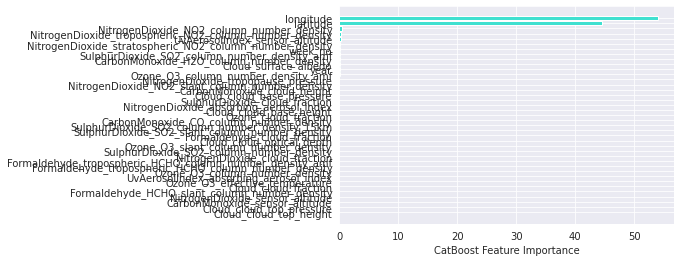

In [123]:
from matplotlib import pyplot as plt

plt.barh(feature_names, 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [124]:
import shap

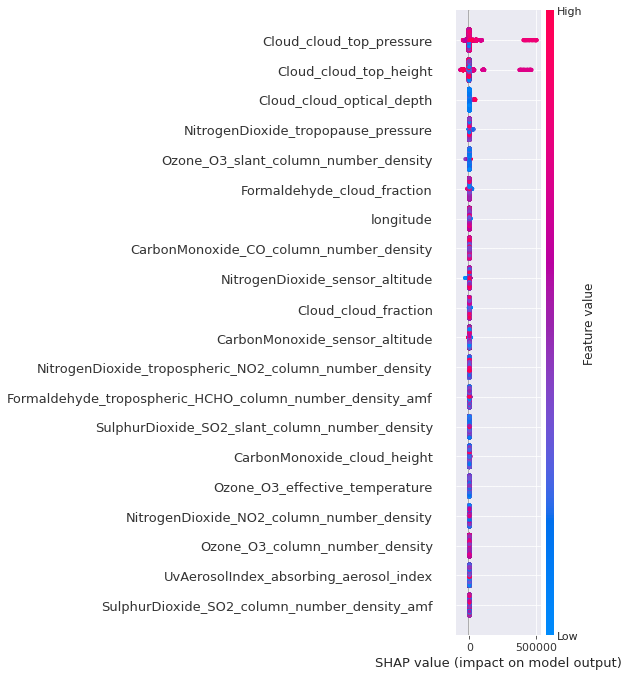

In [125]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names = feature_names)

In [126]:
train.head(1)

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo
0,-23.73,28.77,2019,1,0.000167,0.713172,0.000102,0.223929,0.000033,0.023408,...,0.34075,226.969563,0.544172,0.392759,47991.296016,5566.222019,54826.032616,4606.209995,19.115282,0.353778


## Making Prediction

In [127]:
pred_simple = cb_regress_model.predict(test)
pred_grid = model.predict(test)

In [128]:
x=(pred_simple*0.4+pred_grid*0.6)

In [129]:
# Create a submission file
sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK': testID, 'emission': pred_grid})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-23.53_27.47_2019_1,2454.835664
1,ID_-23.53_27.47_2019_2,2570.653834
2,ID_-23.53_27.47_2019_3,2947.820378
3,ID_-23.53_27.47_2019_4,3067.999840
4,ID_-23.53_27.47_2019_5,22428.057540


In [130]:
sub_file.to_csv('submission.csv', index = False)